# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [2]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [3]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [4]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720745909845e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [11]:
loss, _ = net.loss(X, y, reg=0.1)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

shift_score [[-0.70335995]
 [-0.17129677]
 [-0.51590475]
 [-0.15419291]
 [-0.00618733]]
a (5, 1)
softmax_output (5, 3)
Difference between your loss and correct loss:
1.7985612998927536e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [12]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

shift_score [[-0.70335995]
 [-0.17129677]
 [-0.51590475]
 [-0.15419291]
 [-0.00618733]]
a (5, 1)
softmax_output (5, 3)
shift_score [[-0.70335995]
 [-0.17129677]
 [-0.51590475]
 [-0.15419291]
 [-0.00618733]]
a (5, 1)
softmax_output (5, 3)
shift_score [[-0.70335995]
 [-0.17129677]
 [-0.51590475]
 [-0.15419291]
 [-0.00618733]]
a (5, 1)
softmax_output (5, 3)
shift_score [[-0.70335995]
 [-0.17129677]
 [-0.51590475]
 [-0.15419291]
 [-0.00618733]]
a (5, 1)
softmax_output (5, 3)
shift_score [[-0.70335995]
 [-0.17129677]
 [-0.51590475]
 [-0.15419291]
 [-0.00618733]]
a (5, 1)
softmax_output (5, 3)
shift_score [[-0.70335995]
 [-0.17129677]
 [-0.51590475]
 [-0.15419291]
 [-0.00618733]]
a (5, 1)
softmax_output (5, 3)
shift_score [[-0.70332035]
 [-0.17129677]
 [-0.51590475]
 [-0.15419291]
 [-0.00618733]]
a (5, 1)
softmax_output (5, 3)
shift_score [[-0.70339954]
 [-0.17129677]
 [-0.51590475]
 [-0.15419291]
 [-0.00618733]]
a (5, 1)
softmax_output (5, 3)
shift_score [[-0.70335995]
 [-0.17129677]
 [-0.5

a (5, 1)
softmax_output (5, 3)
shift_score [[-0.70335995]
 [-0.17129677]
 [-0.51590475]
 [-0.15419291]
 [-0.00618733]]
a (5, 1)
softmax_output (5, 3)
shift_score [[-0.70335995]
 [-0.17129677]
 [-0.51590475]
 [-0.15419291]
 [-0.00618733]]
a (5, 1)
softmax_output (5, 3)
shift_score [[-0.70335995]
 [-0.17129677]
 [-0.51590475]
 [-0.15419291]
 [-0.00618733]]
a (5, 1)
softmax_output (5, 3)
shift_score [[-0.70335995]
 [-0.17129677]
 [-0.51590475]
 [-0.15419291]
 [-0.00618748]]
a (5, 1)
softmax_output (5, 3)
shift_score [[-0.70335995]
 [-0.17129677]
 [-0.51590475]
 [-0.15419291]
 [-0.00618717]]
a (5, 1)
softmax_output (5, 3)
shift_score [[-0.70335995]
 [-0.17129367]
 [-0.51590216]
 [-0.1541909 ]
 [-0.00618733]]
a (5, 1)
softmax_output (5, 3)
shift_score [[-0.70335995]
 [-0.17129987]
 [-0.51590735]
 [-0.15419492]
 [-0.00618733]]
a (5, 1)
softmax_output (5, 3)
shift_score [[-0.70336022]
 [-0.1712887 ]
 [-0.51589799]
 [-0.15418766]
 [-0.00618713]]
a (5, 1)
softmax_output (5, 3)
shift_score [[-0.

# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

shift_score [[-0.17129677]
 [-0.00618733]
 [-0.51590475]
 [-0.15419291]
 [-0.70335995]
 [-0.15419291]
 [-0.51590475]
 [-0.15419291]
 [-0.70335995]
 [-0.70335995]
 [-0.70335995]
 [-0.15419291]
 [-0.51590475]
 [-0.15419291]
 [-0.70335995]
 [-0.00618733]
 [-0.70335995]
 [-0.70335995]
 [-0.51590475]
 [-0.15419291]
 [-0.51590475]
 [-0.15419291]
 [-0.70335995]
 [-0.70335995]
 [-0.70335995]
 [-0.15419291]
 [-0.70335995]
 [-0.51590475]
 [-0.51590475]
 [-0.70335995]
 [-0.00618733]
 [-0.15419291]
 [-0.00618733]
 [-0.70335995]
 [-0.00618733]
 [-0.15419291]
 [-0.15419291]
 [-0.00618733]
 [-0.17129677]
 [-0.15419291]
 [-0.70335995]
 [-0.70335995]
 [-0.70335995]
 [-0.17129677]
 [-0.70335995]
 [-0.00618733]
 [-0.17129677]
 [-0.15419291]
 [-0.17129677]
 [-0.70335995]
 [-0.70335995]
 [-0.00618733]
 [-0.15419291]
 [-0.15419291]
 [-0.17129677]
 [-0.70335995]
 [-0.70335995]
 [-0.17129677]
 [-0.51590475]
 [-0.70335995]
 [-0.15419291]
 [-0.17129677]
 [-0.17129677]
 [-0.00618733]
 [-0.70335995]
 [-0.70335995

softmax_output (200, 3)
shift_score [[4.21868532]
 [1.91199184]
 [1.96554044]
 [2.46645906]
 [4.21868532]
 [2.46645906]
 [1.96554044]
 [1.96554044]
 [1.96554044]
 [1.91199184]
 [1.91199184]
 [4.21868532]
 [4.21868532]
 [2.46645906]
 [3.29403292]
 [4.21868532]
 [1.91199184]
 [1.91199184]
 [3.29403292]
 [3.29403292]
 [3.29403292]
 [1.91199184]
 [2.46645906]
 [1.91199184]
 [2.46645906]
 [4.21868532]
 [1.91199184]
 [3.29403292]
 [2.46645906]
 [3.29403292]
 [3.29403292]
 [1.91199184]
 [1.96554044]
 [3.29403292]
 [1.96554044]
 [1.91199184]
 [2.46645906]
 [1.96554044]
 [2.46645906]
 [1.96554044]
 [3.29403292]
 [1.96554044]
 [1.91199184]
 [3.29403292]
 [3.29403292]
 [4.21868532]
 [1.91199184]
 [4.21868532]
 [2.46645906]
 [2.46645906]
 [3.29403292]
 [1.91199184]
 [1.96554044]
 [1.91199184]
 [1.91199184]
 [1.96554044]
 [1.91199184]
 [2.46645906]
 [1.91199184]
 [2.46645906]
 [2.46645906]
 [1.96554044]
 [3.29403292]
 [2.46645906]
 [4.21868532]
 [1.96554044]
 [3.29403292]
 [2.46645906]
 [4.21868532

softmax_output (200, 3)
shift_score [[2.01792405]
 [2.01792405]
 [1.95419661]
 [2.01792405]
 [3.34577993]
 [2.52214475]
 [2.52214475]
 [4.2853897 ]
 [2.01792405]
 [3.34577993]
 [4.2853897 ]
 [4.2853897 ]
 [3.34577993]
 [2.52214475]
 [2.52214475]
 [1.95419661]
 [3.34577993]
 [2.01792405]
 [2.01792405]
 [1.95419661]
 [2.52214475]
 [3.34577993]
 [1.95419661]
 [1.95419661]
 [2.52214475]
 [2.01792405]
 [2.01792405]
 [3.34577993]
 [2.01792405]
 [4.2853897 ]
 [2.01792405]
 [2.52214475]
 [2.01792405]
 [4.2853897 ]
 [2.01792405]
 [2.01792405]
 [2.52214475]
 [2.01792405]
 [1.95419661]
 [1.95419661]
 [2.52214475]
 [1.95419661]
 [1.95419661]
 [4.2853897 ]
 [3.34577993]
 [3.34577993]
 [4.2853897 ]
 [3.34577993]
 [1.95419661]
 [2.52214475]
 [2.52214475]
 [3.34577993]
 [1.95419661]
 [3.34577993]
 [2.52214475]
 [2.52214475]
 [3.34577993]
 [4.2853897 ]
 [3.34577993]
 [1.95419661]
 [2.52214475]
 [2.01792405]
 [2.01792405]
 [4.2853897 ]
 [3.34577993]
 [3.34577993]
 [4.2853897 ]
 [2.01792405]
 [3.34577993

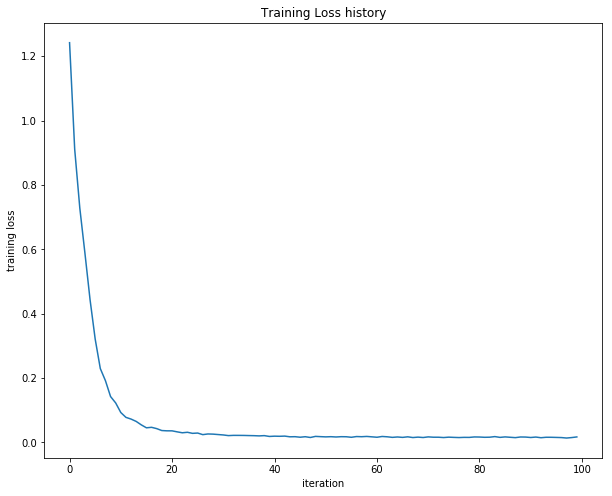

In [13]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [15]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD with momentum. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [16]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)



shift_score [[1.93542884e-04]
 [3.27683579e-04]
 [8.08089401e-05]
 [4.18964687e-04]
 [1.32634721e-04]
 [2.11042462e-04]
 [1.97344950e-04]
 [4.55799206e-04]
 [1.90807955e-04]
 [1.74538475e-04]
 [1.94031613e-04]
 [3.65642765e-04]
 [6.59919767e-04]
 [2.47588897e-04]
 [5.53832742e-04]
 [3.63006967e-04]
 [2.50136410e-04]
 [1.37774558e-04]
 [1.22551027e-04]
 [4.76285549e-04]
 [2.44152182e-04]
 [1.78277836e-04]
 [3.23834847e-04]
 [2.42282351e-04]
 [2.94093741e-04]
 [2.31587103e-04]
 [3.27222525e-04]
 [4.07962779e-04]
 [2.24782481e-04]
 [2.35365390e-04]
 [1.26881656e-04]
 [3.19187504e-04]
 [1.63826788e-04]
 [5.58397677e-05]
 [2.65575907e-04]
 [1.77317123e-04]
 [3.73704578e-04]
 [2.85344121e-04]
 [1.43659495e-04]
 [3.11482368e-04]
 [3.59478626e-04]
 [2.29192614e-04]
 [7.14668609e-05]
 [3.83106177e-04]
 [1.13157762e-04]
 [9.11492875e-05]
 [1.81583895e-04]
 [3.59527412e-04]
 [5.11536031e-04]
 [2.25564285e-04]
 [1.89071056e-04]
 [5.43325869e-04]
 [2.18593257e-04]
 [1.24535090e-04]
 [2.60324856e-04

shift_score [[3.81577415e-04]
 [3.36959956e-04]
 [2.96393652e-04]
 [2.82703616e-04]
 [3.48091257e-04]
 [3.17684383e-04]
 [3.53229217e-04]
 [1.48463121e-04]
 [2.80935371e-04]
 [1.70574146e-04]
 [1.43921123e-04]
 [4.49124022e-04]
 [3.63583150e-04]
 [2.47072715e-04]
 [2.26109409e-04]
 [1.38447256e-04]
 [3.91803156e-04]
 [3.41370036e-04]
 [4.24320323e-04]
 [3.52150431e-04]
 [2.26044178e-04]
 [3.07738258e-04]
 [1.84711885e-04]
 [4.64816140e-04]
 [1.61566516e-04]
 [2.70462520e-04]
 [3.54859669e-04]
 [5.61499488e-04]
 [3.03410578e-04]
 [1.46596257e-04]
 [2.39019685e-04]
 [3.93924799e-04]
 [1.36638202e-04]
 [1.91167438e-04]
 [2.67641432e-04]
 [2.02101788e-04]
 [2.22662630e-04]
 [3.86863917e-04]
 [2.25416188e-04]
 [5.19328509e-05]
 [3.10179151e-04]
 [1.72033243e-04]
 [2.67866129e-04]
 [1.11060351e-04]
 [1.84111774e-04]
 [3.45959516e-04]
 [3.41520587e-04]
 [2.11601492e-04]
 [2.29100746e-04]
 [3.42915973e-04]
 [3.57578687e-04]
 [2.04734379e-04]
 [3.69374726e-04]
 [5.07122749e-04]
 [1.47644225e-04

shift_score [[3.38416286e-04]
 [3.86834941e-04]
 [1.65068636e-04]
 [5.20381470e-04]
 [2.12034255e-04]
 [3.42988068e-04]
 [3.08798000e-04]
 [1.98118439e-04]
 [1.42567916e-04]
 [2.34140232e-04]
 [2.37273811e-04]
 [3.17392568e-04]
 [3.70497728e-04]
 [5.59598817e-04]
 [5.28598136e-04]
 [3.96400784e-04]
 [4.61619299e-04]
 [2.12988899e-04]
 [1.36495053e-04]
 [3.51787774e-04]
 [5.68109683e-04]
 [5.86248310e-04]
 [2.99048148e-04]
 [2.61482229e-04]
 [1.38256480e-04]
 [1.62596597e-04]
 [1.42928169e-04]
 [2.91587221e-04]
 [3.28961535e-04]
 [1.58177749e-04]
 [2.48788769e-04]
 [4.30679542e-04]
 [1.49678250e-04]
 [3.65175300e-04]
 [2.37799597e-04]
 [2.42591406e-04]
 [3.98172015e-04]
 [2.58173929e-04]
 [2.96556944e-04]
 [1.65758846e-04]
 [9.15222319e-05]
 [3.58836528e-04]
 [1.93972312e-04]
 [2.65150172e-04]
 [3.51231755e-04]
 [1.50289135e-04]
 [1.77316674e-04]
 [7.50132243e-04]
 [3.57178416e-04]
 [1.99136003e-04]
 [3.92832365e-04]
 [2.09971234e-04]
 [3.85292412e-04]
 [2.28855452e-04]
 [1.87063036e-04

shift_score [[4.49767909e-04]
 [2.94156599e-04]
 [4.03256301e-04]
 [4.04346107e-04]
 [3.74272826e-04]
 [2.52379486e-04]
 [3.86505225e-04]
 [2.28029299e-04]
 [3.97781797e-04]
 [2.47570215e-04]
 [2.77017379e-04]
 [3.14651335e-04]
 [2.30440532e-04]
 [3.83406404e-04]
 [3.08616872e-04]
 [2.49038218e-04]
 [1.50951585e-04]
 [2.79333696e-04]
 [3.25968091e-04]
 [2.51940860e-04]
 [2.96579531e-04]
 [2.49146682e-04]
 [3.13456115e-04]
 [5.37528107e-04]
 [1.21407792e-04]
 [2.09524529e-04]
 [4.17227307e-04]
 [6.38460372e-04]
 [5.33878088e-04]
 [3.71957465e-04]
 [1.41205346e-04]
 [1.75514306e-04]
 [8.45954310e-04]
 [5.06466973e-04]
 [2.75561075e-04]
 [2.20365028e-04]
 [3.26207515e-04]
 [4.30811498e-04]
 [2.02760612e-04]
 [3.98756628e-04]
 [6.73908327e-04]
 [3.05962641e-04]
 [1.95947928e-04]
 [7.96261328e-05]
 [2.27442526e-04]
 [3.87933759e-04]
 [2.56366447e-04]
 [2.76201300e-04]
 [5.23450055e-04]
 [3.02300571e-04]
 [1.18168210e-04]
 [1.52458596e-04]
 [3.32313876e-04]
 [1.86529042e-04]
 [4.24220279e-04

shift_score [[2.07025955e-04]
 [1.63556431e-04]
 [3.95323237e-04]
 [3.31388971e-04]
 [3.07971316e-04]
 [4.12461812e-04]
 [1.76337986e-04]
 [4.31118208e-04]
 [1.57410368e-04]
 [2.56019079e-04]
 [3.46455533e-04]
 [3.11832210e-04]
 [3.16358013e-04]
 [9.24726848e-04]
 [3.77493624e-04]
 [2.07526907e-04]
 [1.37956197e-04]
 [4.20036383e-04]
 [2.50923490e-04]
 [4.41227303e-04]
 [8.53703727e-05]
 [4.67958441e-04]
 [2.96776146e-04]
 [2.38642798e-04]
 [3.17235229e-04]
 [3.10706104e-04]
 [3.10338452e-04]
 [2.12224834e-04]
 [2.45244463e-04]
 [2.55849930e-04]
 [2.67581855e-04]
 [2.79043387e-04]
 [5.00121280e-04]
 [2.39927679e-04]
 [5.75525556e-04]
 [1.77092373e-04]
 [9.07078742e-05]
 [2.57014629e-04]
 [8.36109740e-04]
 [3.39675254e-04]
 [5.87477835e-04]
 [2.39149264e-04]
 [3.69687659e-04]
 [1.74065992e-04]
 [5.25858625e-04]
 [3.08337634e-04]
 [5.09512127e-04]
 [2.22239572e-04]
 [5.10370364e-04]
 [1.35819667e-04]
 [1.28578201e-04]
 [2.30950129e-04]
 [2.46599433e-04]
 [4.00792342e-04]
 [3.45672849e-04

shift_score [[4.99904414e-04]
 [1.62524775e-04]
 [1.77366789e-04]
 [1.67046465e-04]
 [3.64188204e-04]
 [7.77453021e-04]
 [2.10258061e-04]
 [1.57158797e-04]
 [3.54316194e-04]
 [4.88926387e-04]
 [2.29263109e-04]
 [1.61973509e-04]
 [1.45809006e-04]
 [1.96392093e-04]
 [1.85382593e-04]
 [6.96639241e-04]
 [4.73709350e-04]
 [2.05754897e-04]
 [6.42869957e-04]
 [2.82418595e-04]
 [2.31773097e-04]
 [2.05054106e-04]
 [6.65819787e-04]
 [3.44234903e-04]
 [2.24958714e-04]
 [3.54128489e-04]
 [2.99315580e-04]
 [9.09162883e-04]
 [1.40557744e-04]
 [2.50896145e-04]
 [7.34029617e-04]
 [5.44322982e-04]
 [1.74376148e-04]
 [2.63993819e-04]
 [2.74747719e-04]
 [1.78962603e-04]
 [7.26520832e-04]
 [2.01693004e-04]
 [2.96642571e-04]
 [1.64311244e-04]
 [3.67146365e-04]
 [1.79894416e-04]
 [2.21021934e-04]
 [3.53608574e-04]
 [4.32123755e-04]
 [2.74427398e-04]
 [3.32655450e-04]
 [3.09319791e-04]
 [1.07970560e-04]
 [3.13986188e-04]
 [1.84989773e-04]
 [7.16398497e-04]
 [2.30532245e-04]
 [1.90085704e-04]
 [1.73586323e-04

shift_score [[0.00047676]
 [0.00012166]
 [0.00036844]
 [0.00027866]
 [0.00027856]
 [0.00066857]
 [0.00043167]
 [0.00021856]
 [0.00015792]
 [0.00017048]
 [0.00025239]
 [0.00055121]
 [0.00042801]
 [0.00048223]
 [0.0003794 ]
 [0.00041733]
 [0.00017009]
 [0.00030723]
 [0.00022269]
 [0.00036959]
 [0.00019953]
 [0.00063754]
 [0.00023251]
 [0.00014304]
 [0.0003639 ]
 [0.00023009]
 [0.00047646]
 [0.00021032]
 [0.00033087]
 [0.00028391]
 [0.00049376]
 [0.00043427]
 [0.00028776]
 [0.00031098]
 [0.00059175]
 [0.0002479 ]
 [0.00025795]
 [0.00013994]
 [0.00028688]
 [0.00035301]
 [0.00051608]
 [0.00027356]
 [0.00016307]
 [0.00017576]
 [0.00021623]
 [0.00023048]
 [0.0001603 ]
 [0.00017414]
 [0.00030312]
 [0.00022424]
 [0.0004345 ]
 [0.00048131]
 [0.00015174]
 [0.00055848]
 [0.00021856]
 [0.00023591]
 [0.00025955]
 [0.0003212 ]
 [0.0005261 ]
 [0.0003884 ]
 [0.00018284]
 [0.00032152]
 [0.00053892]
 [0.00085519]
 [0.00056883]
 [0.0003316 ]
 [0.00022786]
 [0.00026153]
 [0.00030637]
 [0.00013409]
 [0.0003

shift_score [[3.55104970e-04]
 [2.66019669e-04]
 [1.63078758e-04]
 [3.24558287e-04]
 [2.72490178e-04]
 [4.35868890e-04]
 [2.28439239e-04]
 [1.08321150e-03]
 [2.66449739e-04]
 [2.83721573e-04]
 [1.94157124e-04]
 [2.26830625e-04]
 [4.42879404e-04]
 [2.89421647e-04]
 [2.50171348e-04]
 [4.00745155e-04]
 [3.37320390e-04]
 [2.07644822e-04]
 [2.47820621e-04]
 [4.00850957e-04]
 [2.44532709e-04]
 [2.26100596e-04]
 [4.49916936e-04]
 [2.27270169e-04]
 [2.53945952e-04]
 [6.24427433e-04]
 [3.17242902e-04]
 [1.59551338e-04]
 [5.91840834e-04]
 [3.30813859e-04]
 [7.27653655e-04]
 [2.84355999e-04]
 [8.38177537e-04]
 [6.35501685e-04]
 [3.58519835e-04]
 [3.18558814e-04]
 [1.39130897e-04]
 [4.78373761e-04]
 [3.43330245e-04]
 [6.83749419e-04]
 [6.16450514e-04]
 [5.34423166e-04]
 [2.17382878e-04]
 [2.24344031e-04]
 [2.37076882e-04]
 [5.42223669e-04]
 [6.63883381e-04]
 [2.76808225e-04]
 [2.63396730e-04]
 [2.03679904e-04]
 [5.09324017e-04]
 [2.39454988e-04]
 [2.39384333e-04]
 [4.61406434e-04]
 [3.77228569e-04

shift_score [[3.44766364e-04]
 [6.00778088e-04]
 [5.11996254e-04]
 [7.19147738e-04]
 [3.59486757e-04]
 [1.53065409e-04]
 [1.51058434e-04]
 [2.68336898e-04]
 [2.13145418e-04]
 [4.22194287e-04]
 [4.35377550e-04]
 [2.74733988e-04]
 [4.62486619e-04]
 [9.35737244e-04]
 [4.44063027e-04]
 [2.61426188e-04]
 [4.52419403e-04]
 [5.57053917e-04]
 [2.97906217e-04]
 [8.90446224e-04]
 [7.83322779e-04]
 [4.40097504e-04]
 [3.37634174e-04]
 [4.04481794e-04]
 [3.46452775e-04]
 [1.12700425e-03]
 [7.39611714e-04]
 [4.02276537e-04]
 [1.66881584e-04]
 [2.70220362e-04]
 [1.32304045e-04]
 [7.66010054e-04]
 [2.48839339e-04]
 [4.39747866e-04]
 [1.74070732e-04]
 [4.78522979e-04]
 [4.67233695e-04]
 [6.44312082e-04]
 [9.24459685e-04]
 [3.88084321e-04]
 [1.73602026e-04]
 [3.75113771e-04]
 [5.05983430e-04]
 [3.79900544e-04]
 [2.77682387e-04]
 [3.59221964e-04]
 [2.19666377e-04]
 [1.42323894e-04]
 [2.48653867e-04]
 [2.53786356e-04]
 [1.32367269e-04]
 [3.37420424e-04]
 [4.61033097e-04]
 [1.23742426e-04]
 [1.48223811e-04

shift_score [[2.25725724e-04]
 [4.76059910e-04]
 [3.79734564e-04]
 [1.23071387e-03]
 [1.07911777e-03]
 [2.03997317e-04]
 [2.97981873e-04]
 [2.57084951e-04]
 [6.94144076e-04]
 [5.15467588e-04]
 [2.28626803e-04]
 [6.55576985e-04]
 [3.87511210e-04]
 [2.73536438e-04]
 [7.90881971e-04]
 [3.61603149e-04]
 [2.89501734e-04]
 [1.63590211e-04]
 [2.18597578e-04]
 [2.21637045e-04]
 [5.73467201e-04]
 [3.68396293e-04]
 [9.34285060e-04]
 [3.33259685e-04]
 [3.30325464e-04]
 [3.00442508e-04]
 [2.74020835e-04]
 [4.09580789e-04]
 [7.79301528e-04]
 [3.47468934e-04]
 [7.02288566e-04]
 [2.18023281e-04]
 [2.41877149e-04]
 [5.65319344e-04]
 [2.62555061e-04]
 [2.09655371e-04]
 [4.01430677e-04]
 [1.85403292e-04]
 [1.97652470e-04]
 [2.53500719e-04]
 [2.15033236e-04]
 [1.19361844e-03]
 [2.97956506e-04]
 [8.06282461e-04]
 [7.01997794e-04]
 [2.76104439e-04]
 [4.85870572e-04]
 [5.69420652e-04]
 [5.02217145e-04]
 [5.76813946e-04]
 [1.37673869e-03]
 [2.17632865e-04]
 [4.35084066e-04]
 [3.29498300e-04]
 [1.75355176e-04

shift_score [[3.54419296e-04]
 [1.08249802e-03]
 [4.53365666e-04]
 [2.11419671e-04]
 [1.57185094e-04]
 [9.62189024e-04]
 [6.25533278e-04]
 [1.53781497e-03]
 [6.56375502e-04]
 [4.39075918e-04]
 [4.62309749e-04]
 [1.77351715e-04]
 [5.01151113e-04]
 [4.88556042e-04]
 [1.41261204e-04]
 [1.60975587e-04]
 [3.50716018e-04]
 [3.82579729e-04]
 [6.13240229e-04]
 [7.05691956e-04]
 [3.47654344e-04]
 [2.55381293e-04]
 [5.01502233e-04]
 [1.00044217e-03]
 [2.39889638e-04]
 [2.03340893e-04]
 [3.33106627e-04]
 [3.26024425e-04]
 [2.57593020e-04]
 [2.29420714e-04]
 [6.00311306e-04]
 [1.40463544e-03]
 [3.70287183e-04]
 [2.56989123e-04]
 [2.07090413e-04]
 [1.90339076e-04]
 [1.97370192e-04]
 [7.12997996e-04]
 [8.86388909e-04]
 [7.53784926e-04]
 [3.23443102e-04]
 [3.69323002e-04]
 [3.45451559e-04]
 [4.01639732e-04]
 [1.96822121e-04]
 [2.66551920e-04]
 [2.41028634e-04]
 [7.59460536e-04]
 [1.31560480e-03]
 [5.16785766e-04]
 [1.01581926e-03]
 [3.07617355e-04]
 [2.80358224e-04]
 [3.09011109e-04]
 [3.16202585e-04

shift_score [[0.00083212]
 [0.00023952]
 [0.000197  ]
 [0.00027504]
 [0.00037057]
 [0.00075772]
 [0.00049697]
 [0.00111608]
 [0.00019951]
 [0.00022651]
 [0.00024686]
 [0.00027395]
 [0.00035053]
 [0.00156732]
 [0.00026616]
 [0.00037887]
 [0.00190017]
 [0.00145308]
 [0.00023548]
 [0.00053325]
 [0.00068263]
 [0.00051645]
 [0.00074998]
 [0.00017304]
 [0.00028257]
 [0.00046294]
 [0.00020465]
 [0.00041577]
 [0.00028583]
 [0.00021862]
 [0.00061133]
 [0.00010536]
 [0.00041157]
 [0.00100923]
 [0.00033043]
 [0.00108155]
 [0.00046803]
 [0.00031422]
 [0.00068886]
 [0.00060154]
 [0.00025065]
 [0.00065919]
 [0.00031064]
 [0.00028555]
 [0.00021056]
 [0.00029376]
 [0.00100007]
 [0.00027792]
 [0.00050435]
 [0.00067911]
 [0.0002904 ]
 [0.00051218]
 [0.00044372]
 [0.00150781]
 [0.00041862]
 [0.00096979]
 [0.00063355]
 [0.00036462]
 [0.00029572]
 [0.00050742]
 [0.00016383]
 [0.0009165 ]
 [0.00088588]
 [0.00022651]
 [0.0009693 ]
 [0.00020665]
 [0.00051773]
 [0.0003212 ]
 [0.00040708]
 [0.00041898]
 [0.0003

shift_score [[0.00022194]
 [0.00033165]
 [0.00051049]
 [0.0016578 ]
 [0.00026944]
 [0.0001159 ]
 [0.00068173]
 [0.00031849]
 [0.00020357]
 [0.00022379]
 [0.00025166]
 [0.00169721]
 [0.00032359]
 [0.00109051]
 [0.00033613]
 [0.00038135]
 [0.00032361]
 [0.00049123]
 [0.00108522]
 [0.00013844]
 [0.00041392]
 [0.00088338]
 [0.00044232]
 [0.00030842]
 [0.00063803]
 [0.00073343]
 [0.00024095]
 [0.00039957]
 [0.00017172]
 [0.00099921]
 [0.00069285]
 [0.00029078]
 [0.0009662 ]
 [0.00077055]
 [0.00027355]
 [0.00047495]
 [0.00102358]
 [0.00025308]
 [0.00040218]
 [0.00035932]
 [0.00025774]
 [0.00029983]
 [0.00018889]
 [0.00071314]
 [0.00047278]
 [0.00095268]
 [0.00017973]
 [0.00039906]
 [0.00029854]
 [0.00028195]
 [0.00164866]
 [0.00044367]
 [0.00016239]
 [0.00086984]
 [0.00032088]
 [0.00030331]
 [0.00107966]
 [0.00037362]
 [0.00081652]
 [0.00051699]
 [0.00055228]
 [0.0014597 ]
 [0.00048521]
 [0.00028518]
 [0.00030442]
 [0.00062189]
 [0.0004184 ]
 [0.00019671]
 [0.00039847]
 [0.00055117]
 [0.0007

shift_score [[3.70409644e-04]
 [2.40920634e-03]
 [7.50079482e-04]
 [1.42061906e-03]
 [7.56206568e-04]
 [8.66558039e-04]
 [2.21413700e-04]
 [2.10617986e-03]
 [1.23760496e-03]
 [3.99508112e-04]
 [2.76277839e-04]
 [7.80903671e-04]
 [3.12954440e-04]
 [1.15309109e-03]
 [5.52605465e-04]
 [3.66175212e-04]
 [1.51445537e-04]
 [3.54411283e-04]
 [2.28943384e-04]
 [7.34968300e-04]
 [7.69758374e-04]
 [1.07643743e-04]
 [3.73477937e-04]
 [4.02441391e-04]
 [5.56828374e-04]
 [1.27274994e-04]
 [5.32507888e-04]
 [5.38557879e-04]
 [3.57063230e-04]
 [6.53151097e-04]
 [2.30700890e-03]
 [4.04417707e-04]
 [3.32578390e-04]
 [1.08822756e-03]
 [1.12024930e-03]
 [5.00326872e-04]
 [2.88966997e-04]
 [1.23985637e-04]
 [3.85345191e-04]
 [2.61700334e-04]
 [4.96362182e-04]
 [5.20331981e-04]
 [5.59724115e-04]
 [1.58476934e-04]
 [1.76555893e-03]
 [7.86763598e-04]
 [1.30963503e-03]
 [5.64645315e-04]
 [9.97151018e-04]
 [1.54725395e-03]
 [3.69751955e-04]
 [2.54211093e-04]
 [7.24823034e-04]
 [3.14259411e-04]
 [2.47435735e-04

shift_score [[0.0004043 ]
 [0.00027688]
 [0.00079349]
 [0.00028022]
 [0.00020317]
 [0.00046739]
 [0.00048836]
 [0.00045225]
 [0.00034749]
 [0.00036676]
 [0.00041798]
 [0.00023317]
 [0.0008674 ]
 [0.00229431]
 [0.00039932]
 [0.00045225]
 [0.00014181]
 [0.00057329]
 [0.00016871]
 [0.00022105]
 [0.00031919]
 [0.00169017]
 [0.00033504]
 [0.00055611]
 [0.00252311]
 [0.00051529]
 [0.00048162]
 [0.0001337 ]
 [0.0007601 ]
 [0.00043338]
 [0.00236214]
 [0.00044464]
 [0.00029065]
 [0.00030803]
 [0.00073242]
 [0.00097758]
 [0.00023094]
 [0.00011814]
 [0.00103612]
 [0.00025598]
 [0.00075439]
 [0.00040285]
 [0.00046734]
 [0.00043046]
 [0.00053607]
 [0.00051797]
 [0.00047268]
 [0.00080239]
 [0.00115598]
 [0.00032223]
 [0.00039088]
 [0.00199599]
 [0.00023424]
 [0.000701  ]
 [0.00018998]
 [0.00068446]
 [0.00034039]
 [0.00140119]
 [0.00028626]
 [0.00222802]
 [0.00137836]
 [0.00079087]
 [0.00032788]
 [0.0009116 ]
 [0.00096047]
 [0.00063305]
 [0.00066437]
 [0.00039095]
 [0.0005706 ]
 [0.00045398]
 [0.0003

shift_score [[3.83506914e-04]
 [4.37471363e-04]
 [4.54798621e-04]
 [3.88752555e-04]
 [3.75827437e-04]
 [2.81847709e-04]
 [6.31283229e-04]
 [2.39307130e-04]
 [2.89308771e-04]
 [3.95442637e-04]
 [6.50112548e-04]
 [9.75004844e-04]
 [2.01786371e-04]
 [4.63154114e-04]
 [4.05994336e-04]
 [2.48128799e-04]
 [4.09534790e-04]
 [1.69427487e-04]
 [2.69682028e-04]
 [1.59398201e-03]
 [2.69886028e-04]
 [1.15974600e-03]
 [1.37801637e-04]
 [3.17281656e-04]
 [1.43026012e-03]
 [5.10981917e-04]
 [1.42790764e-03]
 [1.70094413e-04]
 [9.78412796e-04]
 [2.24758832e-04]
 [2.72009360e-04]
 [1.27459402e-03]
 [5.53128987e-04]
 [3.57419115e-04]
 [1.43062771e-03]
 [7.74655039e-05]
 [1.91771717e-03]
 [1.94431960e-04]
 [4.45419435e-04]
 [1.73223581e-03]
 [2.59584884e-03]
 [2.90828996e-04]
 [1.45445489e-03]
 [1.91649683e-03]
 [4.09960207e-04]
 [5.96403003e-04]
 [8.50829498e-04]
 [1.06309299e-03]
 [5.24093286e-04]
 [5.85103183e-04]
 [5.43127034e-04]
 [3.72765282e-04]
 [1.49494186e-03]
 [4.29981610e-04]
 [8.96346859e-04

 [0.00021474]]
a (200, 1)
softmax_output (200, 10)
shift_score [[0.00214614]
 [0.00043263]
 [0.00119691]
 [0.00038301]
 [0.00060613]
 [0.00046283]
 [0.00043326]
 [0.00034418]
 [0.00023728]
 [0.0012712 ]
 [0.00037821]
 [0.00090394]
 [0.00037797]
 [0.00103227]
 [0.00074659]
 [0.00047775]
 [0.00039432]
 [0.00022451]
 [0.00229265]
 [0.00045569]
 [0.00020199]
 [0.00110761]
 [0.00163911]
 [0.00318295]
 [0.00210259]
 [0.00020875]
 [0.0006625 ]
 [0.00125508]
 [0.00154422]
 [0.00037219]
 [0.00066075]
 [0.00067173]
 [0.00060841]
 [0.00160024]
 [0.00095376]
 [0.00107005]
 [0.00069888]
 [0.00167019]
 [0.00043085]
 [0.00041288]
 [0.00028889]
 [0.00030393]
 [0.00047001]
 [0.00144005]
 [0.00221535]
 [0.00157737]
 [0.00030281]
 [0.00232216]
 [0.00023039]
 [0.00039885]
 [0.00044345]
 [0.0001794 ]
 [0.00050008]
 [0.00065137]
 [0.00038382]
 [0.00056159]
 [0.00070373]
 [0.00042962]
 [0.00235712]
 [0.00053161]
 [0.00139927]
 [0.00030331]
 [0.00028021]
 [0.00064746]
 [0.00152831]
 [0.00115253]
 [0.00026761]

shift_score [[1.79556241e-03]
 [5.18326207e-04]
 [8.31732719e-04]
 [5.46785481e-04]
 [1.93490082e-04]
 [3.46988705e-04]
 [8.17095581e-04]
 [4.01004496e-04]
 [6.57713314e-04]
 [4.34489005e-04]
 [1.69314517e-03]
 [8.15629901e-04]
 [6.60667934e-04]
 [4.47796809e-04]
 [1.78092994e-03]
 [2.31668346e-04]
 [9.83225637e-04]
 [1.55518867e-03]
 [4.33736579e-04]
 [2.99975403e-04]
 [1.55974386e-03]
 [3.02177315e-04]
 [3.61689583e-04]
 [1.19720035e-03]
 [1.66726436e-03]
 [4.91022826e-04]
 [1.04074196e-03]
 [3.15468669e-03]
 [6.17787678e-04]
 [3.83578446e-04]
 [3.66211771e-04]
 [6.87527525e-04]
 [2.12869530e-03]
 [3.75258875e-04]
 [5.08456637e-04]
 [1.15858230e-03]
 [2.43230199e-04]
 [1.01396537e-03]
 [3.28739934e-04]
 [3.51941411e-04]
 [4.17755694e-04]
 [4.05864557e-04]
 [6.80902880e-04]
 [1.97049894e-04]
 [3.06506484e-04]
 [5.28061708e-04]
 [1.03639033e-03]
 [3.62160755e-04]
 [3.39709119e-04]
 [5.82626607e-04]
 [2.19870406e-04]
 [5.46053769e-04]
 [1.03177394e-03]
 [9.25946934e-04]
 [2.54090674e-04

shift_score [[0.00108006]
 [0.00056428]
 [0.0016497 ]
 [0.0007298 ]
 [0.00303277]
 [0.00042884]
 [0.00064363]
 [0.00054899]
 [0.00055175]
 [0.00075603]
 [0.0003205 ]
 [0.00034105]
 [0.00049971]
 [0.00244745]
 [0.00017797]
 [0.00202973]
 [0.00117882]
 [0.00157978]
 [0.00132321]
 [0.00027158]
 [0.00131936]
 [0.00214655]
 [0.00337698]
 [0.00209948]
 [0.00036105]
 [0.00044582]
 [0.00025174]
 [0.00030522]
 [0.00014767]
 [0.00034199]
 [0.00051422]
 [0.0025925 ]
 [0.0007024 ]
 [0.00025889]
 [0.00040714]
 [0.0005675 ]
 [0.00058128]
 [0.00131395]
 [0.00251995]
 [0.00057515]
 [0.00191762]
 [0.00138914]
 [0.0003787 ]
 [0.00025474]
 [0.0006574 ]
 [0.00144764]
 [0.00044898]
 [0.00099885]
 [0.00051017]
 [0.00019891]
 [0.00050606]
 [0.0012647 ]
 [0.00068577]
 [0.00217387]
 [0.00123879]
 [0.00054431]
 [0.00021508]
 [0.00049287]
 [0.00168679]
 [0.000487  ]
 [0.00032083]
 [0.00050835]
 [0.00053982]
 [0.00197938]
 [0.00030276]
 [0.00160139]
 [0.00141754]
 [0.00035459]
 [0.00020056]
 [0.00043385]
 [0.0003

 [0.00056227]]
a (200, 1)
softmax_output (200, 10)
shift_score [[6.58312742e-04]
 [2.62882028e-04]
 [9.41783014e-04]
 [1.57778255e-03]
 [4.47755405e-04]
 [4.08030413e-03]
 [5.09601700e-04]
 [2.15663972e-03]
 [2.60796604e-04]
 [9.02106622e-04]
 [4.12166761e-04]
 [9.07478007e-04]
 [3.54080180e-04]
 [3.30591270e-03]
 [7.33339181e-04]
 [3.61052540e-04]
 [1.37150071e-03]
 [1.64347276e-03]
 [7.50463986e-04]
 [3.28277456e-04]
 [7.88852731e-04]
 [4.62183313e-04]
 [4.07214279e-04]
 [3.83511519e-03]
 [3.92916694e-04]
 [4.23421202e-04]
 [4.14259134e-04]
 [3.05647090e-04]
 [1.20999089e-03]
 [3.74296050e-04]
 [3.47482759e-04]
 [1.86136792e-03]
 [2.47177517e-04]
 [5.73822374e-04]
 [2.68997473e-03]
 [1.41634827e-03]
 [1.28312956e-04]
 [5.62544972e-04]
 [4.51520718e-04]
 [6.52923969e-04]
 [4.26605515e-04]
 [4.74174484e-04]
 [2.97634828e-04]
 [4.74025953e-04]
 [1.96999114e-03]
 [3.98820637e-04]
 [4.79205434e-04]
 [1.29177051e-03]
 [4.50416317e-04]
 [6.41679704e-04]
 [4.62950688e-04]
 [5.91357175e-04]
 

shift_score [[0.00186276]
 [0.00080186]
 [0.00055787]
 [0.00087991]
 [0.00027499]
 [0.00071844]
 [0.00025619]
 [0.00150538]
 [0.00046298]
 [0.00028915]
 [0.00026261]
 [0.00150057]
 [0.00236279]
 [0.0002887 ]
 [0.00230459]
 [0.00052344]
 [0.00040786]
 [0.00031868]
 [0.00068697]
 [0.00404867]
 [0.00054407]
 [0.00353904]
 [0.00052628]
 [0.00123042]
 [0.00025351]
 [0.0005201 ]
 [0.00078441]
 [0.00021364]
 [0.00016559]
 [0.00060134]
 [0.00118403]
 [0.00066543]
 [0.00095804]
 [0.00042257]
 [0.00064701]
 [0.00216349]
 [0.00053526]
 [0.00307728]
 [0.00326365]
 [0.00261235]
 [0.00021715]
 [0.00021423]
 [0.00076225]
 [0.00022445]
 [0.00028417]
 [0.00047848]
 [0.00457944]
 [0.00194386]
 [0.00089482]
 [0.00293257]
 [0.00052501]
 [0.00028588]
 [0.00036488]
 [0.00096509]
 [0.00230782]
 [0.00039471]
 [0.00048709]
 [0.00249223]
 [0.00038246]
 [0.00224751]
 [0.00066908]
 [0.0002468 ]
 [0.00153645]
 [0.00055103]
 [0.00045795]
 [0.0031304 ]
 [0.00103411]
 [0.0005396 ]
 [0.00035338]
 [0.00131175]
 [0.0030

shift_score [[0.00178729]
 [0.00072149]
 [0.00266707]
 [0.003927  ]
 [0.00294837]
 [0.00094071]
 [0.00213557]
 [0.00016326]
 [0.00026473]
 [0.00042301]
 [0.0007003 ]
 [0.00091749]
 [0.0031755 ]
 [0.00050522]
 [0.00098075]
 [0.00029843]
 [0.00027565]
 [0.00058603]
 [0.00055935]
 [0.00123956]
 [0.00083559]
 [0.00447319]
 [0.0004393 ]
 [0.00036827]
 [0.00207381]
 [0.0006561 ]
 [0.00016959]
 [0.00024736]
 [0.00089003]
 [0.0005845 ]
 [0.00038206]
 [0.00191755]
 [0.00030075]
 [0.00034056]
 [0.00119164]
 [0.00149826]
 [0.00027779]
 [0.00143753]
 [0.00161834]
 [0.00073147]
 [0.00294348]
 [0.00062816]
 [0.00198194]
 [0.00143435]
 [0.00034234]
 [0.00238898]
 [0.00058679]
 [0.00039476]
 [0.00122824]
 [0.00066333]
 [0.00040852]
 [0.00044139]
 [0.00034453]
 [0.0011928 ]
 [0.00268846]
 [0.00228589]
 [0.00046017]
 [0.00346639]
 [0.00127882]
 [0.00196188]
 [0.00174214]
 [0.00274641]
 [0.00023304]
 [0.00051047]
 [0.0004015 ]
 [0.0009828 ]
 [0.00058573]
 [0.00089898]
 [0.00098297]
 [0.00108648]
 [0.0033

iteration 100 / 1000: loss 2.302311
shift_score [[0.00037553]
 [0.0029783 ]
 [0.00529274]
 [0.00062473]
 [0.00044744]
 [0.00064697]
 [0.00235551]
 [0.00069373]
 [0.00403743]
 [0.00285845]
 [0.00045911]
 [0.00258769]
 [0.00079945]
 [0.00033487]
 [0.0013996 ]
 [0.00086531]
 [0.00054611]
 [0.00050643]
 [0.00036877]
 [0.00048861]
 [0.00079258]
 [0.00053082]
 [0.00090462]
 [0.00077361]
 [0.00464395]
 [0.00310377]
 [0.00042362]
 [0.00044374]
 [0.00029167]
 [0.00067871]
 [0.00048745]
 [0.00052869]
 [0.00024895]
 [0.00022829]
 [0.00078461]
 [0.00413658]
 [0.00160645]
 [0.00042355]
 [0.00030692]
 [0.00095653]
 [0.00041854]
 [0.00032443]
 [0.00079726]
 [0.00349285]
 [0.00112466]
 [0.00098999]
 [0.00024795]
 [0.00156683]
 [0.00048438]
 [0.00064451]
 [0.0002731 ]
 [0.00214739]
 [0.00058987]
 [0.00064504]
 [0.00036732]
 [0.00125648]
 [0.00123974]
 [0.00049793]
 [0.00036771]
 [0.00091764]
 [0.00292214]
 [0.00044544]
 [0.00051398]
 [0.00037264]
 [0.00192116]
 [0.00052616]
 [0.00120079]
 [0.0006358 ]


shift_score [[5.02381658e-04]
 [5.33836128e-04]
 [3.13686666e-03]
 [3.78034231e-04]
 [6.84723461e-04]
 [3.47755321e-04]
 [6.14108389e-04]
 [4.64516101e-04]
 [4.50836416e-04]
 [3.21916272e-04]
 [9.85881286e-04]
 [6.19267461e-04]
 [1.47749389e-03]
 [3.11638786e-04]
 [1.93557860e-04]
 [3.24323072e-03]
 [2.48126639e-04]
 [7.03874300e-04]
 [1.06562791e-03]
 [1.77103794e-03]
 [4.89788519e-04]
 [4.29681629e-03]
 [1.03394321e-03]
 [8.15221579e-04]
 [2.64720549e-03]
 [1.17694530e-03]
 [1.11255515e-03]
 [5.34645282e-04]
 [6.36321121e-04]
 [3.91549162e-04]
 [3.15731408e-04]
 [7.10374630e-04]
 [6.99470480e-04]
 [9.44091747e-04]
 [3.89160891e-04]
 [1.39757035e-03]
 [8.77234449e-04]
 [1.38397841e-03]
 [2.32594259e-03]
 [9.02314290e-04]
 [4.77429036e-03]
 [5.19371067e-04]
 [3.81544225e-03]
 [1.07913596e-03]
 [3.66124776e-04]
 [6.32852493e-03]
 [2.52182116e-04]
 [1.34649849e-03]
 [2.02820206e-03]
 [9.07374394e-04]
 [4.42753697e-03]
 [3.59203278e-04]
 [7.92351469e-04]
 [4.87000280e-04]
 [8.38686416e-04

shift_score [[6.87643073e-04]
 [7.53681164e-03]
 [8.25425362e-04]
 [5.37712496e-03]
 [6.69249693e-04]
 [1.09244640e-03]
 [3.54089708e-03]
 [2.45594676e-04]
 [2.14918778e-04]
 [2.40327384e-04]
 [4.70211011e-03]
 [1.09932802e-03]
 [8.49592895e-04]
 [9.60556199e-04]
 [5.17546121e-04]
 [8.65639240e-04]
 [9.26324866e-04]
 [1.12286260e-03]
 [1.26356821e-03]
 [1.92096910e-03]
 [4.15633651e-04]
 [2.74472687e-03]
 [2.83615499e-04]
 [1.24600680e-03]
 [1.93132760e-04]
 [9.54341253e-04]
 [9.62237391e-04]
 [2.85024122e-03]
 [2.45995693e-03]
 [5.50629634e-04]
 [2.53600655e-03]
 [5.43925733e-04]
 [3.61009308e-03]
 [8.59898997e-04]
 [3.67865591e-03]
 [4.60384433e-04]
 [2.30341437e-04]
 [1.18729717e-03]
 [3.35760765e-04]
 [7.88015681e-04]
 [2.78383016e-04]
 [1.31707374e-03]
 [7.04741229e-04]
 [8.17879135e-04]
 [1.52173699e-04]
 [3.49307065e-04]
 [3.23189850e-04]
 [3.82723245e-03]
 [1.05503557e-03]
 [7.73530139e-04]
 [7.48224900e-04]
 [3.32454593e-04]
 [7.42463954e-04]
 [2.91715168e-03]
 [2.30999538e-04

shift_score [[0.00079188]
 [0.00067894]
 [0.00052617]
 [0.00020031]
 [0.00059496]
 [0.00045796]
 [0.00069313]
 [0.00695886]
 [0.00129931]
 [0.00065508]
 [0.00070941]
 [0.00180261]
 [0.00312483]
 [0.00417721]
 [0.0011835 ]
 [0.00233743]
 [0.00050374]
 [0.00073975]
 [0.00072013]
 [0.0028351 ]
 [0.0007443 ]
 [0.00034943]
 [0.00118609]
 [0.00053954]
 [0.00080559]
 [0.00343385]
 [0.00072342]
 [0.00282926]
 [0.00038906]
 [0.00621808]
 [0.00218478]
 [0.0013018 ]
 [0.00478222]
 [0.00054851]
 [0.00577537]
 [0.00092906]
 [0.00041257]
 [0.00063122]
 [0.0011328 ]
 [0.00012258]
 [0.00487883]
 [0.0002006 ]
 [0.0014134 ]
 [0.00094545]
 [0.00484498]
 [0.00041003]
 [0.00079909]
 [0.00022351]
 [0.00062316]
 [0.0003673 ]
 [0.00123673]
 [0.00021471]
 [0.00046865]
 [0.0005135 ]
 [0.00194696]
 [0.00061054]
 [0.00071124]
 [0.00232791]
 [0.00054212]
 [0.00055445]
 [0.00044054]
 [0.00066904]
 [0.00035746]
 [0.00043816]
 [0.00112552]
 [0.00054115]
 [0.00073969]
 [0.00054461]
 [0.00663864]
 [0.00023498]
 [0.0015

shift_score [[0.00163759]
 [0.00027959]
 [0.00110383]
 [0.0046117 ]
 [0.00072966]
 [0.00448966]
 [0.00125874]
 [0.00373665]
 [0.00174385]
 [0.00035649]
 [0.00248368]
 [0.00140112]
 [0.00046277]
 [0.00133513]
 [0.00101098]
 [0.00064726]
 [0.00075435]
 [0.0002828 ]
 [0.00036617]
 [0.00016825]
 [0.00082995]
 [0.00128973]
 [0.0045688 ]
 [0.00277828]
 [0.00127841]
 [0.00037711]
 [0.00043188]
 [0.00177955]
 [0.00083136]
 [0.0007336 ]
 [0.00039212]
 [0.00119242]
 [0.00023294]
 [0.00127914]
 [0.00468601]
 [0.00043512]
 [0.00221153]
 [0.00077456]
 [0.00048109]
 [0.00326431]
 [0.00292663]
 [0.00071995]
 [0.00116647]
 [0.00814453]
 [0.00032913]
 [0.00092948]
 [0.00121132]
 [0.00042824]
 [0.00100859]
 [0.00062834]
 [0.00270681]
 [0.00349   ]
 [0.00020577]
 [0.0009211 ]
 [0.00425006]
 [0.00542438]
 [0.0011205 ]
 [0.00037128]
 [0.00067775]
 [0.00089727]
 [0.00110168]
 [0.00274446]
 [0.00517865]
 [0.00578658]
 [0.00125212]
 [0.00027906]
 [0.00036765]
 [0.00584282]
 [0.00285622]
 [0.00029901]
 [0.0033

shift_score [[4.69648567e-04]
 [6.72890999e-04]
 [9.14137246e-04]
 [5.70098035e-04]
 [5.78656993e-03]
 [9.32866026e-04]
 [5.23407364e-04]
 [3.39593587e-03]
 [5.56080090e-04]
 [2.09428043e-03]
 [6.67799859e-04]
 [3.97721900e-04]
 [6.30943582e-03]
 [2.78961215e-04]
 [1.10835055e-03]
 [1.42835919e-04]
 [3.58803632e-04]
 [7.72511113e-03]
 [4.87696078e-04]
 [4.08811514e-03]
 [2.69191342e-03]
 [1.01044932e-03]
 [4.22537167e-03]
 [4.79216430e-04]
 [5.65864203e-04]
 [2.93743023e-03]
 [5.57879852e-03]
 [7.08848019e-04]
 [3.93198766e-03]
 [6.42529912e-03]
 [4.37008015e-03]
 [9.79323375e-04]
 [4.18227105e-04]
 [5.92430561e-03]
 [4.03016929e-04]
 [2.59418762e-04]
 [2.31040522e-03]
 [6.16037495e-04]
 [7.64973684e-04]
 [8.06173643e-04]
 [2.97574162e-03]
 [5.72917484e-03]
 [1.04141647e-03]
 [6.42779951e-03]
 [2.56042113e-03]
 [4.73340803e-03]
 [5.38864165e-04]
 [3.68097507e-04]
 [6.17199159e-03]
 [7.21728117e-04]
 [3.64419704e-04]
 [7.95242736e-04]
 [5.05629797e-04]
 [8.21209157e-04]
 [8.53553591e-03

shift_score [[0.00117242]
 [0.0069214 ]
 [0.00203296]
 [0.00116203]
 [0.00771894]
 [0.00817679]
 [0.00028214]
 [0.00103382]
 [0.0006454 ]
 [0.00038161]
 [0.00312782]
 [0.00028377]
 [0.00027784]
 [0.00093531]
 [0.00188242]
 [0.00031798]
 [0.00479756]
 [0.00779151]
 [0.0033566 ]
 [0.00034986]
 [0.0017085 ]
 [0.00578938]
 [0.0008193 ]
 [0.00055271]
 [0.00381268]
 [0.00050341]
 [0.0006641 ]
 [0.00065862]
 [0.00178164]
 [0.00120914]
 [0.00454756]
 [0.00099244]
 [0.00060123]
 [0.00119352]
 [0.00042647]
 [0.0072551 ]
 [0.00023022]
 [0.00099418]
 [0.00145366]
 [0.00346524]
 [0.00099894]
 [0.00037262]
 [0.00085308]
 [0.00125703]
 [0.00040595]
 [0.00677012]
 [0.00370547]
 [0.00212801]
 [0.001691  ]
 [0.001171  ]
 [0.00044035]
 [0.00097057]
 [0.00035318]
 [0.00542933]
 [0.00201193]
 [0.00042713]
 [0.00034977]
 [0.00575633]
 [0.00023829]
 [0.00119291]
 [0.00599038]
 [0.00436803]
 [0.00038475]
 [0.00054735]
 [0.00294221]
 [0.0005024 ]
 [0.00098977]
 [0.00077422]
 [0.00070248]
 [0.00167432]
 [0.0002

shift_score [[0.00042027]
 [0.00928497]
 [0.00176036]
 [0.00110787]
 [0.00114328]
 [0.00068025]
 [0.00801857]
 [0.00063998]
 [0.00367112]
 [0.00084008]
 [0.00129401]
 [0.00437872]
 [0.00061429]
 [0.00355242]
 [0.00020958]
 [0.00107578]
 [0.00052466]
 [0.00394185]
 [0.00054761]
 [0.00674118]
 [0.00365029]
 [0.0009872 ]
 [0.00037212]
 [0.00093977]
 [0.00062513]
 [0.00169143]
 [0.00057662]
 [0.00063869]
 [0.00529221]
 [0.00484974]
 [0.0020741 ]
 [0.00026056]
 [0.00183066]
 [0.00063502]
 [0.00058208]
 [0.00110012]
 [0.00754251]
 [0.00049879]
 [0.00066302]
 [0.00085857]
 [0.00065074]
 [0.00476118]
 [0.00098376]
 [0.00568506]
 [0.00513962]
 [0.00522307]
 [0.00030745]
 [0.00089119]
 [0.00618721]
 [0.00063966]
 [0.00032953]
 [0.00277947]
 [0.00145173]
 [0.00227411]
 [0.00104262]
 [0.00268056]
 [0.00098186]
 [0.00077494]
 [0.00693254]
 [0.0048381 ]
 [0.00450428]
 [0.00092684]
 [0.00081355]
 [0.0003114 ]
 [0.00024507]
 [0.00611448]
 [0.00054356]
 [0.00252148]
 [0.0018898 ]
 [0.00154423]
 [0.0060

shift_score [[0.00036902]
 [0.00050674]
 [0.00466137]
 [0.0007311 ]
 [0.00802464]
 [0.00359906]
 [0.00521432]
 [0.00020586]
 [0.00120851]
 [0.00785009]
 [0.00649451]
 [0.00068102]
 [0.00194343]
 [0.00626909]
 [0.00027019]
 [0.00273977]
 [0.00384695]
 [0.00598175]
 [0.00956425]
 [0.01054339]
 [0.00115646]
 [0.00069098]
 [0.00429438]
 [0.00057267]
 [0.00039319]
 [0.00186038]
 [0.00125757]
 [0.00695758]
 [0.00024474]
 [0.00141687]
 [0.00041616]
 [0.00427029]
 [0.00665567]
 [0.01133917]
 [0.00313319]
 [0.00244313]
 [0.00116314]
 [0.00033584]
 [0.00900007]
 [0.00139611]
 [0.00539823]
 [0.00088484]
 [0.00054059]
 [0.01125712]
 [0.00186247]
 [0.00104497]
 [0.00031077]
 [0.0124756 ]
 [0.00085374]
 [0.00221766]
 [0.00352728]
 [0.00076528]
 [0.00034258]
 [0.00504282]
 [0.0003736 ]
 [0.00116204]
 [0.00840911]
 [0.00145873]
 [0.00336948]
 [0.00280623]
 [0.00448771]
 [0.0007188 ]
 [0.00646478]
 [0.00017387]
 [0.00330903]
 [0.00070928]
 [0.00070873]
 [0.0018202 ]
 [0.00069417]
 [0.00049405]
 [0.0003

shift_score [[0.0101431 ]
 [0.00068659]
 [0.00297988]
 [0.00113558]
 [0.00225135]
 [0.00103737]
 [0.00085403]
 [0.00062539]
 [0.00038976]
 [0.00762143]
 [0.00129971]
 [0.00079218]
 [0.00134799]
 [0.00052556]
 [0.00125464]
 [0.00229707]
 [0.00030741]
 [0.01054894]
 [0.00147518]
 [0.00058278]
 [0.00067459]
 [0.00583371]
 [0.00092421]
 [0.00066469]
 [0.00045766]
 [0.00036535]
 [0.0068229 ]
 [0.00220372]
 [0.00651984]
 [0.00947213]
 [0.00083216]
 [0.00095941]
 [0.0017977 ]
 [0.00028618]
 [0.00063671]
 [0.00382558]
 [0.0021279 ]
 [0.00705141]
 [0.00207274]
 [0.00031476]
 [0.00062153]
 [0.00059246]
 [0.0034197 ]
 [0.00272472]
 [0.00422786]
 [0.00077047]
 [0.00146036]
 [0.00113955]
 [0.0015889 ]
 [0.00088206]
 [0.00026439]
 [0.00261855]
 [0.00158608]
 [0.00234835]
 [0.00715816]
 [0.00390816]
 [0.00099676]
 [0.00049963]
 [0.00036359]
 [0.00113232]
 [0.0017212 ]
 [0.00683919]
 [0.00058852]
 [0.0006701 ]
 [0.00110616]
 [0.00157897]
 [0.00907232]
 [0.00045255]
 [0.01111789]
 [0.00098756]
 [0.0044

shift_score [[0.00195829]
 [0.01153078]
 [0.00211944]
 [0.00076946]
 [0.00470454]
 [0.00113603]
 [0.00194498]
 [0.00181493]
 [0.00545879]
 [0.00064388]
 [0.01497198]
 [0.00063513]
 [0.00036234]
 [0.0004695 ]
 [0.00106028]
 [0.00266908]
 [0.00444942]
 [0.00628199]
 [0.00743654]
 [0.00110629]
 [0.00382611]
 [0.00104145]
 [0.00977171]
 [0.00139638]
 [0.00348767]
 [0.00210013]
 [0.00191673]
 [0.00225985]
 [0.00055048]
 [0.00092661]
 [0.00377981]
 [0.00838991]
 [0.00118713]
 [0.01188086]
 [0.00103008]
 [0.00058672]
 [0.00071835]
 [0.01274373]
 [0.00074617]
 [0.00964961]
 [0.0015351 ]
 [0.00102175]
 [0.01206595]
 [0.00520958]
 [0.00123051]
 [0.01105352]
 [0.00044781]
 [0.00029806]
 [0.00020762]
 [0.00036612]
 [0.00083492]
 [0.00098001]
 [0.00027405]
 [0.00208325]
 [0.00144374]
 [0.00173144]
 [0.00190476]
 [0.00111394]
 [0.00580006]
 [0.00511229]
 [0.00444339]
 [0.00366129]
 [0.00847003]
 [0.00208122]
 [0.00022009]
 [0.00040443]
 [0.00128807]
 [0.00347365]
 [0.00196459]
 [0.0036811 ]
 [0.0060

shift_score [[0.00543709]
 [0.00187445]
 [0.00053207]
 [0.00055828]
 [0.00168076]
 [0.00067011]
 [0.00124177]
 [0.00583171]
 [0.00705281]
 [0.00104869]
 [0.00071615]
 [0.00101329]
 [0.00970339]
 [0.00769382]
 [0.0003111 ]
 [0.00303168]
 [0.00477361]
 [0.00037657]
 [0.0014719 ]
 [0.00052698]
 [0.00778481]
 [0.0007475 ]
 [0.00089988]
 [0.0009086 ]
 [0.00201917]
 [0.00610828]
 [0.00053188]
 [0.00122578]
 [0.00123408]
 [0.00149985]
 [0.00122044]
 [0.00057963]
 [0.00101164]
 [0.00261623]
 [0.00792339]
 [0.00878181]
 [0.0008828 ]
 [0.00204604]
 [0.00090642]
 [0.00225485]
 [0.00222633]
 [0.00072802]
 [0.01123326]
 [0.00205822]
 [0.00073535]
 [0.00164722]
 [0.00593969]
 [0.00378652]
 [0.00459989]
 [0.00094163]
 [0.00034039]
 [0.00287738]
 [0.0009336 ]
 [0.00053489]
 [0.00141128]
 [0.00105682]
 [0.00041682]
 [0.00171167]
 [0.00093058]
 [0.00352246]
 [0.00350829]
 [0.00190641]
 [0.00079209]
 [0.00187076]
 [0.00367786]
 [0.000846  ]
 [0.00094218]
 [0.00587685]
 [0.00326227]
 [0.0012015 ]
 [0.0048

shift_score [[0.00152   ]
 [0.01285999]
 [0.00095324]
 [0.01421142]
 [0.00150035]
 [0.00134585]
 [0.00139101]
 [0.01398161]
 [0.00358691]
 [0.00225136]
 [0.00658765]
 [0.00081179]
 [0.00138638]
 [0.00170267]
 [0.0008631 ]
 [0.00085531]
 [0.00304931]
 [0.00131937]
 [0.01179326]
 [0.00263734]
 [0.01286459]
 [0.00116866]
 [0.00088273]
 [0.00066818]
 [0.00166414]
 [0.0177257 ]
 [0.00584122]
 [0.00157938]
 [0.0217627 ]
 [0.00271565]
 [0.00031766]
 [0.0065924 ]
 [0.00303833]
 [0.00572489]
 [0.00173629]
 [0.00252441]
 [0.00103535]
 [0.00158501]
 [0.00094197]
 [0.00012313]
 [0.0006183 ]
 [0.00238568]
 [0.01765855]
 [0.01378834]
 [0.00218526]
 [0.00405827]
 [0.0099077 ]
 [0.00207767]
 [0.00883976]
 [0.00242537]
 [0.00080557]
 [0.0012238 ]
 [0.00571414]
 [0.00022913]
 [0.00178176]
 [0.00205798]
 [0.00334493]
 [0.00134448]
 [0.01304357]
 [0.01030701]
 [0.00583466]
 [0.00425298]
 [0.00135015]
 [0.01807171]
 [0.01500741]
 [0.00030953]
 [0.00435057]
 [0.00047701]
 [0.00134247]
 [0.0004033 ]
 [0.0021

shift_score [[0.01011169]
 [0.00547292]
 [0.00201691]
 [0.00217323]
 [0.00163379]
 [0.0108837 ]
 [0.00179615]
 [0.00104718]
 [0.00138143]
 [0.00153876]
 [0.00548151]
 [0.00049316]
 [0.01180552]
 [0.00405316]
 [0.00093401]
 [0.00165452]
 [0.00177689]
 [0.00031837]
 [0.01539353]
 [0.00049482]
 [0.00144923]
 [0.00280261]
 [0.0061427 ]
 [0.00037516]
 [0.00104783]
 [0.00092181]
 [0.00044012]
 [0.00197913]
 [0.00088266]
 [0.00411493]
 [0.00981798]
 [0.00123889]
 [0.00972953]
 [0.00249507]
 [0.00115991]
 [0.00098352]
 [0.00245722]
 [0.01167063]
 [0.00147346]
 [0.00107775]
 [0.00136372]
 [0.00832133]
 [0.02141708]
 [0.00221162]
 [0.00109438]
 [0.00054445]
 [0.0087563 ]
 [0.00082736]
 [0.00286359]
 [0.00143104]
 [0.00195962]
 [0.00892812]
 [0.00124484]
 [0.00091028]
 [0.00114995]
 [0.0052742 ]
 [0.00406333]
 [0.00319591]
 [0.00065472]
 [0.00190225]
 [0.01405408]
 [0.00151185]
 [0.00073351]
 [0.00197259]
 [0.00111975]
 [0.01851043]
 [0.00214142]
 [0.01719975]
 [0.01326166]
 [0.00079644]
 [0.0005

shift_score [[0.02470115]
 [0.01866031]
 [0.00128275]
 [0.00045248]
 [0.01346609]
 [0.02393029]
 [0.00074788]
 [0.00152923]
 [0.00135154]
 [0.00123296]
 [0.0021935 ]
 [0.00038701]
 [0.0163248 ]
 [0.0029859 ]
 [0.02128861]
 [0.01405471]
 [0.00774316]
 [0.00530759]
 [0.00098362]
 [0.00045745]
 [0.00193101]
 [0.00281049]
 [0.00050487]
 [0.00129295]
 [0.00175211]
 [0.00221131]
 [0.00218867]
 [0.00260262]
 [0.00756932]
 [0.00048859]
 [0.00066233]
 [0.00120645]
 [0.00143353]
 [0.01724689]
 [0.00241192]
 [0.0002172 ]
 [0.00493616]
 [0.00031916]
 [0.00137783]
 [0.00048559]
 [0.00720303]
 [0.00099654]
 [0.00180185]
 [0.00108862]
 [0.00128207]
 [0.00073009]
 [0.00278596]
 [0.0010294 ]
 [0.00750244]
 [0.02437803]
 [0.00256935]
 [0.01872702]
 [0.0003165 ]
 [0.00156219]
 [0.00222797]
 [0.00214688]
 [0.00066154]
 [0.00076178]
 [0.01199784]
 [0.0012322 ]
 [0.00081852]
 [0.01444555]
 [0.00352115]
 [0.00383587]
 [0.02353154]
 [0.00032869]
 [0.0016876 ]
 [0.00101087]
 [0.00547558]
 [0.00334607]
 [0.0075

shift_score [[0.0015383 ]
 [0.0047596 ]
 [0.00278193]
 [0.00655941]
 [0.00542626]
 [0.00156523]
 [0.00845378]
 [0.00077415]
 [0.00176093]
 [0.01973027]
 [0.00276038]
 [0.01301605]
 [0.00079877]
 [0.02046865]
 [0.00205562]
 [0.00147556]
 [0.00560066]
 [0.00930996]
 [0.00172873]
 [0.0013634 ]
 [0.00400031]
 [0.01524847]
 [0.01111517]
 [0.00056555]
 [0.0045126 ]
 [0.00103758]
 [0.00051473]
 [0.00150564]
 [0.00266592]
 [0.00246049]
 [0.00118696]
 [0.00168852]
 [0.00115243]
 [0.00187148]
 [0.02019019]
 [0.00132095]
 [0.00134682]
 [0.00160743]
 [0.00669527]
 [0.00191619]
 [0.0144502 ]
 [0.00495785]
 [0.00412743]
 [0.00192469]
 [0.00111543]
 [0.0026769 ]
 [0.00597199]
 [0.00044849]
 [0.00033797]
 [0.0096005 ]
 [0.00028926]
 [0.00262847]
 [0.00105233]
 [0.00755647]
 [0.00808976]
 [0.00037435]
 [0.00211275]
 [0.016742  ]
 [0.00045765]
 [0.00086617]
 [0.0018127 ]
 [0.00073252]
 [0.00461767]
 [0.01298596]
 [0.00196442]
 [0.01278908]
 [0.00795396]
 [0.00198535]
 [0.00641187]
 [0.00165293]
 [0.0060

shift_score [[0.00163618]
 [0.00610812]
 [0.00063344]
 [0.00608019]
 [0.00460915]
 [0.00146871]
 [0.00276899]
 [0.00139474]
 [0.00024944]
 [0.00182946]
 [0.01117792]
 [0.00341391]
 [0.00049341]
 [0.00076418]
 [0.01448479]
 [0.01518553]
 [0.00277487]
 [0.00775183]
 [0.01848094]
 [0.0018826 ]
 [0.00198951]
 [0.0028662 ]
 [0.00158336]
 [0.00052827]
 [0.00373216]
 [0.00083168]
 [0.0044476 ]
 [0.00063344]
 [0.00483947]
 [0.00207512]
 [0.0021193 ]
 [0.00480034]
 [0.00318526]
 [0.00034804]
 [0.00781276]
 [0.00101347]
 [0.00207662]
 [0.01370308]
 [0.0053515 ]
 [0.00237497]
 [0.01163073]
 [0.00180938]
 [0.00480129]
 [0.00114922]
 [0.01242476]
 [0.01624287]
 [0.01451052]
 [0.00139974]
 [0.00314642]
 [0.0109639 ]
 [0.00058881]
 [0.00551003]
 [0.00131311]
 [0.00947127]
 [0.00164048]
 [0.00020542]
 [0.00618248]
 [0.00056136]
 [0.00699053]
 [0.00130626]
 [0.00225129]
 [0.00238168]
 [0.00053896]
 [0.00557991]
 [0.00154184]
 [0.00086618]
 [0.00851234]
 [0.02104957]
 [0.01476894]
 [0.01748964]
 [0.0009

shift_score [[0.00189158]
 [0.00614728]
 [0.00159792]
 [0.00671747]
 [0.00028201]
 [0.00069051]
 [0.00405066]
 [0.00736855]
 [0.00062947]
 [0.01311569]
 [0.00254891]
 [0.00188821]
 [0.00547059]
 [0.01883205]
 [0.00217883]
 [0.00105726]
 [0.00094034]
 [0.00673358]
 [0.0024655 ]
 [0.01722749]
 [0.01334643]
 [0.00160948]
 [0.00213617]
 [0.0128167 ]
 [0.00125161]
 [0.00053777]
 [0.00539069]
 [0.00123594]
 [0.00079367]
 [0.02021119]
 [0.00096537]
 [0.00167526]
 [0.00100974]
 [0.0022724 ]
 [0.00150239]
 [0.00207108]
 [0.00693165]
 [0.00186452]
 [0.00194433]
 [0.00138866]
 [0.00418548]
 [0.0033377 ]
 [0.00174741]
 [0.00050977]
 [0.00038004]
 [0.02175153]
 [0.01888926]
 [0.00147973]
 [0.02273753]
 [0.01284449]
 [0.02033556]
 [0.00362041]
 [0.03274716]
 [0.02844303]
 [0.00225549]
 [0.00457934]
 [0.00093538]
 [0.0009437 ]
 [0.0194363 ]
 [0.02357375]
 [0.00283671]
 [0.00108343]
 [0.0012833 ]
 [0.0126287 ]
 [0.0104001 ]
 [0.02061281]
 [0.00232826]
 [0.00148025]
 [0.01114673]
 [0.00043168]
 [0.0022

shift_score [[0.02796829]
 [0.0002798 ]
 [0.00054808]
 [0.00059638]
 [0.00745714]
 [0.00899047]
 [0.00145397]
 [0.00208568]
 [0.00298341]
 [0.01477669]
 [0.00196889]
 [0.00826802]
 [0.01322024]
 [0.02356024]
 [0.00093834]
 [0.00302091]
 [0.00535684]
 [0.00079106]
 [0.00080608]
 [0.00335625]
 [0.00231539]
 [0.00209237]
 [0.00079789]
 [0.00234099]
 [0.01102481]
 [0.00206932]
 [0.00057552]
 [0.00303076]
 [0.00218436]
 [0.00305384]
 [0.00101418]
 [0.00202895]
 [0.00115902]
 [0.00071062]
 [0.00893118]
 [0.00274595]
 [0.00063628]
 [0.00022064]
 [0.00102873]
 [0.00225848]
 [0.01948687]
 [0.01381539]
 [0.00419861]
 [0.00817188]
 [0.0021434 ]
 [0.03427711]
 [0.00386259]
 [0.00149842]
 [0.00262114]
 [0.02748563]
 [0.00380649]
 [0.0025017 ]
 [0.00203407]
 [0.02210575]
 [0.03144083]
 [0.02118908]
 [0.00768831]
 [0.00140827]
 [0.00234644]
 [0.001152  ]
 [0.0021252 ]
 [0.0292054 ]
 [0.00196442]
 [0.0004236 ]
 [0.00164388]
 [0.00262666]
 [0.00890506]
 [0.01681469]
 [0.00385856]
 [0.01380437]
 [0.0115

shift_score [[0.00175824]
 [0.00370197]
 [0.00223167]
 [0.00080749]
 [0.00941141]
 [0.00182923]
 [0.00264682]
 [0.00312645]
 [0.02344076]
 [0.0056597 ]
 [0.01344513]
 [0.00952126]
 [0.00185775]
 [0.00212833]
 [0.00096579]
 [0.00192041]
 [0.01979152]
 [0.00199608]
 [0.01416817]
 [0.00120672]
 [0.00349841]
 [0.01795168]
 [0.02191159]
 [0.00328176]
 [0.00150334]
 [0.00136659]
 [0.00348334]
 [0.00086873]
 [0.01409981]
 [0.00327268]
 [0.02024475]
 [0.01785215]
 [0.01952931]
 [0.00249054]
 [0.00314542]
 [0.01616733]
 [0.00124571]
 [0.01014239]
 [0.00313515]
 [0.00275634]
 [0.00102173]
 [0.0021432 ]
 [0.00157387]
 [0.00250803]
 [0.04010511]
 [0.01738775]
 [0.00303317]
 [0.00114582]
 [0.02213296]
 [0.00118339]
 [0.01169548]
 [0.00566839]
 [0.00418101]
 [0.00605504]
 [0.02212372]
 [0.01864278]
 [0.0020082 ]
 [0.00638698]
 [0.00084066]
 [0.00056616]
 [0.0098814 ]
 [0.00077641]
 [0.00293049]
 [0.00076218]
 [0.00093065]
 [0.00081803]
 [0.00024283]
 [0.00198206]
 [0.00250031]
 [0.00156042]
 [0.0273

shift_score [[0.01056213]
 [0.00871708]
 [0.01759866]
 [0.00093086]
 [0.00335313]
 [0.01094964]
 [0.00072502]
 [0.00084225]
 [0.00865923]
 [0.00424284]
 [0.00448927]
 [0.00686749]
 [0.01839569]
 [0.00249382]
 [0.030492  ]
 [0.00233747]
 [0.00131938]
 [0.01837896]
 [0.00298703]
 [0.00086823]
 [0.00099689]
 [0.00390128]
 [0.0170819 ]
 [0.00156204]
 [0.00935196]
 [0.00257547]
 [0.00435343]
 [0.00019924]
 [0.04529044]
 [0.02437924]
 [0.00322022]
 [0.00106232]
 [0.00331906]
 [0.00256796]
 [0.01462688]
 [0.00489565]
 [0.0025899 ]
 [0.00424639]
 [0.03610629]
 [0.02509916]
 [0.01249299]
 [0.00337896]
 [0.00321296]
 [0.00357866]
 [0.00342176]
 [0.00106365]
 [0.03779308]
 [0.01372555]
 [0.00306879]
 [0.030882  ]
 [0.00185694]
 [0.00409639]
 [0.0063148 ]
 [0.03943368]
 [0.01866356]
 [0.00214133]
 [0.00224232]
 [0.00169622]
 [0.02313464]
 [0.00325725]
 [0.00076467]
 [0.0029851 ]
 [0.00481927]
 [0.0020076 ]
 [0.01179765]
 [0.02847887]
 [0.01182229]
 [0.02012698]
 [0.02344895]
 [0.00393129]
 [0.0022

shift_score [[0.00325422]
 [0.02938939]
 [0.001694  ]
 [0.00257378]
 [0.00155978]
 [0.00248631]
 [0.01814859]
 [0.01286963]
 [0.00159464]
 [0.00157218]
 [0.00191771]
 [0.0043108 ]
 [0.00429878]
 [0.00278963]
 [0.02442064]
 [0.00272332]
 [0.00301509]
 [0.00597915]
 [0.00196226]
 [0.01245821]
 [0.00028746]
 [0.0036359 ]
 [0.00289521]
 [0.0027095 ]
 [0.03184275]
 [0.00164188]
 [0.01293749]
 [0.03714129]
 [0.00492967]
 [0.00168656]
 [0.0088821 ]
 [0.00167154]
 [0.03472197]
 [0.00202932]
 [0.00459916]
 [0.00586147]
 [0.00876481]
 [0.00059323]
 [0.00175934]
 [0.00344911]
 [0.00244868]
 [0.00301728]
 [0.00344838]
 [0.00135239]
 [0.02709415]
 [0.00057313]
 [0.0016523 ]
 [0.00219264]
 [0.00970619]
 [0.00236887]
 [0.02725567]
 [0.03315676]
 [0.00112284]
 [0.00086759]
 [0.00049891]
 [0.00080757]
 [0.02359989]
 [0.00427177]
 [0.05985123]
 [0.00095693]
 [0.00035375]
 [0.04398513]
 [0.02967086]
 [0.01037496]
 [0.00145829]
 [0.0197475 ]
 [0.00116741]
 [0.01315407]
 [0.00204814]
 [0.01148963]
 [0.0037

shift_score [[0.00398875]
 [0.00249349]
 [0.02876093]
 [0.00183217]
 [0.00071191]
 [0.00182148]
 [0.00124782]
 [0.00184208]
 [0.00822801]
 [0.0051416 ]
 [0.00546483]
 [0.0028849 ]
 [0.00110814]
 [0.00183529]
 [0.00543504]
 [0.00474153]
 [0.00122841]
 [0.00164838]
 [0.00126966]
 [0.00679731]
 [0.00053423]
 [0.00280594]
 [0.01598528]
 [0.00135739]
 [0.00058908]
 [0.00403942]
 [0.00559595]
 [0.0015927 ]
 [0.0043956 ]
 [0.02381415]
 [0.0210231 ]
 [0.00371382]
 [0.02042018]
 [0.01455325]
 [0.02414099]
 [0.0506899 ]
 [0.00432706]
 [0.0022009 ]
 [0.00212102]
 [0.05489227]
 [0.02500031]
 [0.03805198]
 [0.00823876]
 [0.03945967]
 [0.00575519]
 [0.01021275]
 [0.00299638]
 [0.00049094]
 [0.00179219]
 [0.01319826]
 [0.01204169]
 [0.00327337]
 [0.00282866]
 [0.04251101]
 [0.02920116]
 [0.03081703]
 [0.00235477]
 [0.04238162]
 [0.00233861]
 [0.00975612]
 [0.00341418]
 [0.0007834 ]
 [0.03766897]
 [0.00894571]
 [0.00259969]
 [0.0355898 ]
 [0.00272315]
 [0.05484966]
 [0.0140846 ]
 [0.00253728]
 [0.0253

shift_score [[0.00054518]
 [0.00432198]
 [0.00021448]
 [0.04649139]
 [0.00179933]
 [0.00403139]
 [0.01192918]
 [0.00731293]
 [0.02379671]
 [0.00051008]
 [0.00389159]
 [0.0252082 ]
 [0.00103342]
 [0.0004853 ]
 [0.00853637]
 [0.00215232]
 [0.00129567]
 [0.02568841]
 [0.00038629]
 [0.00645246]
 [0.01264853]
 [0.00193278]
 [0.00207433]
 [0.05947907]
 [0.00451745]
 [0.00385731]
 [0.00208062]
 [0.00329266]
 [0.00070106]
 [0.01825431]
 [0.02415148]
 [0.01334916]
 [0.02164801]
 [0.00552506]
 [0.00089511]
 [0.00315031]
 [0.00643498]
 [0.00414844]
 [0.00261443]
 [0.00133766]
 [0.00671411]
 [0.00693301]
 [0.01550549]
 [0.04195499]
 [0.00997413]
 [0.01223308]
 [0.00110456]
 [0.00414029]
 [0.00583676]
 [0.04440398]
 [0.06059922]
 [0.01017041]
 [0.01985132]
 [0.00689357]
 [0.00238622]
 [0.00120434]
 [0.02479702]
 [0.02882153]
 [0.00149235]
 [0.00308647]
 [0.00057507]
 [0.00258423]
 [0.00576134]
 [0.00546803]
 [0.00469297]
 [0.00074453]
 [0.00294973]
 [0.02098963]
 [0.00640509]
 [0.0030366 ]
 [0.0148

shift_score [[0.01926954]
 [0.01084906]
 [0.00539341]
 [0.00514208]
 [0.02031025]
 [0.07683337]
 [0.03631431]
 [0.00489276]
 [0.03962725]
 [0.04903383]
 [0.00381229]
 [0.03472462]
 [0.03254092]
 [0.0018012 ]
 [0.00509004]
 [0.06660483]
 [0.00626085]
 [0.0016908 ]
 [0.00273406]
 [0.00237301]
 [0.04875932]
 [0.00411582]
 [0.00034554]
 [0.00384992]
 [0.0038198 ]
 [0.00970096]
 [0.00422304]
 [0.00162562]
 [0.03572237]
 [0.00741242]
 [0.0043766 ]
 [0.00286567]
 [0.00158974]
 [0.0105814 ]
 [0.00531469]
 [0.02974706]
 [0.01235733]
 [0.0475579 ]
 [0.00622407]
 [0.00275766]
 [0.0319291 ]
 [0.03344318]
 [0.02222933]
 [0.06424143]
 [0.04875694]
 [0.00330566]
 [0.05803616]
 [0.04370016]
 [0.00349928]
 [0.00388323]
 [0.04012504]
 [0.0082094 ]
 [0.00124257]
 [0.00191325]
 [0.00851111]
 [0.0156958 ]
 [0.00407544]
 [0.00086139]
 [0.02074424]
 [0.00740146]
 [0.003139  ]
 [0.0083386 ]
 [0.00223961]
 [0.02923447]
 [0.00556452]
 [0.00081665]
 [0.02130826]
 [0.00334604]
 [0.0034397 ]
 [0.00403607]
 [0.0323

shift_score [[0.03541097]
 [0.03043082]
 [0.0035021 ]
 [0.00091322]
 [0.0244801 ]
 [0.00302034]
 [0.00440468]
 [0.00260616]
 [0.02705693]
 [0.00382023]
 [0.00322326]
 [0.00352341]
 [0.02577764]
 [0.0048692 ]
 [0.04511346]
 [0.00205699]
 [0.00426123]
 [0.00103063]
 [0.00245018]
 [0.01558998]
 [0.03118528]
 [0.00547532]
 [0.01277499]
 [0.00332842]
 [0.00060898]
 [0.0082049 ]
 [0.00517352]
 [0.00268089]
 [0.01108272]
 [0.04326581]
 [0.0043571 ]
 [0.00521037]
 [0.02212948]
 [0.00709606]
 [0.05544888]
 [0.00372814]
 [0.05030505]
 [0.0053162 ]
 [0.00200614]
 [0.00063375]
 [0.00872085]
 [0.0258371 ]
 [0.04013879]
 [0.06663415]
 [0.00196493]
 [0.00407993]
 [0.02886903]
 [0.00753686]
 [0.00278188]
 [0.00127467]
 [0.00087876]
 [0.00070557]
 [0.00387618]
 [0.00368763]
 [0.00450592]
 [0.00424502]
 [0.00089912]
 [0.00196853]
 [0.05004245]
 [0.03447883]
 [0.00125709]
 [0.02805548]
 [0.00453845]
 [0.0006303 ]
 [0.00489422]
 [0.07803517]
 [0.06016803]
 [0.00465416]
 [0.00117373]
 [0.00125846]
 [0.0015

shift_score [[0.02200884]
 [0.02511751]
 [0.00268153]
 [0.00392606]
 [0.02310439]
 [0.02356342]
 [0.02125406]
 [0.00318118]
 [0.01357009]
 [0.00596627]
 [0.00377917]
 [0.00281529]
 [0.00572914]
 [0.0556033 ]
 [0.03787908]
 [0.01075721]
 [0.0040878 ]
 [0.00220106]
 [0.0032142 ]
 [0.05166859]
 [0.00377203]
 [0.00084523]
 [0.00535524]
 [0.00528264]
 [0.07357827]
 [0.05507941]
 [0.05678501]
 [0.0296277 ]
 [0.00121219]
 [0.01267735]
 [0.04199808]
 [0.00092611]
 [0.02392814]
 [0.03270259]
 [0.00539123]
 [0.04352994]
 [0.07528564]
 [0.00562725]
 [0.00091711]
 [0.00400515]
 [0.00510917]
 [0.00181645]
 [0.00179075]
 [0.04464232]
 [0.04968664]
 [0.00839142]
 [0.00180055]
 [0.01087823]
 [0.06840414]
 [0.00039863]
 [0.05159517]
 [0.02358489]
 [0.0356199 ]
 [0.02668795]
 [0.03693641]
 [0.00693488]
 [0.08628343]
 [0.04533206]
 [0.05420817]
 [0.00121507]
 [0.0021414 ]
 [0.00087445]
 [0.06292903]
 [0.04428628]
 [0.00303122]
 [0.05459022]
 [0.00072854]
 [0.02282917]
 [0.0019421 ]
 [0.00284648]
 [0.0040

shift_score [[0.05768816]
 [0.00680755]
 [0.07979947]
 [0.01908789]
 [0.0252149 ]
 [0.00343083]
 [0.03963394]
 [0.00293088]
 [0.00585161]
 [0.01300783]
 [0.00560802]
 [0.0542576 ]
 [0.04961058]
 [0.04018669]
 [0.00248638]
 [0.01024144]
 [0.00103219]
 [0.03770135]
 [0.00586934]
 [0.00239891]
 [0.05007992]
 [0.09810457]
 [0.02825683]
 [0.01492371]
 [0.00642824]
 [0.00438401]
 [0.06433301]
 [0.01186449]
 [0.00158928]
 [0.00123025]
 [0.04194479]
 [0.00299327]
 [0.05136341]
 [0.00371457]
 [0.0066303 ]
 [0.04274983]
 [0.00432998]
 [0.00130436]
 [0.00167513]
 [0.02970252]
 [0.005329  ]
 [0.00163826]
 [0.00408757]
 [0.00949019]
 [0.00179075]
 [0.00727667]
 [0.0033712 ]
 [0.00521425]
 [0.07197298]
 [0.00021263]
 [0.00950583]
 [0.07025043]
 [0.00165076]
 [0.03713316]
 [0.01868813]
 [0.04661647]
 [0.01332145]
 [0.00136238]
 [0.06076646]
 [0.00609994]
 [0.04065562]
 [0.01619175]
 [0.0004951 ]
 [0.00746841]
 [0.00592354]
 [0.057457  ]
 [0.00262045]
 [0.03614222]
 [0.0258806 ]
 [0.003013  ]
 [0.0044

shift_score [[0.00475435]
 [0.00955984]
 [0.00051509]
 [0.00122547]
 [0.01848465]
 [0.03589179]
 [0.0438187 ]
 [0.00117111]
 [0.00137382]
 [0.00506933]
 [0.00349597]
 [0.0003128 ]
 [0.00936172]
 [0.00062991]
 [0.05736815]
 [0.00290767]
 [0.00282422]
 [0.00571945]
 [0.00064248]
 [0.00927879]
 [0.00293624]
 [0.08237072]
 [0.00994841]
 [0.06803996]
 [0.00231555]
 [0.00067455]
 [0.0289131 ]
 [0.0346995 ]
 [0.04807361]
 [0.00167428]
 [0.036437  ]
 [0.00399748]
 [0.00508865]
 [0.00515867]
 [0.00838973]
 [0.00760534]
 [0.00366159]
 [0.07015739]
 [0.00039724]
 [0.00106793]
 [0.00087769]
 [0.07339016]
 [0.06671181]
 [0.00386297]
 [0.06718953]
 [0.02445334]
 [0.0061196 ]
 [0.01021336]
 [0.01530731]
 [0.02173847]
 [0.00270046]
 [0.00755559]
 [0.00701398]
 [0.00142902]
 [0.00890036]
 [0.00727964]
 [0.00280771]
 [0.00164722]
 [0.00107617]
 [0.00641773]
 [0.00344927]
 [0.01037176]
 [0.00351001]
 [0.04055442]
 [0.0083302 ]
 [0.00437658]
 [0.00371064]
 [0.0063961 ]
 [0.03536385]
 [0.00905513]
 [0.0411

shift_score [[0.0578353 ]
 [0.00150159]
 [0.00181038]
 [0.00989286]
 [0.10407863]
 [0.00686554]
 [0.00309557]
 [0.00565141]
 [0.00399941]
 [0.03031494]
 [0.05419937]
 [0.0439596 ]
 [0.05121335]
 [0.01339824]
 [0.05486382]
 [0.00056994]
 [0.00774329]
 [0.00558691]
 [0.00825175]
 [0.00117988]
 [0.0034124 ]
 [0.00813858]
 [0.00547251]
 [0.00811742]
 [0.00579457]
 [0.00524279]
 [0.00567305]
 [0.00313004]
 [0.00275063]
 [0.0028042 ]
 [0.00800116]
 [0.03629894]
 [0.00215055]
 [0.01313745]
 [0.00556951]
 [0.00052286]
 [0.00541606]
 [0.04836691]
 [0.00197227]
 [0.00212747]
 [0.00692374]
 [0.01292678]
 [0.00840066]
 [0.07799821]
 [0.00774345]
 [0.00412278]
 [0.00318503]
 [0.00739191]
 [0.05174347]
 [0.01039776]
 [0.01380058]
 [0.01004425]
 [0.03862935]
 [0.01383075]
 [0.01074312]
 [0.00794984]
 [0.00282378]
 [0.00251326]
 [0.0018443 ]
 [0.09049764]
 [0.00276098]
 [0.0384543 ]
 [0.00242528]
 [0.04657723]
 [0.00160942]
 [0.00381496]
 [0.00988488]
 [0.00785226]
 [0.00816048]
 [0.00026705]
 [0.0468

shift_score [[0.02694191]
 [0.01364698]
 [0.06565412]
 [0.01345728]
 [0.00400817]
 [0.0065934 ]
 [0.00204151]
 [0.1094203 ]
 [0.11263066]
 [0.00188022]
 [0.09355197]
 [0.00089192]
 [0.00557143]
 [0.06685247]
 [0.00383449]
 [0.03944246]
 [0.06992665]
 [0.04769066]
 [0.00409482]
 [0.01070315]
 [0.11000149]
 [0.01085511]
 [0.13182344]
 [0.03236562]
 [0.00387882]
 [0.00888675]
 [0.04403144]
 [0.00370993]
 [0.01036507]
 [0.04497197]
 [0.03516299]
 [0.00270331]
 [0.00856728]
 [0.01912088]
 [0.02277878]
 [0.005035  ]
 [0.00114687]
 [0.00184246]
 [0.01161186]
 [0.06535756]
 [0.0007799 ]
 [0.0053426 ]
 [0.02598   ]
 [0.00205037]
 [0.04725155]
 [0.00108857]
 [0.01626112]
 [0.00186578]
 [0.00396045]
 [0.00277867]
 [0.00406649]
 [0.0098805 ]
 [0.01229004]
 [0.08905171]
 [0.00260806]
 [0.00336357]
 [0.00342338]
 [0.00468731]
 [0.00584214]
 [0.03076774]
 [0.10457144]
 [0.00266611]
 [0.00221112]
 [0.04527682]
 [0.00603969]
 [0.000806  ]
 [0.00106588]
 [0.07501838]
 [0.00275173]
 [0.00624087]
 [0.0349

shift_score [[0.01385005]
 [0.06927323]
 [0.00178493]
 [0.00336322]
 [0.03273116]
 [0.00479805]
 [0.03477899]
 [0.00211077]
 [0.03846458]
 [0.00386668]
 [0.09659714]
 [0.01026135]
 [0.07421325]
 [0.00194988]
 [0.07203375]
 [0.05857893]
 [0.04906853]
 [0.01554147]
 [0.06523194]
 [0.00081111]
 [0.01218895]
 [0.07184454]
 [0.07130216]
 [0.00204085]
 [0.0502565 ]
 [0.06184522]
 [0.05035353]
 [0.01542354]
 [0.00317343]
 [0.00776547]
 [0.03424983]
 [0.01088487]
 [0.07981678]
 [0.01254749]
 [0.00637684]
 [0.08394133]
 [0.10224312]
 [0.00335377]
 [0.00516696]
 [0.00479904]
 [0.00777307]
 [0.00383229]
 [0.01405813]
 [0.07544308]
 [0.00353814]
 [0.13631528]
 [0.0034454 ]
 [0.00265253]
 [0.11685656]
 [0.026941  ]
 [0.0260153 ]
 [0.00504182]
 [0.00275378]
 [0.02096048]
 [0.00543147]
 [0.08701628]
 [0.07517911]
 [0.07835864]
 [0.00443284]
 [0.00407499]
 [0.00823512]
 [0.0024789 ]
 [0.06327455]
 [0.07913433]
 [0.004106  ]
 [0.00481056]
 [0.06842961]
 [0.03487353]
 [0.00458974]
 [0.00645798]
 [0.0742

shift_score [[0.00342215]
 [0.00480732]
 [0.05529974]
 [0.01542913]
 [0.00263112]
 [0.00355258]
 [0.00055491]
 [0.00212845]
 [0.08204097]
 [0.00225031]
 [0.06455254]
 [0.1254542 ]
 [0.0005443 ]
 [0.00300296]
 [0.01526632]
 [0.04874607]
 [0.05611482]
 [0.13424395]
 [0.00673172]
 [0.01724306]
 [0.07437016]
 [0.04379215]
 [0.00363148]
 [0.06688566]
 [0.11099552]
 [0.00644868]
 [0.0061757 ]
 [0.00960026]
 [0.09952486]
 [0.00107718]
 [0.00905591]
 [0.00816844]
 [0.02633406]
 [0.00142563]
 [0.08241991]
 [0.00933109]
 [0.00238125]
 [0.00513767]
 [0.03628403]
 [0.04693331]
 [0.10848694]
 [0.00223183]
 [0.00470747]
 [0.03442245]
 [0.09249081]
 [0.01561645]
 [0.00205404]
 [0.03601755]
 [0.07520949]
 [0.00388188]
 [0.00653762]
 [0.03546471]
 [0.01025725]
 [0.00210521]
 [0.09565342]
 [0.00365412]
 [0.00782566]
 [0.02077512]
 [0.00643665]
 [0.08127284]
 [0.00290563]
 [0.05723943]
 [0.01919419]
 [0.00536154]
 [0.01006624]
 [0.06577088]
 [0.00826057]
 [0.02489781]
 [0.04378383]
 [0.00553945]
 [0.1028

shift_score [[0.00088875]
 [0.02759208]
 [0.0047093 ]
 [0.00546859]
 [0.0071537 ]
 [0.01962293]
 [0.13563969]
 [0.00271555]
 [0.00340995]
 [0.00815028]
 [0.01077521]
 [0.11109344]
 [0.00254065]
 [0.00618606]
 [0.00793544]
 [0.00153409]
 [0.0108455 ]
 [0.00045227]
 [0.00321548]
 [0.01392047]
 [0.03870307]
 [0.00326505]
 [0.14717717]
 [0.0371501 ]
 [0.00591585]
 [0.012336  ]
 [0.17781893]
 [0.001386  ]
 [0.0020013 ]
 [0.06238081]
 [0.00062418]
 [0.00033429]
 [0.01932824]
 [0.00095797]
 [0.03583728]
 [0.00102521]
 [0.09554499]
 [0.00850021]
 [0.08602587]
 [0.00134414]
 [0.04902372]
 [0.0083966 ]
 [0.00751027]
 [0.00111302]
 [0.06941436]
 [0.01134533]
 [0.00828693]
 [0.00989303]
 [0.01221135]
 [0.01180113]
 [0.00825968]
 [0.00507897]
 [0.00545543]
 [0.0179734 ]
 [0.01295223]
 [0.00959048]
 [0.00443698]
 [0.04945742]
 [0.01649252]
 [0.01166139]
 [0.11746461]
 [0.00431574]
 [0.00607121]
 [0.00146187]
 [0.00702639]
 [0.05150141]
 [0.0868796 ]
 [0.01511691]
 [0.00353981]
 [0.00217094]
 [0.0064

shift_score [[0.04331183]
 [0.11568894]
 [0.00447918]
 [0.00474393]
 [0.00787395]
 [0.00126193]
 [0.12367675]
 [0.09698191]
 [0.11309011]
 [0.00734193]
 [0.09651637]
 [0.10842846]
 [0.01234298]
 [0.10386659]
 [0.00701639]
 [0.00458914]
 [0.09541236]
 [0.01667933]
 [0.04662539]
 [0.08592721]
 [0.01717276]
 [0.04077969]
 [0.03565911]
 [0.16137207]
 [0.01624024]
 [0.00936023]
 [0.16835276]
 [0.17408194]
 [0.0159811 ]
 [0.01279124]
 [0.00967607]
 [0.00472569]
 [0.00133715]
 [0.00376049]
 [0.0023188 ]
 [0.00139188]
 [0.02001837]
 [0.05071196]
 [0.00075416]
 [0.00661303]
 [0.02312642]
 [0.00271635]
 [0.00982205]
 [0.04289598]
 [0.04887249]
 [0.0340286 ]
 [0.00866547]
 [0.00251518]
 [0.12472612]
 [0.14293122]
 [0.0608825 ]
 [0.00882346]
 [0.00475454]
 [0.03956929]
 [0.00304278]
 [0.01108953]
 [0.00128478]
 [0.00430776]
 [0.04247267]
 [0.00609994]
 [0.01420342]
 [0.01694866]
 [0.152234  ]
 [0.12551996]
 [0.01458158]
 [0.01027932]
 [0.01322648]
 [0.13529539]
 [0.090076  ]
 [0.04761625]
 [0.0040

shift_score [[0.00716966]
 [0.00485592]
 [0.00344424]
 [0.00649275]
 [0.17217562]
 [0.03249758]
 [0.12160937]
 [0.01286458]
 [0.14793329]
 [0.20199189]
 [0.00793189]
 [0.01097294]
 [0.00486764]
 [0.00260529]
 [0.13909064]
 [0.00260506]
 [0.01005607]
 [0.00857707]
 [0.01542733]
 [0.09109128]
 [0.01325742]
 [0.07351441]
 [0.00209572]
 [0.00640016]
 [0.03471684]
 [0.01124921]
 [0.00939932]
 [0.10556848]
 [0.22762535]
 [0.02004635]
 [0.00489428]
 [0.06588943]
 [0.01415555]
 [0.02221841]
 [0.05796116]
 [0.01366282]
 [0.05943128]
 [0.03021238]
 [0.01558952]
 [0.00658788]
 [0.16656048]
 [0.12818618]
 [0.01355151]
 [0.0027451 ]
 [0.00458873]
 [0.00643449]
 [0.00977541]
 [0.12350628]
 [0.00684118]
 [0.00434168]
 [0.01018558]
 [0.0033208 ]
 [0.0143423 ]
 [0.01175044]
 [0.02652157]
 [0.10531942]
 [0.03024092]
 [0.12973398]
 [0.00887365]
 [0.06427705]
 [0.06202106]
 [0.00361852]
 [0.11291189]
 [0.04393869]
 [0.10073373]
 [0.09561592]
 [0.1831856 ]
 [0.02221416]
 [0.0012125 ]
 [0.10231313]
 [0.0006

shift_score [[0.26968849]
 [0.048187  ]
 [0.04587956]
 [0.00261807]
 [0.09136224]
 [0.20173314]
 [0.01215462]
 [0.26796385]
 [0.10344351]
 [0.01379735]
 [0.00568085]
 [0.17674062]
 [0.0193093 ]
 [0.14365837]
 [0.01622419]
 [0.01600741]
 [0.0228686 ]
 [0.00543113]
 [0.01188752]
 [0.00686403]
 [0.01396715]
 [0.19527853]
 [0.00917389]
 [0.00845811]
 [0.16972643]
 [0.00646241]
 [0.06824774]
 [0.04002687]
 [0.006508  ]
 [0.0175666 ]
 [0.09901345]
 [0.00840375]
 [0.10344261]
 [0.00066382]
 [0.09073349]
 [0.03530661]
 [0.0053784 ]
 [0.00187809]
 [0.01165322]
 [0.01143314]
 [0.00177685]
 [0.11610101]
 [0.00393625]
 [0.12703573]
 [0.02007694]
 [0.21682217]
 [0.00314745]
 [0.00179933]
 [0.01607518]
 [0.00995357]
 [0.21215409]
 [0.28787561]
 [0.08788267]
 [0.00307024]
 [0.08312324]
 [0.01813998]
 [0.02054248]
 [0.01163759]
 [0.02940718]
 [0.01842257]
 [0.00647783]
 [0.07178965]
 [0.25209528]
 [0.01369908]
 [0.00372129]
 [0.01381194]
 [0.01311911]
 [0.01216804]
 [0.00264872]
 [0.00153054]
 [0.0440

shift_score [[0.01982181]
 [0.08839524]
 [0.07336139]
 [0.28095547]
 [0.35582564]
 [0.02685817]
 [0.16872902]
 [0.0058618 ]
 [0.00746952]
 [0.00577635]
 [0.16601809]
 [0.00170973]
 [0.13358736]
 [0.01785829]
 [0.01301958]
 [0.0067923 ]
 [0.20346679]
 [0.04320137]
 [0.071147  ]
 [0.00287294]
 [0.05118202]
 [0.01384375]
 [0.01596082]
 [0.11131901]
 [0.07118473]
 [0.00474402]
 [0.1420115 ]
 [0.15538069]
 [0.01199132]
 [0.17413125]
 [0.16394044]
 [0.01567971]
 [0.11919693]
 [0.08046962]
 [0.30449271]
 [0.007608  ]
 [0.0414096 ]
 [0.17350609]
 [0.01121764]
 [0.01496502]
 [0.01257883]
 [0.02717315]
 [0.06953976]
 [0.01153307]
 [0.0559197 ]
 [0.28476729]
 [0.00271227]
 [0.01023908]
 [0.00203181]
 [0.17403378]
 [0.01285893]
 [0.11973238]
 [0.010017  ]
 [0.00321496]
 [0.01322275]
 [0.00584016]
 [0.21657684]
 [0.04093028]
 [0.00251514]
 [0.12254659]
 [0.01040652]
 [0.1962768 ]
 [0.088149  ]
 [0.25013673]
 [0.00435277]
 [0.07554243]
 [0.11060755]
 [0.04270117]
 [0.20641859]
 [0.00207342]
 [0.0041

shift_score [[0.04485049]
 [0.15158885]
 [0.01192511]
 [0.02178962]
 [0.0064251 ]
 [0.34474205]
 [0.00049783]
 [0.00629649]
 [0.03304505]
 [0.16416874]
 [0.31494013]
 [0.04678337]
 [0.08968746]
 [0.21562612]
 [0.01294619]
 [0.0009291 ]
 [0.01712653]
 [0.01783846]
 [0.00810546]
 [0.00981577]
 [0.02871764]
 [0.08881673]
 [0.00733017]
 [0.00158621]
 [0.00947445]
 [0.01909992]
 [0.00581529]
 [0.00327582]
 [0.00339525]
 [0.01417503]
 [0.00640177]
 [0.01130941]
 [0.00397322]
 [0.02974812]
 [0.01545759]
 [0.26687478]
 [0.01568087]
 [0.01985821]
 [0.08404345]
 [0.0165098 ]
 [0.01016879]
 [0.0013079 ]
 [0.00981359]
 [0.01843256]
 [0.00320399]
 [0.2857047 ]
 [0.01043148]
 [0.03916013]
 [0.00472328]
 [0.01156093]
 [0.0154743 ]
 [0.04224793]
 [0.00365192]
 [0.11334028]
 [0.0052867 ]
 [0.00732368]
 [0.01972723]
 [0.20461159]
 [0.09348063]
 [0.00308344]
 [0.0081605 ]
 [0.00561047]
 [0.01818502]
 [0.28389788]
 [0.0071643 ]
 [0.00199684]
 [0.07584775]
 [0.00097222]
 [0.15296645]
 [0.00313344]
 [0.2229

shift_score [[0.03131802]
 [0.00634387]
 [0.04748031]
 [0.07704201]
 [0.00726094]
 [0.09565761]
 [0.00443772]
 [0.16597204]
 [0.08433004]
 [0.01400995]
 [0.01535209]
 [0.01822012]
 [0.23116506]
 [0.14441455]
 [0.00635641]
 [0.03878299]
 [0.01357967]
 [0.00450825]
 [0.10316537]
 [0.0885485 ]
 [0.30878319]
 [0.27184113]
 [0.00360939]
 [0.03004516]
 [0.05342975]
 [0.00651845]
 [0.0226715 ]
 [0.03509837]
 [0.01606062]
 [0.13092791]
 [0.18823262]
 [0.12224997]
 [0.02711878]
 [0.07023534]
 [0.05354923]
 [0.03247126]
 [0.0021661 ]
 [0.07358689]
 [0.00758381]
 [0.00646274]
 [0.04224792]
 [0.36010408]
 [0.00305714]
 [0.19889724]
 [0.00212092]
 [0.04416   ]
 [0.03921908]
 [0.00846129]
 [0.00665629]
 [0.0130304 ]
 [0.18443124]
 [0.00330164]
 [0.00712741]
 [0.00381695]
 [0.0445909 ]
 [0.01316945]
 [0.02461617]
 [0.01646553]
 [0.22304396]
 [0.01112873]
 [0.0202304 ]
 [0.00725027]
 [0.03253442]
 [0.02490672]
 [0.18907876]
 [0.00872872]
 [0.01675745]
 [0.26738436]
 [0.00761259]
 [0.0032066 ]
 [0.0199

shift_score [[0.04809586]
 [0.15345663]
 [0.04511847]
 [0.00688854]
 [0.06747537]
 [0.10894439]
 [0.23479489]
 [0.14070411]
 [0.01343133]
 [0.12394844]
 [0.0075139 ]
 [0.02688977]
 [0.15489961]
 [0.42848608]
 [0.03588372]
 [0.39810622]
 [0.02630965]
 [0.02944215]
 [0.02241699]
 [0.10008163]
 [0.01561655]
 [0.035225  ]
 [0.00481263]
 [0.02400276]
 [0.12622054]
 [0.0646333 ]
 [0.11982173]
 [0.00513941]
 [0.01692736]
 [0.00656389]
 [0.14425845]
 [0.01807993]
 [0.01264765]
 [0.14155368]
 [0.15883636]
 [0.07401049]
 [0.0118722 ]
 [0.16196519]
 [0.14050824]
 [0.06506329]
 [0.12105756]
 [0.00920503]
 [0.0051049 ]
 [0.30951335]
 [0.00901486]
 [0.1676774 ]
 [0.31171238]
 [0.14746909]
 [0.00572238]
 [0.01516784]
 [0.22862312]
 [0.00271716]
 [0.16948618]
 [0.20477944]
 [0.01059816]
 [0.2547673 ]
 [0.12558828]
 [0.01444668]
 [0.34372882]
 [0.00387942]
 [0.464705  ]
 [0.01624838]
 [0.00110227]
 [0.33481263]
 [0.00146423]
 [0.24937486]
 [0.22643769]
 [0.00752936]
 [0.02224792]
 [0.00783045]
 [0.0171

shift_score [[0.22561669]
 [0.01943039]
 [0.22122249]
 [0.21944093]
 [0.1885565 ]
 [0.01288382]
 [0.01073675]
 [0.21647949]
 [0.1984515 ]
 [0.02351837]
 [0.0132771 ]
 [0.01358573]
 [0.01592723]
 [0.02342562]
 [0.29298966]
 [0.00822272]
 [0.00714847]
 [0.23193273]
 [0.18254275]
 [0.02083516]
 [0.242989  ]
 [0.00372038]
 [0.00460482]
 [0.20027394]
 [0.00825277]
 [0.00163774]
 [0.01686496]
 [0.23919328]
 [0.02128414]
 [0.00469247]
 [0.38468394]
 [0.28157988]
 [0.00522091]
 [0.00117984]
 [0.03238545]
 [0.00404692]
 [0.1245329 ]
 [0.00854047]
 [0.33340355]
 [0.01404033]
 [0.3196417 ]
 [0.00374007]
 [0.17508045]
 [0.07411798]
 [0.00830619]
 [0.41040899]
 [0.2202274 ]
 [0.01379828]
 [0.00301218]
 [0.4226485 ]
 [0.01692996]
 [0.17334525]
 [0.00245559]
 [0.02968654]
 [0.00906881]
 [0.01362254]
 [0.13921481]
 [0.00573217]
 [0.2580575 ]
 [0.02003755]
 [0.01956295]
 [0.01023619]
 [0.16311082]
 [0.00869367]
 [0.02484922]
 [0.00544875]
 [0.01130098]
 [0.32316413]
 [0.02513704]
 [0.00083951]
 [0.4016

shift_score [[0.00122284]
 [0.17289153]
 [0.00707979]
 [0.01678478]
 [0.11507894]
 [0.0346266 ]
 [0.29377211]
 [0.02216638]
 [0.01698179]
 [0.33701475]
 [0.00290375]
 [0.25859573]
 [0.0528444 ]
 [0.0193977 ]
 [0.02089469]
 [0.0044059 ]
 [0.02023554]
 [0.00887888]
 [0.01224064]
 [0.06814427]
 [0.11000623]
 [0.20995824]
 [0.11166471]
 [0.01812789]
 [0.01169325]
 [0.02715499]
 [0.52829022]
 [0.04843428]
 [0.01456149]
 [0.01787654]
 [0.21013428]
 [0.01273809]
 [0.02425885]
 [0.01022346]
 [0.04983682]
 [0.02740545]
 [0.00353754]
 [0.02880987]
 [0.00970068]
 [0.00829778]
 [0.02496896]
 [0.13403801]
 [0.0048697 ]
 [0.25593936]
 [0.00457995]
 [0.0177331 ]
 [0.26339943]
 [0.02083469]
 [0.01843151]
 [0.0030127 ]
 [0.03086646]
 [0.22926369]
 [0.20473817]
 [0.00407251]
 [0.01968681]
 [0.10033166]
 [0.02861984]
 [0.00160768]
 [0.32918522]
 [0.01579585]
 [0.00887485]
 [0.21568859]
 [0.01552964]
 [0.01243993]
 [0.00824132]
 [0.00840505]
 [0.00379043]
 [0.02647634]
 [0.00469616]
 [0.00546672]
 [0.0332

shift_score [[0.26851868]
 [0.4300427 ]
 [0.0704796 ]
 [0.02504985]
 [0.03213053]
 [0.0157527 ]
 [0.1439276 ]
 [0.01705515]
 [0.24041238]
 [0.04443083]
 [0.03406444]
 [0.145545  ]
 [0.2043605 ]
 [0.00133736]
 [0.31468994]
 [0.33816124]
 [0.01001441]
 [0.47703063]
 [0.00218383]
 [0.2871732 ]
 [0.00189354]
 [0.01469831]
 [0.04714786]
 [0.00535789]
 [0.00571355]
 [0.37801845]
 [0.43491091]
 [0.0153391 ]
 [0.01325959]
 [0.0298215 ]
 [0.12010688]
 [0.0387504 ]
 [0.00519141]
 [0.25344197]
 [0.02701664]
 [0.01938904]
 [0.02082004]
 [0.20939351]
 [0.05316205]
 [0.0027419 ]
 [0.02207471]
 [0.00421936]
 [0.00651599]
 [0.19679456]
 [0.58460187]
 [0.0334464 ]
 [0.00298725]
 [0.28373165]
 [0.0011076 ]
 [0.15225881]
 [0.01759169]
 [0.06332448]
 [0.03607564]
 [0.32394094]
 [0.01904801]
 [0.04408748]
 [0.03604662]
 [0.00181163]
 [0.01256776]
 [0.06640623]
 [0.00130822]
 [0.01132006]
 [0.11763891]
 [0.00747513]
 [0.00852075]
 [0.04938088]
 [0.10228009]
 [0.02099288]
 [0.08248816]
 [0.14590108]
 [0.0201

shift_score [[2.58199578e-01]
 [1.13824607e-02]
 [1.16448488e-02]
 [1.64134216e-02]
 [1.29585440e-02]
 [3.61931665e-02]
 [6.27467544e-03]
 [2.64638613e-02]
 [6.09399281e-03]
 [3.22027733e-01]
 [1.05364488e-02]
 [7.66387005e-02]
 [2.67512898e-01]
 [4.38023707e-03]
 [3.70871306e-02]
 [1.95951204e-02]
 [9.98107554e-04]
 [6.46150452e-03]
 [7.75356615e-03]
 [1.68262138e-03]
 [2.73894666e-02]
 [3.34896236e-01]
 [4.38231283e-01]
 [1.51184497e-02]
 [2.13482428e-01]
 [5.42903567e-01]
 [5.69651764e-03]
 [1.31741607e-02]
 [3.08745154e-01]
 [3.29166261e-02]
 [1.10665862e-01]
 [4.28768878e-01]
 [3.34918992e-02]
 [2.25464592e-02]
 [5.30338671e-01]
 [3.48484123e-02]
 [5.08614552e-01]
 [1.42858551e-02]
 [1.02025045e-02]
 [1.81017391e-01]
 [2.99821887e-02]
 [2.09541115e-02]
 [1.16487973e-01]
 [1.06931767e-02]
 [2.75706390e-02]
 [1.59228030e-03]
 [8.90902163e-02]
 [2.00017711e-02]
 [5.14255434e-01]
 [5.73801952e-02]
 [3.21916018e-02]
 [6.50799998e-03]
 [1.81738081e-02]
 [4.95691576e-01]
 [1.58750631e-03

shift_score [[6.44716171e-01]
 [2.03654378e-03]
 [2.24490889e-01]
 [2.62012011e-02]
 [1.32481100e-01]
 [2.29505968e-02]
 [1.41657361e-01]
 [4.13178453e-02]
 [3.39230773e-01]
 [2.18137145e-01]
 [4.24516677e-01]
 [8.46152431e-03]
 [4.48369724e-02]
 [4.26830013e-02]
 [5.39241971e-02]
 [1.14483309e-03]
 [2.44502010e-02]
 [4.91613155e-02]
 [1.64923338e-01]
 [8.67869281e-03]
 [5.42911338e-01]
 [7.23287750e-02]
 [2.69003362e-01]
 [6.33220901e-03]
 [5.74635709e-01]
 [4.66413341e-01]
 [1.69696952e-02]
 [2.09850525e-02]
 [2.54877414e-02]
 [2.92943766e-02]
 [2.82497791e-01]
 [4.44049482e-01]
 [7.42504758e-01]
 [1.87912396e-02]
 [2.29452161e-01]
 [2.47936195e-01]
 [1.86635586e-01]
 [5.52686634e-02]
 [2.64833858e-02]
 [9.81852268e-02]
 [3.51422400e-01]
 [3.73759567e-02]
 [2.36277317e-02]
 [3.65935645e-01]
 [1.80096865e-02]
 [6.45682773e-01]
 [2.47338152e-03]
 [8.72700052e-03]
 [2.96834665e-01]
 [2.62012011e-02]
 [7.44041700e-02]
 [1.13762917e-01]
 [1.79228541e-02]
 [1.79871396e-01]
 [4.10607359e-01

shift_score [[0.04416257]
 [0.3577622 ]
 [0.0363163 ]
 [0.03886542]
 [0.03181093]
 [0.00084943]
 [0.13866922]
 [0.01369616]
 [0.21710572]
 [0.34945321]
 [0.02710682]
 [0.20556758]
 [0.00350049]
 [0.02208393]
 [0.02975436]
 [0.01112068]
 [0.0494882 ]
 [0.07603581]
 [0.30858544]
 [0.01440571]
 [0.02387077]
 [0.01247236]
 [0.00771393]
 [0.04161975]
 [0.64252351]
 [0.18092237]
 [0.16794069]
 [0.08296661]
 [0.01076465]
 [0.01888802]
 [0.072676  ]
 [0.00152983]
 [0.01457662]
 [0.05174849]
 [0.01325519]
 [0.08319866]
 [0.06642029]
 [0.08468436]
 [0.0363628 ]
 [0.02540452]
 [0.1977326 ]
 [0.0396888 ]
 [0.03178957]
 [0.53101213]
 [0.54778748]
 [0.10129691]
 [0.00261584]
 [0.22422389]
 [0.32504237]
 [0.02407742]
 [0.60874623]
 [0.3143249 ]
 [0.66115749]
 [0.260252  ]
 [0.56386213]
 [0.03384571]
 [0.01895369]
 [0.0297402 ]
 [0.01115364]
 [0.16809593]
 [0.4066446 ]
 [0.06105025]
 [0.01961343]
 [0.06425113]
 [0.21278632]
 [0.00323176]
 [0.25263396]
 [0.01064008]
 [0.03415597]
 [0.06083891]
 [0.0204

shift_score [[1.56415407e-02]
 [1.55779822e-03]
 [2.56710126e-01]
 [3.32514871e-01]
 [6.65059905e-01]
 [2.67312621e-01]
 [2.03978392e-01]
 [1.39638850e-01]
 [3.30772718e-01]
 [2.18643022e-02]
 [6.68490108e-02]
 [1.03272936e-01]
 [2.30037263e-02]
 [1.34059704e-03]
 [7.51424879e-01]
 [2.99458687e-01]
 [4.21918459e-01]
 [2.26560246e-02]
 [2.85817485e-02]
 [7.22251758e-03]
 [5.02940237e-01]
 [4.23412550e-01]
 [4.45732889e-01]
 [2.69162454e-02]
 [2.88739712e-01]
 [4.20142305e-04]
 [3.80809292e-02]
 [6.98603237e-03]
 [6.64757554e-01]
 [1.16119686e-01]
 [4.51269020e-01]
 [9.49971706e-03]
 [3.25110078e-02]
 [2.54086048e-01]
 [1.10925145e-01]
 [1.30077828e-02]
 [4.73411504e-02]
 [4.88801300e-01]
 [1.47670832e-02]
 [1.19851046e-02]
 [3.19272816e-01]
 [1.69922545e-01]
 [4.72206437e-01]
 [2.53290960e-02]
 [1.53623080e-01]
 [1.79675465e-02]
 [5.43714311e-02]
 [6.12843543e-02]
 [4.71728329e-01]
 [4.82753966e-03]
 [2.12535921e-02]
 [9.37099400e-02]
 [5.52055634e-01]
 [2.77251369e-02]
 [3.34557610e-02

shift_score [[1.88356999e-02]
 [3.46223690e-03]
 [7.06976638e-02]
 [3.94042029e-01]
 [3.33128137e-02]
 [5.26406950e-02]
 [5.45334924e-01]
 [6.76714993e-03]
 [4.24778286e-03]
 [2.95999050e-02]
 [3.78118710e-02]
 [2.08195353e-02]
 [5.18099220e-02]
 [6.81968529e-02]
 [5.03934338e-02]
 [2.36818896e-01]
 [4.71620251e-01]
 [8.31131022e-01]
 [2.45196982e-02]
 [2.09006858e-01]
 [1.85336059e-02]
 [3.36117189e-01]
 [1.80713974e-01]
 [2.04339301e-01]
 [1.34168546e-01]
 [1.36642367e-02]
 [2.48463230e-02]
 [5.04777008e-01]
 [4.12796625e-01]
 [1.57936814e-02]
 [5.18961362e-01]
 [8.50235216e-02]
 [3.42280993e-01]
 [7.99458256e-04]
 [4.61804085e-02]
 [1.19571414e-01]
 [3.46670863e-02]
 [1.70348564e-01]
 [5.20968211e-02]
 [1.86133455e-02]
 [2.73334514e-01]
 [5.78450466e-02]
 [1.17296541e-02]
 [6.00823092e-02]
 [5.62130176e-01]
 [4.94222041e-02]
 [2.21869668e-01]
 [3.37641605e-01]
 [2.67230326e-01]
 [4.61016914e-01]
 [2.60516890e-02]
 [2.43754582e-02]
 [6.29955936e-02]
 [6.72210762e-02]
 [4.13266654e-01

shift_score [[0.08108769]
 [0.16041539]
 [0.11598406]
 [0.02676758]
 [0.60317457]
 [0.00617212]
 [0.02076123]
 [0.52321606]
 [0.01620394]
 [0.00480147]
 [0.05775523]
 [0.15562007]
 [0.0147823 ]
 [0.02180255]
 [0.02687569]
 [0.02987246]
 [0.01011707]
 [0.10069686]
 [0.06637271]
 [0.5051838 ]
 [0.03097578]
 [0.65072054]
 [0.03890957]
 [0.09266668]
 [0.57490185]
 [0.04926893]
 [0.13773657]
 [0.00172173]
 [0.01428842]
 [0.01965225]
 [0.03873427]
 [0.00586342]
 [0.02219599]
 [0.62570876]
 [0.09668377]
 [0.0303675 ]
 [0.01192439]
 [0.05292296]
 [0.45186125]
 [0.02130251]
 [0.04187175]
 [0.07774395]
 [0.04617582]
 [0.00866642]
 [0.01530842]
 [0.47762676]
 [0.04458016]
 [0.01199709]
 [0.01852892]
 [0.22177096]
 [0.04170252]
 [0.31173703]
 [0.21204059]
 [0.04872951]
 [0.21417722]
 [0.01783393]
 [0.00395394]
 [0.54728895]
 [0.15952885]
 [0.70477619]
 [0.0792445 ]
 [0.32120712]
 [0.00314541]
 [0.18639852]
 [0.54833043]
 [0.18467896]
 [0.01015423]
 [0.02837098]
 [0.02849905]
 [0.02511316]
 [0.0358

shift_score [[0.00493844]
 [0.0242417 ]
 [0.20117684]
 [0.34579853]
 [0.48791219]
 [0.59900589]
 [0.03155092]
 [0.48822733]
 [0.4055534 ]
 [0.00806393]
 [0.0539056 ]
 [0.04560735]
 [0.2582364 ]
 [0.25135699]
 [0.31416735]
 [0.31046847]
 [0.04313331]
 [0.08838823]
 [0.11344373]
 [0.47828005]
 [0.36054458]
 [0.4827551 ]
 [0.06551171]
 [0.06968349]
 [0.11596062]
 [0.55108538]
 [0.09648883]
 [0.40849017]
 [0.07744229]
 [0.07043117]
 [0.04929574]
 [0.01073279]
 [0.05483943]
 [0.23304984]
 [0.02588869]
 [0.39924601]
 [0.02564662]
 [0.03555552]
 [0.04821197]
 [0.20122873]
 [0.05030466]
 [0.90567569]
 [0.0432934 ]
 [0.33039921]
 [0.06594204]
 [0.14604081]
 [0.00455635]
 [0.48329415]
 [0.07852225]
 [0.00688106]
 [0.2280172 ]
 [0.03468401]
 [0.00793488]
 [0.71366228]
 [0.05292511]
 [0.04394404]
 [0.16937786]
 [0.00663038]
 [0.05784437]
 [0.07306107]
 [0.06224349]
 [0.04855721]
 [0.00586313]
 [0.5242302 ]
 [0.07448557]
 [0.63653151]
 [0.15337478]
 [0.14470892]
 [0.15083515]
 [0.05033752]
 [0.4038

shift_score [[2.92873245e-02]
 [3.72450802e-01]
 [2.87644369e-02]
 [6.24076954e-01]
 [9.55527910e-02]
 [7.34762835e-02]
 [4.36816630e-01]
 [5.86889824e-01]
 [1.43362675e-01]
 [1.07258884e-02]
 [8.93651034e-02]
 [1.11825585e+00]
 [1.94725156e-01]
 [5.77208190e-02]
 [5.26326565e-02]
 [1.44351472e-01]
 [8.65690145e-02]
 [6.28491843e-02]
 [4.10117923e-01]
 [8.61766644e-03]
 [6.60285718e-02]
 [1.77493886e-02]
 [9.22419265e-01]
 [2.46133593e-01]
 [1.00711321e+00]
 [1.27595387e-01]
 [4.77474956e-02]
 [6.52245654e-02]
 [5.24628816e-02]
 [2.14811138e-02]
 [3.92736747e-03]
 [7.29030890e-02]
 [5.44977123e-01]
 [2.60770309e-02]
 [6.71801148e-02]
 [3.05542453e-02]
 [2.53239523e-01]
 [6.32528602e-02]
 [5.16095510e-02]
 [4.18245825e-01]
 [2.32959357e-02]
 [2.75894588e-02]
 [6.08875554e-01]
 [5.34262483e-03]
 [7.23565593e-02]
 [1.98991579e-02]
 [4.09741583e-02]
 [5.33558352e-01]
 [6.11082021e-03]
 [1.67847053e-02]
 [3.84873466e-02]
 [4.14951864e-02]
 [3.24576199e-02]
 [3.74426326e-02]
 [1.09141092e-01

shift_score [[4.63734803e-01]
 [5.86465145e-01]
 [7.59423683e-02]
 [5.66593813e-02]
 [2.09914846e-01]
 [4.05576583e-02]
 [9.63043228e-02]
 [6.90886673e-01]
 [4.92674217e-02]
 [8.65600756e-02]
 [4.07135247e-02]
 [5.06507402e-02]
 [4.15053960e-02]
 [1.89986767e-01]
 [2.94180076e-02]
 [8.80998469e-01]
 [3.32235731e-02]
 [4.55817384e-02]
 [2.87949872e-02]
 [4.42556667e-03]
 [3.39135371e-02]
 [1.01972826e-01]
 [9.88885785e-03]
 [2.31972566e-01]
 [5.26930294e-02]
 [3.63203796e-01]
 [5.08504577e-02]
 [5.94945960e-02]
 [1.86025308e-01]
 [9.90223134e-02]
 [5.91299661e-01]
 [5.02882222e-01]
 [2.53133711e-02]
 [7.82452552e-02]
 [1.03607779e-01]
 [6.94744883e-02]
 [8.36785916e-02]
 [4.80410273e-02]
 [7.39027868e-02]
 [6.71150651e-02]
 [1.62798488e-02]
 [8.88352807e-02]
 [6.62536064e-01]
 [2.62396306e-02]
 [1.09465328e+00]
 [3.64582128e-02]
 [3.66202194e-01]
 [5.24154432e-01]
 [1.70709411e-01]
 [3.42794692e-01]
 [6.44316120e-01]
 [3.87586529e-01]
 [4.89039944e-01]
 [7.51311724e-03]
 [6.90489472e-01

shift_score [[0.00255406]
 [0.00553329]
 [0.04509268]
 [0.03249158]
 [0.03712222]
 [0.03594876]
 [0.03465185]
 [0.04785141]
 [0.68149497]
 [0.51263833]
 [0.02777459]
 [0.09930818]
 [0.41632104]
 [0.03197201]
 [0.01299891]
 [0.54753185]
 [0.00866103]
 [0.61968033]
 [0.08001127]
 [0.0612004 ]
 [0.04403572]
 [0.01026075]
 [0.04213397]
 [0.66747763]
 [0.02999886]
 [0.02196525]
 [0.10833976]
 [0.09197127]
 [0.04808491]
 [0.0282332 ]
 [0.02964486]
 [0.0939287 ]
 [0.76787834]
 [1.08684875]
 [0.0708057 ]
 [0.27516454]
 [0.59071162]
 [0.03835674]
 [0.45377826]
 [0.08007677]
 [0.31487438]
 [0.03834407]
 [0.04600536]
 [0.11326081]
 [0.46247793]
 [0.29829903]
 [0.01796581]
 [0.07465156]
 [0.06780911]
 [0.08798555]
 [0.31487438]
 [0.06750203]
 [0.8210405 ]
 [0.0238285 ]
 [0.04219343]
 [0.37626116]
 [0.04673159]
 [0.02814827]
 [0.05581786]
 [0.05883942]
 [0.63305332]
 [0.03413442]
 [0.10663828]
 [0.51556119]
 [0.00892267]
 [0.62987608]
 [0.82724815]
 [0.04248327]
 [0.26070316]
 [0.53252226]
 [0.3130

shift_score [[0.756499  ]
 [0.41133442]
 [0.07251094]
 [0.00983865]
 [0.55785621]
 [0.12203125]
 [0.78947685]
 [0.82482329]
 [0.05753242]
 [0.24332354]
 [0.08305732]
 [0.05174409]
 [0.42471121]
 [0.00964503]
 [0.07630386]
 [0.02029616]
 [0.97995937]
 [0.0282474 ]
 [0.24037672]
 [0.73980027]
 [0.09505979]
 [0.45357572]
 [0.1194801 ]
 [0.04029015]
 [0.09209804]
 [0.92146102]
 [0.00467924]
 [0.07921818]
 [0.00936137]
 [0.40393485]
 [0.0274284 ]
 [0.25003697]
 [0.0728601 ]
 [0.78070835]
 [0.06546556]
 [0.00932801]
 [0.85210027]
 [0.02338575]
 [0.88026686]
 [0.04963766]
 [0.08228357]
 [0.20362844]
 [0.0513156 ]
 [0.0825939 ]
 [0.00312041]
 [0.87371182]
 [0.07121421]
 [0.026605  ]
 [0.06521268]
 [0.02935446]
 [0.00185282]
 [0.04011458]
 [0.00808861]
 [0.01294396]
 [0.03049872]
 [0.03795181]
 [0.07648665]
 [0.09762261]
 [0.82152677]
 [0.07962249]
 [0.62986246]
 [0.05280574]
 [0.10962495]
 [0.08098365]
 [0.4863216 ]
 [0.08492938]
 [0.21258834]
 [0.08095739]
 [0.46391006]
 [0.42878571]
 [0.0193

shift_score [[1.31526208e+00]
 [1.98267347e-01]
 [8.26617430e-02]
 [5.33076080e-02]
 [2.95369739e-01]
 [6.21813766e-01]
 [1.42894988e-01]
 [1.34952322e-01]
 [4.43720136e-02]
 [6.41775051e-01]
 [4.71954455e-02]
 [7.09574417e-03]
 [4.48035983e-01]
 [1.96924375e-02]
 [1.51906302e+00]
 [1.01325434e-01]
 [3.84001042e-01]
 [9.90741940e-01]
 [3.28986266e-01]
 [4.89212927e-02]
 [1.11590175e-02]
 [7.22190645e-01]
 [2.75430287e-02]
 [5.09452455e-02]
 [8.94017601e-01]
 [1.85639543e-02]
 [3.88846153e-01]
 [1.22981500e+00]
 [2.96689833e-03]
 [1.08356730e+00]
 [6.13376172e-02]
 [1.13769639e+00]
 [3.04010413e-02]
 [4.75057968e-01]
 [6.23763808e-02]
 [4.90966623e-01]
 [2.35792920e-02]
 [1.24795079e-01]
 [9.02815970e-03]
 [8.15201585e-02]
 [7.79958933e-01]
 [5.84944571e-01]
 [4.15598064e-02]
 [2.02607135e-02]
 [8.13456879e-01]
 [2.76046982e-02]
 [1.06471934e+00]
 [5.40575924e-01]
 [2.55927600e-01]
 [3.89894404e-02]
 [9.67625770e-01]
 [4.25468488e-02]
 [5.98040382e-01]
 [1.41350055e-02]
 [1.58949850e-01

shift_score [[8.25149409e-01]
 [9.42350267e-03]
 [8.91451676e-01]
 [4.58803817e-01]
 [9.01839573e-02]
 [5.63435798e-01]
 [7.62127831e-03]
 [1.37498609e-01]
 [8.20344236e-02]
 [6.11741000e-02]
 [1.30190226e-01]
 [2.38847161e-01]
 [2.38779067e-01]
 [7.97385683e-02]
 [8.98165510e-01]
 [1.86419303e-01]
 [4.27192583e-03]
 [4.76179081e-02]
 [1.36062294e+00]
 [6.57485893e-01]
 [5.52316233e-02]
 [2.53985837e-01]
 [5.41297203e-02]
 [1.95154178e-02]
 [7.09091561e-01]
 [1.05979327e-01]
 [1.20342568e-01]
 [8.73920448e-01]
 [1.02978955e-01]
 [2.34862803e-03]
 [6.91729755e-02]
 [7.08992383e-02]
 [1.98859712e-01]
 [7.97718483e-01]
 [6.99649634e-01]
 [7.34224246e-01]
 [5.29232258e-02]
 [1.02438537e+00]
 [1.52305399e-02]
 [3.82436805e-02]
 [4.29516774e-02]
 [2.56286396e-01]
 [4.63749896e-02]
 [1.40240218e+00]
 [2.42228365e-03]
 [9.50313847e-02]
 [3.76956851e-01]
 [4.25336564e-02]
 [1.15457654e-01]
 [3.22389338e-01]
 [6.69301363e-02]
 [4.26087081e-02]
 [9.78645024e-02]
 [1.00324084e-01]
 [5.35925197e-02

shift_score [[0.46890105]
 [0.12905731]
 [0.11404094]
 [0.35489352]
 [0.38510094]
 [0.09149659]
 [0.04391593]
 [0.03782898]
 [0.02439271]
 [0.23648174]
 [0.25741202]
 [0.13857329]
 [0.03813563]
 [0.20721912]
 [0.12984505]
 [0.49154262]
 [0.84586353]
 [0.12815255]
 [0.04983601]
 [0.04067733]
 [0.15998615]
 [0.02249753]
 [0.35467355]
 [0.00978198]
 [0.0058631 ]
 [1.06889583]
 [0.99500433]
 [0.06634836]
 [0.02883809]
 [0.11443876]
 [0.05710447]
 [0.76724938]
 [0.48242504]
 [0.41708582]
 [0.18141085]
 [0.06904107]
 [0.02500898]
 [0.21140059]
 [0.0609824 ]
 [0.45563064]
 [1.15106981]
 [0.02013487]
 [0.08870415]
 [0.15484737]
 [0.16553588]
 [0.2056633 ]
 [0.10099846]
 [0.32191629]
 [0.97655761]
 [0.07999828]
 [0.39695779]
 [0.46732126]
 [0.27715111]
 [0.3687162 ]
 [0.00728307]
 [0.04803109]
 [0.73838673]
 [0.06056131]
 [0.04283096]
 [0.013941  ]
 [0.18112074]
 [0.1529729 ]
 [0.98197332]
 [0.06651408]
 [0.05303187]
 [0.22702421]
 [0.05341649]
 [0.04222077]
 [0.01135374]
 [0.13006361]
 [0.9830

shift_score [[1.53998394e+00]
 [9.15328473e-02]
 [1.30987692e-01]
 [2.42705034e-02]
 [7.09860989e-02]
 [6.88667086e-02]
 [5.30398798e-02]
 [3.81755650e-01]
 [5.22172349e-02]
 [1.71178366e-03]
 [9.80657972e-02]
 [2.59500103e-01]
 [1.00319850e-01]
 [9.29684918e-01]
 [4.49741457e-02]
 [1.62215905e-01]
 [9.50131442e-02]
 [1.11071798e-01]
 [1.16200776e-03]
 [6.37213474e-01]
 [7.50156609e-02]
 [2.90652084e-02]
 [1.06369915e+00]
 [5.32430101e-02]
 [7.46837526e-02]
 [7.41464176e-02]
 [8.10770595e-03]
 [7.69158641e-01]
 [1.94987138e-01]
 [3.57083813e-02]
 [1.47465462e-01]
 [2.38754262e-01]
 [5.47426743e-02]
 [5.85905482e-01]
 [6.82491239e-02]
 [8.58960083e-01]
 [7.78113733e-03]
 [5.61344836e-02]
 [6.33126953e-02]
 [7.65224253e-02]
 [1.78093269e-02]
 [1.00886872e-01]
 [1.03288668e+00]
 [4.79839654e-02]
 [7.27697158e-02]
 [6.43882283e-01]
 [1.64077191e-01]
 [1.93322012e-02]
 [1.88524894e-02]
 [1.30470550e-01]
 [1.81005178e-01]
 [7.57454541e-02]
 [2.08881975e-02]
 [6.46590609e-02]
 [4.94755229e-01

shift_score [[8.49925889e-02]
 [1.42936402e-01]
 [8.06747783e-01]
 [1.38714799e-01]
 [3.89218028e-02]
 [2.90239744e-03]
 [8.27813212e-02]
 [8.68154639e-03]
 [6.11721907e-01]
 [6.75650095e-02]
 [3.31652901e-01]
 [4.89950148e-02]
 [1.06505454e-01]
 [4.23634203e-01]
 [1.92409650e-01]
 [1.08321210e-01]
 [6.56367190e-01]
 [3.97944943e-02]
 [2.08859533e-01]
 [1.08152671e-01]
 [1.07824715e+00]
 [3.76851399e-01]
 [4.58531121e-02]
 [1.30941505e-01]
 [4.27557456e-02]
 [2.97493028e-01]
 [2.99761998e-02]
 [5.08392203e-02]
 [9.12736902e-02]
 [1.80877149e-01]
 [7.18811270e-02]
 [5.73952928e-02]
 [3.21008171e-01]
 [1.72657637e-01]
 [1.21224825e+00]
 [3.13005827e-01]
 [6.44803670e-02]
 [5.02340727e-02]
 [6.39406183e-01]
 [5.40742638e-02]
 [1.42996123e-01]
 [1.31377424e-01]
 [4.85759587e-02]
 [1.20795657e-01]
 [2.14641205e-02]
 [9.08605369e-02]
 [8.40295598e-01]
 [5.41587741e-02]
 [1.69608072e-02]
 [2.94637084e-02]
 [8.60502557e-02]
 [3.73484428e-02]
 [9.83574461e-02]
 [7.68080518e-01]
 [1.01228405e-01

shift_score [[2.84871016e-02]
 [1.67759321e-01]
 [7.22258847e-02]
 [2.45044037e-02]
 [5.56291686e-02]
 [1.45310397e+00]
 [3.23984122e-02]
 [5.22397041e-02]
 [1.19429221e+00]
 [1.33169032e-01]
 [9.04990480e-02]
 [2.71931114e-02]
 [1.12458693e-01]
 [8.06873130e-02]
 [1.17577362e-01]
 [8.29657794e-01]
 [1.27870592e-02]
 [5.01315921e-02]
 [1.02799837e-01]
 [4.02250974e-01]
 [7.65218545e-01]
 [7.35451135e-02]
 [1.16057383e-01]
 [1.58431514e-03]
 [5.07826192e-01]
 [7.79449430e-01]
 [2.59002265e-01]
 [8.16365666e-03]
 [7.03915711e-02]
 [1.13235312e-01]
 [1.31871560e-01]
 [2.88673889e-02]
 [8.96245884e-02]
 [1.59027432e-01]
 [1.41096424e+00]
 [3.27472503e-02]
 [5.93948755e-01]
 [9.17939951e-02]
 [1.73771843e-01]
 [2.47317790e-02]
 [1.65221723e-01]
 [1.49065418e-01]
 [2.32383046e-02]
 [1.43133888e-02]
 [9.54303865e-03]
 [5.67791807e-02]
 [3.82161700e-03]
 [1.10973429e-01]
 [8.19805876e-02]
 [1.62435751e-03]
 [1.69621040e-01]
 [9.92523774e-02]
 [1.78362260e-02]
 [3.30363378e-02]
 [6.09311423e-01

shift_score [[4.23835433e-01]
 [5.72666134e-01]
 [1.20396401e-01]
 [3.36494564e-01]
 [3.54394824e-01]
 [1.57487407e-01]
 [5.65391882e-02]
 [1.28862493e-01]
 [1.36958131e-02]
 [7.42664319e-01]
 [1.10142344e-03]
 [6.64312733e-01]
 [5.22918644e-02]
 [9.89439780e-01]
 [1.22087717e-01]
 [2.00624386e-01]
 [6.18136731e-01]
 [4.98545395e-02]
 [6.67256699e-02]
 [4.18770583e-01]
 [4.06034872e-02]
 [8.81700165e-02]
 [1.97435360e-03]
 [6.57949578e-01]
 [3.50617362e-02]
 [1.43371146e+00]
 [1.22710010e-01]
 [4.51871212e-01]
 [1.02716729e-01]
 [5.06111013e-02]
 [5.76519452e-01]
 [1.03669283e-01]
 [1.17874630e+00]
 [8.67704509e-02]
 [5.82731519e-01]
 [9.59238344e-02]
 [1.95730041e-02]
 [9.84514926e-02]
 [1.15578917e-01]
 [7.75847413e-01]
 [3.21574627e-01]
 [8.57425116e-02]
 [1.32888739e+00]
 [5.14680718e-01]
 [8.01070183e-01]
 [9.80529698e-01]
 [1.67334653e-01]
 [1.75341617e-01]
 [9.48168789e-01]
 [1.02040050e+00]
 [6.43805727e-02]
 [7.47305834e-02]
 [1.12526964e+00]
 [5.61803250e-01]
 [1.03139925e-01

shift_score [[2.29279941e-02]
 [6.35879327e-02]
 [1.87319365e-01]
 [3.68794242e-02]
 [1.42460867e-01]
 [5.67315363e-03]
 [1.20338357e-02]
 [1.55602757e-01]
 [3.82159803e-01]
 [1.29988395e-01]
 [4.23996198e-02]
 [7.03934284e-03]
 [3.78122004e-02]
 [1.04612257e-01]
 [2.78870460e-03]
 [1.55342057e-01]
 [4.95982049e-02]
 [1.04617674e-01]
 [1.37700514e-01]
 [3.72659810e-01]
 [1.28005373e+00]
 [1.63546276e-01]
 [7.07070185e-02]
 [1.28515158e-01]
 [1.30815173e-03]
 [3.82879208e-02]
 [1.23956649e-01]
 [1.14818560e-01]
 [1.13611471e+00]
 [2.14524333e-01]
 [1.83368750e-01]
 [1.07962248e-01]
 [2.86172472e-02]
 [1.70343022e-01]
 [5.31406678e-01]
 [3.28485384e-01]
 [1.91010419e-02]
 [2.20347260e-01]
 [1.22697499e-01]
 [1.90474789e-01]
 [1.12284301e-01]
 [6.83168189e-01]
 [1.49748050e-01]
 [1.03686207e-01]
 [4.51618334e-02]
 [2.90062623e-02]
 [1.59915267e-01]
 [1.96315094e-01]
 [1.08498583e-01]
 [9.50456603e-01]
 [1.22221522e+00]
 [3.64827379e-03]
 [1.05285872e+00]
 [4.78022963e-01]
 [5.34214880e-02

shift_score [[1.66892243e-01]
 [1.05279655e+00]
 [1.39299500e-01]
 [8.16308914e-01]
 [7.12839331e-03]
 [2.66514016e-01]
 [1.22496918e+00]
 [6.98708238e-02]
 [2.10636597e-01]
 [1.41705891e-01]
 [1.06483666e-01]
 [4.08193284e-01]
 [5.61176346e-02]
 [6.62313652e-01]
 [2.18903136e-01]
 [4.24371433e-01]
 [1.04884523e+00]
 [3.56846513e-02]
 [4.42964814e-01]
 [4.19570949e-02]
 [6.20292366e-01]
 [4.93796470e-02]
 [3.74905667e-01]
 [2.84405195e-01]
 [1.03593531e-01]
 [1.67988910e-01]
 [6.48422961e-01]
 [1.30493949e-03]
 [7.33012235e-02]
 [6.83700037e-01]
 [1.12231565e-02]
 [3.49447821e-01]
 [9.64335540e-02]
 [1.37553528e+00]
 [1.08614363e+00]
 [1.15955632e-01]
 [1.20022391e+00]
 [6.62770600e-01]
 [8.07476906e-01]
 [1.15181061e-01]
 [1.98237511e-01]
 [1.80845820e-02]
 [9.96994713e-02]
 [1.02572727e-01]
 [1.19337812e-01]
 [1.77308800e-01]
 [1.88103882e-01]
 [1.04129459e-01]
 [4.64332062e-01]
 [2.25925706e-01]
 [1.22828372e-01]
 [5.16635424e-01]
 [7.28603114e-02]
 [3.37975184e-01]
 [4.82630333e-02

shift_score [[2.71934939e-02]
 [5.10804423e-02]
 [7.92316338e-01]
 [2.48882662e-01]
 [1.30487428e+00]
 [5.24874548e-01]
 [5.71186156e-01]
 [2.04317503e-01]
 [1.17315114e+00]
 [1.99223226e-02]
 [1.58466571e-01]
 [1.97289439e-01]
 [1.71021179e-01]
 [5.44365686e-01]
 [5.34667037e-01]
 [7.06763450e-01]
 [3.33130292e-01]
 [9.72625232e-02]
 [3.81838171e-01]
 [7.52945679e-01]
 [4.48312324e-01]
 [5.60046660e-03]
 [7.71955381e-01]
 [1.80126441e-01]
 [2.14899559e-01]
 [2.86205371e-01]
 [2.21305569e-01]
 [2.23694466e-01]
 [9.07817585e-02]
 [7.65438215e-03]
 [1.45374322e-01]
 [1.12799112e+00]
 [1.33161470e+00]
 [5.09814908e-01]
 [3.57254065e-02]
 [1.77617962e-02]
 [1.98020362e-01]
 [4.06406991e-03]
 [1.44873239e-01]
 [1.16357015e-01]
 [9.13403290e-01]
 [1.47516656e-01]
 [6.18178760e-02]
 [2.34359014e-01]
 [3.13520340e-01]
 [3.81990135e-01]
 [7.23591809e-01]
 [1.68696272e-03]
 [8.73098584e-02]
 [3.85614611e-01]
 [9.27746214e-01]
 [4.40130423e-02]
 [4.82549054e-01]
 [4.85340299e-02]
 [2.85403227e-01

shift_score [[3.13551101e-01]
 [7.97999843e-02]
 [2.29721507e-01]
 [1.66077328e-03]
 [2.46991424e-01]
 [9.55389897e-02]
 [7.12650014e-01]
 [4.77365594e-01]
 [4.81139585e-01]
 [1.55412902e+00]
 [1.29802623e-01]
 [6.27160217e-02]
 [2.96854739e-02]
 [2.07565257e-01]
 [1.70723348e-01]
 [2.19481026e-01]
 [5.96645046e-03]
 [1.96283535e-01]
 [4.72655588e-01]
 [7.10621675e-01]
 [5.08643082e-02]
 [1.01162926e-01]
 [1.34528305e-02]
 [2.81930757e-01]
 [2.01393670e-01]
 [8.27074454e-01]
 [4.85035891e-01]
 [5.63648385e-02]
 [1.31634184e-01]
 [5.91562433e-01]
 [9.56413194e-02]
 [8.70101075e-02]
 [6.48824073e-01]
 [1.48079148e-01]
 [5.01383218e-01]
 [1.97172415e-01]
 [1.83489863e-01]
 [9.22905046e-02]
 [6.48353835e-02]
 [2.78278579e-01]
 [2.28176299e-02]
 [2.11089817e-01]
 [1.15983546e+00]
 [3.15324507e-02]
 [2.85635279e-01]
 [9.87000362e-01]
 [1.42987389e-01]
 [6.40672551e-01]
 [7.24177876e-02]
 [1.52935444e+00]
 [5.27906652e-01]
 [2.34671046e-01]
 [1.98810272e-01]
 [4.83688708e-01]
 [1.06362857e-01

shift_score [[1.01311999e-01]
 [1.51205077e-01]
 [3.02299292e-01]
 [6.04158337e-01]
 [2.99300319e-01]
 [2.30479444e-01]
 [1.85468875e-01]
 [6.57698454e-02]
 [2.84096923e-01]
 [7.32321274e-01]
 [1.18345948e-01]
 [9.37814757e-01]
 [2.63104220e-01]
 [8.70943163e-02]
 [9.98337894e-02]
 [1.14119224e-01]
 [3.50451647e-03]
 [3.37129078e-01]
 [8.61551956e-02]
 [3.75242988e-01]
 [3.06219115e-01]
 [1.83331396e-01]
 [2.66365365e-01]
 [5.89074006e-01]
 [1.24200506e-01]
 [8.36267069e-01]
 [4.59115750e-01]
 [2.06686558e-01]
 [7.33365135e-02]
 [8.39497067e-01]
 [2.03952153e-01]
 [8.54173832e-01]
 [3.80432560e-01]
 [2.52540387e-02]
 [1.24805055e-01]
 [4.32051577e-02]
 [2.87107311e-01]
 [5.32720997e-01]
 [4.11146676e-03]
 [1.02271797e+00]
 [4.55258281e-03]
 [6.95116850e-01]
 [3.86071283e-02]
 [1.89453709e-01]
 [1.21234509e-01]
 [4.82575735e-02]
 [1.28261410e+00]
 [1.40304065e-01]
 [2.04409052e-01]
 [1.97699864e-01]
 [1.44810159e-01]
 [9.78597947e-01]
 [1.85642173e-01]
 [1.47452188e-02]
 [3.83176514e-01

shift_score [[1.44973022e-01]
 [3.12601810e-01]
 [3.04054235e-01]
 [4.45617169e-01]
 [3.79096969e-01]
 [1.61842002e-01]
 [6.07883889e-02]
 [1.79158785e-01]
 [7.75301184e-02]
 [2.42157439e-01]
 [1.31744879e-02]
 [5.13741972e-02]
 [1.20008326e+00]
 [1.01508031e+00]
 [1.63378098e-01]
 [2.85910813e-01]
 [1.31235059e+00]
 [2.18847407e-01]
 [3.43121020e-01]
 [3.10550917e-01]
 [1.69289982e-03]
 [3.29827765e-01]
 [3.36467813e-02]
 [5.98438083e-01]
 [9.35905478e-02]
 [3.84982838e-01]
 [6.73210063e-01]
 [9.75113290e-01]
 [7.13672931e-02]
 [6.73142457e-02]
 [1.73933647e-01]
 [6.38605877e-03]
 [2.23547753e-01]
 [8.04434949e-01]
 [1.27384185e-01]
 [4.96530349e-03]
 [2.42072684e-03]
 [1.18074431e+00]
 [1.44868478e-01]
 [1.32424645e-01]
 [3.22695867e-01]
 [6.35276437e-01]
 [4.39395848e-02]
 [1.54665213e-01]
 [2.17445191e-01]
 [9.60314527e-01]
 [1.86284811e-01]
 [6.42543837e-01]
 [7.07354899e-01]
 [8.40643200e-01]
 [1.02318010e+00]
 [1.71775936e-01]
 [5.23693672e-02]
 [2.17149750e-01]
 [7.00883890e-01

shift_score [[3.61855680e-01]
 [8.18875871e-01]
 [7.20613942e-02]
 [3.26953667e-01]
 [8.67491364e-01]
 [4.72373623e-02]
 [6.21385307e-01]
 [1.46976029e-02]
 [1.24113848e-01]
 [1.52894871e-02]
 [7.90590983e-01]
 [6.01403090e-02]
 [5.43744979e-01]
 [4.74441742e-01]
 [1.48058657e-01]
 [1.69116310e-01]
 [1.14697157e+00]
 [8.81597697e-01]
 [1.13825708e-01]
 [7.66294018e-01]
 [2.53218399e-01]
 [8.34859909e-02]
 [1.43939653e+00]
 [2.09635061e-01]
 [1.35665470e+00]
 [1.71031680e+00]
 [1.57028186e+00]
 [4.89636703e-02]
 [5.59083154e-01]
 [1.22691302e+00]
 [9.73478330e-02]
 [1.32449522e-01]
 [2.12540727e-01]
 [9.77385957e-01]
 [6.11801152e-01]
 [6.08210374e-02]
 [3.31742529e-02]
 [1.26635682e-01]
 [1.74919537e-01]
 [3.56455556e-01]
 [3.85817387e-01]
 [4.38473443e-02]
 [1.13575806e-01]
 [1.05765088e-02]
 [3.50463238e-02]
 [1.04836919e-01]
 [5.68766060e-01]
 [1.41000094e-01]
 [1.79499540e+00]
 [1.49285061e-02]
 [2.41424008e-01]
 [7.53858197e-01]
 [5.49157354e-01]
 [2.35909880e-01]
 [2.87863996e-03

 [0.36202296]]
a (200, 1)
softmax_output (200, 10)
shift_score [[0.08676757]
 [0.94379765]
 [0.24735208]
 [0.24748021]
 [0.34060135]
 [1.31554859]
 [0.82247895]
 [0.10171371]
 [1.00881399]
 [0.16322033]
 [0.22639422]
 [0.02455927]
 [0.16865923]
 [0.35041195]
 [1.38571176]
 [0.19313891]
 [0.37973675]
 [0.07647698]
 [0.41098311]
 [0.12313526]
 [0.38828704]
 [1.26557152]
 [0.08581973]
 [0.20447971]
 [0.48644517]
 [0.30094524]
 [0.754235  ]
 [0.02896423]
 [1.42291195]
 [0.16641118]
 [1.19539961]
 [1.85580132]
 [0.81921513]
 [0.23136341]
 [0.33533174]
 [0.11798869]
 [0.92765638]
 [0.08675377]
 [0.38258988]
 [0.15203895]
 [0.41633745]
 [0.4182777 ]
 [0.12017117]
 [0.00959906]
 [0.60189989]
 [0.45242912]
 [0.15723291]
 [0.00484628]
 [0.28181443]
 [0.12410646]
 [0.04739015]
 [0.16019598]
 [0.06965806]
 [0.11124974]
 [0.575687  ]
 [0.75913978]
 [0.09580413]
 [0.00279769]
 [0.49117876]
 [1.67198173]
 [1.09028835]
 [0.24721682]
 [0.21094448]
 [0.46973338]
 [0.21254893]
 [1.27539443]
 [0.48952318]

shift_score [[1.50841731e-01]
 [2.20991042e-01]
 [4.91224140e-01]
 [9.82405004e-01]
 [5.96288916e-01]
 [2.36836267e-01]
 [1.65156959e-01]
 [1.30585846e-01]
 [5.44437566e-01]
 [9.82355451e-01]
 [8.02036909e-02]
 [1.13326912e+00]
 [6.49561096e-02]
 [1.39504199e-01]
 [3.00312781e-01]
 [1.30304419e-01]
 [1.85306078e-02]
 [3.71795799e-01]
 [3.81275007e-03]
 [9.08792652e-01]
 [1.74532364e-01]
 [1.06829216e+00]
 [2.01497632e-01]
 [9.68804944e-03]
 [1.24970265e-02]
 [1.36437396e+00]
 [1.66926091e-01]
 [3.41541927e-01]
 [1.43228475e+00]
 [3.06782539e-01]
 [1.19407352e+00]
 [9.34253649e-02]
 [2.71147783e-01]
 [1.30020186e+00]
 [8.81611228e-01]
 [1.11250040e+00]
 [2.43136050e-01]
 [4.93987747e-01]
 [4.72464678e-01]
 [8.96949223e-01]
 [5.35554492e-01]
 [9.79532092e-01]
 [1.60407291e-02]
 [4.91527948e-01]
 [2.93070862e-01]
 [7.88923473e-03]
 [1.50906521e-01]
 [5.75045551e-01]
 [1.65511911e-01]
 [1.34135489e-01]
 [7.69015650e-02]
 [3.21095112e-01]
 [9.73889457e-01]
 [9.69638827e-02]
 [6.07555824e-03

shift_score [[1.17309234e+00]
 [1.13870588e-01]
 [1.51201349e-01]
 [2.00917796e-03]
 [3.67629898e-01]
 [1.46536494e-01]
 [4.16836255e-01]
 [1.08647810e-01]
 [3.20843065e-01]
 [1.27586062e-02]
 [2.14181131e-01]
 [3.97923376e-01]
 [2.74880078e-01]
 [4.06338331e-01]
 [1.93278450e-03]
 [6.57411408e-01]
 [3.23475206e-01]
 [1.73165786e-01]
 [1.18848283e+00]
 [1.79648202e-02]
 [1.89963938e-01]
 [2.78580838e-01]
 [2.98992164e-01]
 [1.69553222e-01]
 [3.26374074e-02]
 [2.99025401e-02]
 [8.36536677e-02]
 [2.58348700e-01]
 [8.87231238e-01]
 [4.94402422e-01]
 [1.67167335e-01]
 [3.20843065e-01]
 [2.32442076e-01]
 [4.62286811e-01]
 [2.36175566e-01]
 [6.96574116e-02]
 [5.06508503e-01]
 [1.10277596e+00]
 [2.37226559e-01]
 [1.50804919e+00]
 [4.86684117e-02]
 [1.88531882e-01]
 [9.13200059e-01]
 [7.63065764e-01]
 [4.44635195e-02]
 [6.40591358e-01]
 [3.88951048e-01]
 [6.46869835e-02]
 [3.00218986e-01]
 [9.51489776e-01]
 [1.03277218e+00]
 [9.47367755e-02]
 [2.01243898e-01]
 [2.55935232e-01]
 [6.21883893e-01

shift_score [[1.60619804e-01]
 [4.41181976e-02]
 [2.46084345e-01]
 [1.18814468e-02]
 [4.34326066e-01]
 [2.53613539e-01]
 [5.13911033e-01]
 [2.05664510e-01]
 [3.33411926e-01]
 [3.25290431e-01]
 [1.03597305e+00]
 [1.76545492e-01]
 [3.76168800e-01]
 [1.34793594e+00]
 [1.81135276e-01]
 [1.85118108e-03]
 [1.94601015e-02]
 [1.16320450e-01]
 [3.37586336e-01]
 [1.76699023e-01]
 [1.59453232e-01]
 [9.67887676e-01]
 [1.06546698e+00]
 [5.12140512e-01]
 [2.35852716e-01]
 [2.89510677e-01]
 [7.21826925e-02]
 [7.77483486e-01]
 [3.50605117e-01]
 [1.08969393e+00]
 [2.14516598e-01]
 [4.29230481e-02]
 [2.70619768e-01]
 [1.67864367e-01]
 [6.81520659e-02]
 [9.41326641e-01]
 [2.01085539e-01]
 [1.35645905e+00]
 [1.52589576e-01]
 [3.77730370e-01]
 [5.19266177e-01]
 [1.03521194e+00]
 [1.74792743e-01]
 [6.28848932e-02]
 [2.56164941e-01]
 [3.14455614e-01]
 [9.59634284e-01]
 [3.83780378e-01]
 [1.80814041e-01]
 [2.64414634e-01]
 [2.40313139e-01]
 [4.08594199e-01]
 [1.65782355e+00]
 [7.53065104e-02]
 [1.40957489e-01

shift_score [[5.51673063e-01]
 [6.55589919e-01]
 [2.88792978e-01]
 [6.72808283e-01]
 [1.70315147e+00]
 [5.37296695e-01]
 [1.25661128e+00]
 [3.07899429e-01]
 [1.53744853e-01]
 [6.99710014e-01]
 [1.57677773e+00]
 [5.66283432e-01]
 [4.30118136e-01]
 [1.50861592e-01]
 [1.30451742e+00]
 [4.44794782e-01]
 [1.68199933e+00]
 [1.22725383e+00]
 [7.95124521e-01]
 [5.64530792e-01]
 [3.51332130e-02]
 [7.93770164e-01]
 [2.95238666e-01]
 [5.47655961e-01]
 [6.25663014e-02]
 [9.96016470e-01]
 [4.38050713e-01]
 [5.19057313e-01]
 [4.05957069e-01]
 [8.52680047e-02]
 [3.53128990e-01]
 [2.81674074e-01]
 [1.09860640e+00]
 [8.52857306e-01]
 [3.75261689e-02]
 [7.31474233e-01]
 [1.43773409e-01]
 [6.86819746e-01]
 [3.13925823e-01]
 [8.39572803e-02]
 [1.30960203e-02]
 [1.03343007e+00]
 [3.27034762e-01]
 [8.37783396e-02]
 [1.91443001e-01]
 [2.75486045e-01]
 [7.45847593e-02]
 [1.15837554e+00]
 [1.91258590e-01]
 [4.22983074e-01]
 [1.49503456e-01]
 [1.31517416e-01]
 [9.74632703e-01]
 [8.68183265e-02]
 [1.22518463e+00

shift_score [[0.33128608]
 [0.04396065]
 [0.40895102]
 [0.03877425]
 [0.3214248 ]
 [1.23434418]
 [0.38887279]
 [0.01771385]
 [0.21514945]
 [0.14889857]
 [0.19990288]
 [0.19244268]
 [0.34305931]
 [0.84687029]
 [0.0043443 ]
 [0.332757  ]
 [0.44754608]
 [0.77310395]
 [0.07490152]
 [1.07901199]
 [0.58197541]
 [0.17435159]
 [0.0099131 ]
 [0.26923745]
 [0.28744495]
 [0.22731709]
 [0.05328334]
 [0.15783026]
 [0.01391347]
 [0.78570418]
 [0.26964379]
 [1.48916447]
 [0.17767154]
 [0.35661691]
 [0.57754233]
 [0.36676258]
 [0.35133022]
 [0.10239575]
 [0.03897892]
 [0.08270207]
 [0.19646652]
 [0.74154173]
 [0.55071282]
 [0.72646857]
 [1.24865941]
 [0.0065883 ]
 [0.26053326]
 [0.84808134]
 [0.08243204]
 [1.23786261]
 [0.05410224]
 [0.40935852]
 [1.56280987]
 [0.11928099]
 [0.87269691]
 [0.49546214]
 [0.53294343]
 [1.24386933]
 [1.20438294]
 [0.30363572]
 [0.12163649]
 [0.22160259]
 [0.18638352]
 [0.24293288]
 [0.61156015]
 [1.24167014]
 [0.38408518]
 [0.38457145]
 [0.3972517 ]
 [1.18850223]
 [0.0226

shift_score [[5.94221392e-01]
 [6.04127459e-01]
 [4.59386535e-01]
 [1.15815692e+00]
 [1.08510512e-01]
 [2.59561733e-01]
 [5.85531862e-01]
 [5.41723042e-01]
 [1.76954313e+00]
 [1.28807631e+00]
 [5.67735860e-03]
 [1.49581379e+00]
 [1.23203215e-01]
 [1.60368020e-01]
 [1.53650545e-01]
 [1.43159217e-01]
 [1.61822363e+00]
 [2.13803678e-01]
 [2.07402062e-01]
 [1.85433536e-01]
 [2.54451129e-02]
 [7.03372470e-02]
 [2.93598807e-01]
 [1.15831875e+00]
 [2.40128409e-01]
 [3.34975615e-01]
 [2.82482075e-03]
 [1.29157159e+00]
 [1.79030929e-01]
 [2.50758085e-01]
 [7.19435224e-01]
 [2.20683311e-01]
 [3.36906247e-01]
 [1.05265880e+00]
 [4.22839509e-01]
 [1.46009431e-01]
 [1.07332364e-01]
 [1.67785784e-01]
 [5.28130800e-01]
 [4.92832710e-01]
 [6.78525409e-02]
 [8.26848076e-01]
 [5.82861675e-01]
 [1.33229700e+00]
 [2.64588102e-02]
 [2.79717473e-01]
 [1.88821024e-01]
 [1.08428958e+00]
 [1.78606569e-01]
 [4.71036199e-01]
 [2.97742221e-01]
 [7.35482050e-01]
 [1.45453376e+00]
 [2.87002112e-01]
 [1.34213010e+00

shift_score [[1.01690696]
 [0.03247776]
 [0.35906145]
 [0.26373062]
 [1.52946231]
 [0.5066997 ]
 [0.21191097]
 [0.3105372 ]
 [0.35096796]
 [0.74499669]
 [0.30607024]
 [0.35411595]
 [0.24320803]
 [1.06999271]
 [0.19034039]
 [0.07402547]
 [0.73800845]
 [0.52108403]
 [0.30466457]
 [0.57059051]
 [0.16352216]
 [0.96653295]
 [0.38803168]
 [0.24493074]
 [0.6773239 ]
 [0.91775453]
 [1.32007548]
 [0.16887628]
 [0.29258381]
 [0.21927294]
 [1.15701198]
 [0.63332158]
 [1.13395025]
 [1.34021528]
 [0.04872497]
 [0.02865133]
 [0.01323259]
 [0.12920983]
 [0.36429564]
 [0.49524316]
 [0.82358942]
 [0.38286089]
 [1.43496483]
 [1.15662375]
 [0.15990438]
 [0.70511924]
 [0.26758377]
 [0.98611821]
 [0.01895258]
 [0.23084421]
 [1.10337151]
 [0.72712198]
 [0.08448662]
 [0.57889121]
 [0.03458585]
 [1.27489787]
 [0.92975394]
 [0.17464207]
 [0.58444149]
 [0.36142264]
 [0.89603947]
 [0.15434666]
 [0.73932395]
 [0.10760249]
 [0.64410832]
 [0.7314081 ]
 [0.88640532]
 [0.38087873]
 [0.67252368]
 [0.09220639]
 [1.0893

shift_score [[7.02950723e-01]
 [6.17282807e-01]
 [1.46039558e+00]
 [9.80574911e-02]
 [2.32052878e-01]
 [1.37698390e-01]
 [4.22691411e-01]
 [1.11712422e+00]
 [9.41886856e-01]
 [8.42677763e-02]
 [7.02627100e-03]
 [2.98660156e-01]
 [9.77609485e-01]
 [1.83027102e+00]
 [4.80434758e-03]
 [3.08195607e-01]
 [6.73847475e-02]
 [1.74442821e-01]
 [2.11257824e+00]
 [1.39583967e-02]
 [1.68703672e+00]
 [1.71557242e+00]
 [3.03302896e-01]
 [2.11886518e-01]
 [7.30965760e-01]
 [8.93195464e-01]
 [1.32265340e+00]
 [2.33148524e-01]
 [2.43969216e-01]
 [1.10077567e-01]
 [6.21196818e-01]
 [1.92976987e-02]
 [1.01996411e+00]
 [4.12757608e-01]
 [1.39985552e-01]
 [1.48691404e-01]
 [3.85537821e-01]
 [1.53733408e-01]
 [1.13739198e+00]
 [1.90903467e-02]
 [4.03433742e-01]
 [2.19719737e-01]
 [4.45206196e-01]
 [7.27811844e-02]
 [1.03530174e-01]
 [6.61468548e-01]
 [2.33427114e-01]
 [8.75754486e-03]
 [5.84688857e-01]
 [6.80531586e-01]
 [1.68501954e-01]
 [1.75681826e-01]
 [4.39204802e-01]
 [7.08896566e-02]
 [5.40829704e-02

shift_score [[0.66349419]
 [0.34060114]
 [0.07366526]
 [0.28207932]
 [1.48029912]
 [0.46907063]
 [0.62851804]
 [1.65594667]
 [0.68043088]
 [0.39957518]
 [0.51482201]
 [0.53315381]
 [0.00354215]
 [0.15938866]
 [0.22086218]
 [0.09428569]
 [1.26907488]
 [0.55657122]
 [0.14860107]
 [0.10238141]
 [0.09338303]
 [1.39133188]
 [1.37326901]
 [0.26501039]
 [0.25386474]
 [0.71084312]
 [1.46991715]
 [0.27773359]
 [0.38782856]
 [0.0082789 ]
 [0.20367726]
 [0.24481605]
 [0.52881286]
 [0.51135895]
 [0.20819101]
 [0.24890157]
 [0.75700402]
 [1.11205675]
 [0.43378699]
 [0.19649968]
 [2.02731952]
 [0.06108649]
 [0.80360473]
 [0.45171353]
 [0.66374585]
 [0.07063123]
 [0.08161967]
 [0.40843248]
 [0.60557747]
 [0.84212595]
 [0.25217737]
 [0.35173321]
 [0.54822435]
 [0.29059705]
 [0.21770643]
 [0.11405145]
 [0.58835949]
 [1.843911  ]
 [0.25236373]
 [0.56366985]
 [0.17323982]
 [0.00343511]
 [0.35303454]
 [0.3443271 ]
 [0.52803811]
 [0.13635104]
 [2.07911879]
 [0.54410383]
 [0.1541314 ]
 [0.40473422]
 [1.0617

shift_score [[1.29128134e+00]
 [3.96792470e-01]
 [7.26351108e-03]
 [2.25412316e-01]
 [3.64429364e-01]
 [2.25568626e-01]
 [1.39125096e-01]
 [2.51838316e-01]
 [9.55581478e-01]
 [7.60861322e-01]
 [2.19726567e-01]
 [6.03396073e-01]
 [5.91860970e-01]
 [1.64024951e+00]
 [8.73711665e-01]
 [5.86724952e-01]
 [4.67941420e-01]
 [4.06950025e-01]
 [3.10199591e-01]
 [4.63540636e-01]
 [1.10022306e-01]
 [3.01460037e-01]
 [5.74079761e-01]
 [3.58357978e-01]
 [1.45208516e-01]
 [3.30766494e-02]
 [3.36987652e-01]
 [1.56846841e-01]
 [3.45564254e-01]
 [2.32302268e-01]
 [6.77456009e-02]
 [5.26397109e-02]
 [1.51743793e-01]
 [5.59016647e-01]
 [5.29292736e-01]
 [4.64235419e-01]
 [7.65021282e-01]
 [7.51393679e-01]
 [7.95508538e-01]
 [1.33901662e+00]
 [5.67112319e-01]
 [2.31044353e+00]
 [8.30185418e-01]
 [9.69617686e-02]
 [1.47916009e+00]
 [1.19980959e-01]
 [5.83092050e-01]
 [1.34979310e+00]
 [8.85609885e-03]
 [6.12656448e-01]
 [1.00343937e-01]
 [4.65375554e-02]
 [9.80067985e-01]
 [5.24054066e-01]
 [8.43613022e-01

shift_score [[0.48648802]
 [0.40102415]
 [0.62372922]
 [0.95807691]
 [0.29077477]
 [0.08548423]
 [0.56669924]
 [0.51738993]
 [0.49846363]
 [0.43522499]
 [0.15678817]
 [0.3233065 ]
 [0.01574024]
 [0.01838181]
 [0.20008839]
 [0.38982842]
 [0.24174781]
 [0.39430409]
 [0.53098968]
 [1.88791293]
 [0.32652488]
 [0.12294262]
 [0.77115986]
 [0.46245363]
 [0.50268458]
 [0.968197  ]
 [0.51616986]
 [0.38652171]
 [1.13188431]
 [0.0348619 ]
 [0.27680015]
 [1.69754716]
 [0.44872855]
 [0.00638875]
 [0.51185937]
 [0.8209313 ]
 [0.33934847]
 [0.2342487 ]
 [0.64324001]
 [0.45560123]
 [0.92066458]
 [2.0120138 ]
 [0.10237916]
 [0.57105065]
 [0.1301264 ]
 [0.58859669]
 [0.91849825]
 [0.69052338]
 [0.38053312]
 [0.34794043]
 [0.25683267]
 [0.67688691]
 [0.24272852]
 [0.73798757]
 [0.38437034]
 [1.95344985]
 [0.29377482]
 [0.96280506]
 [1.41209424]
 [0.80825245]
 [0.71135139]
 [0.15191843]
 [0.29746003]
 [0.25581108]
 [0.08026738]
 [1.14527119]
 [0.25049698]
 [0.36369673]
 [0.96038369]
 [0.37804931]
 [0.0783

shift_score [[0.73468156]
 [0.2590526 ]
 [0.1906033 ]
 [0.16682008]
 [0.0777852 ]
 [0.37045702]
 [1.24798483]
 [0.62281725]
 [0.44468079]
 [0.1903083 ]
 [0.33089059]
 [0.35794339]
 [0.23204696]
 [0.50075319]
 [0.48318757]
 [0.50899137]
 [0.26775037]
 [0.1960699 ]
 [0.54835026]
 [0.00545684]
 [1.29229179]
 [0.10352284]
 [0.44849225]
 [1.68195503]
 [0.68863657]
 [0.13450778]
 [0.4030178 ]
 [0.11728107]
 [0.74896572]
 [1.14060114]
 [0.23792196]
 [0.76047272]
 [0.51428229]
 [1.41049562]
 [0.36863702]
 [1.33595184]
 [0.46285614]
 [0.31074214]
 [0.14045557]
 [0.61581073]
 [0.56108493]
 [1.36956169]
 [0.576564  ]
 [0.04016524]
 [2.37774004]
 [0.61602915]
 [1.54353425]
 [0.03953787]
 [0.48574078]
 [2.28809144]
 [0.75884869]
 [0.13003701]
 [0.56452541]
 [0.61078561]
 [0.73864613]
 [0.10800108]
 [0.91665636]
 [0.08547304]
 [0.23958738]
 [1.11205461]
 [0.66381348]
 [0.38737614]
 [0.3931241 ]
 [0.48080543]
 [0.58317177]
 [0.0145377 ]
 [0.86750677]
 [0.5776688 ]
 [1.3079189 ]
 [0.11486234]
 [0.3782

 [0.39064639]]
a (200, 1)
softmax_output (200, 10)
shift_score [[0.17676651]
 [1.17693414]
 [1.01280991]
 [0.09505839]
 [0.48466494]
 [0.61375852]
 [1.62908628]
 [0.40236679]
 [0.22363747]
 [1.1369299 ]
 [0.56584371]
 [0.25848585]
 [0.72320954]
 [0.1060687 ]
 [0.63314121]
 [0.70272273]
 [1.53567685]
 [0.49863364]
 [0.29955183]
 [2.24438064]
 [0.15976784]
 [0.09960818]
 [0.7140994 ]
 [0.23048344]
 [0.38302259]
 [0.25097729]
 [1.47278652]
 [1.04695579]
 [0.66431428]
 [0.15780167]
 [0.7280337 ]
 [0.24804182]
 [0.77310155]
 [0.24321029]
 [0.86399029]
 [0.58696367]
 [0.84631938]
 [0.06343124]
 [0.68582357]
 [0.11268497]
 [0.01136292]
 [0.29536651]
 [0.5879469 ]
 [0.75343518]
 [0.54203339]
 [0.06113093]
 [0.86444375]
 [0.19473738]
 [0.62052535]
 [0.10370494]
 [0.2760776 ]
 [0.96325733]
 [0.26330953]
 [0.12020409]
 [0.41460335]
 [0.75994309]
 [0.4508082 ]
 [0.35346976]
 [1.17985765]
 [0.01667397]
 [0.12823847]
 [0.20802454]
 [0.28408376]
 [0.32052558]
 [0.69462396]
 [1.44991521]
 [0.15614712]

shift_score [[0.65645155]
 [1.02323176]
 [0.02617985]
 [0.60093329]
 [0.77052554]
 [0.97693832]
 [0.78742512]
 [0.23235515]
 [0.02522078]
 [0.43766385]
 [0.46747159]
 [1.3222998 ]
 [0.25069973]
 [2.0214051 ]
 [1.26116123]
 [0.72004003]
 [0.35230741]
 [0.12702374]
 [1.23686233]
 [0.36976724]
 [0.72633959]
 [0.01449458]
 [1.24517441]
 [1.20910484]
 [1.84975153]
 [0.34780545]
 [0.68911142]
 [0.20031628]
 [1.9535476 ]
 [0.0608526 ]
 [0.65234265]
 [0.32036485]
 [1.38329376]
 [0.42319542]
 [0.25340749]
 [0.16690961]
 [0.09435937]
 [0.35346786]
 [0.06959858]
 [1.90102392]
 [0.18695454]
 [0.36356072]
 [0.06561324]
 [0.292847  ]
 [0.31037814]
 [1.55840888]
 [0.69217972]
 [0.52013357]
 [0.37990523]
 [0.35167641]
 [0.76810403]
 [0.49957766]
 [0.56285636]
 [0.20608116]
 [1.11412775]
 [0.74388892]
 [1.15979198]
 [1.49000944]
 [0.14457578]
 [0.31886307]
 [0.41782856]
 [0.58798837]
 [0.42370368]
 [0.50504559]
 [0.3588871 ]
 [0.63622756]
 [0.12284826]
 [1.08718082]
 [0.05717765]
 [0.18751885]
 [1.0110

shift_score [[1.28965562]
 [1.13266937]
 [1.18132107]
 [0.0150359 ]
 [1.24778635]
 [0.25428136]
 [0.4549494 ]
 [0.39469284]
 [0.20147082]
 [0.29740148]
 [0.0185604 ]
 [1.22040725]
 [2.11504726]
 [0.84751071]
 [0.68577717]
 [1.1717742 ]
 [0.4177263 ]
 [0.57679589]
 [0.0533577 ]
 [0.62627369]
 [0.64572857]
 [0.5364987 ]
 [1.03699393]
 [0.46348739]
 [0.89669629]
 [1.47509025]
 [0.21282571]
 [1.04675091]
 [0.28602536]
 [0.35003641]
 [0.98630995]
 [0.80150063]
 [0.95956373]
 [0.56082644]
 [0.44577614]
 [0.23213581]
 [0.57427498]
 [0.70871155]
 [0.59139168]
 [0.57071808]
 [1.03806382]
 [0.23946018]
 [0.30954066]
 [1.52626157]
 [0.11925581]
 [1.47236584]
 [0.21966423]
 [1.075485  ]
 [0.40782289]
 [0.48795556]
 [1.55848227]
 [0.08188009]
 [0.95249732]
 [0.0524776 ]
 [0.59144972]
 [0.02722367]
 [1.72716651]
 [0.98856388]
 [1.21956885]
 [0.24676432]
 [0.10126177]
 [0.29047417]
 [0.11834088]
 [0.1702633 ]
 [0.81654625]
 [0.08183956]
 [0.17670178]
 [1.15429256]
 [0.95738584]
 [0.8639967 ]
 [0.3238

shift_score [[0.69668045]
 [0.15009917]
 [0.65368533]
 [0.47731905]
 [1.04590906]
 [0.41731314]
 [1.58013466]
 [0.67088575]
 [0.8989233 ]
 [0.23908139]
 [0.1000111 ]
 [0.55711959]
 [0.42431359]
 [0.46616655]
 [1.30266076]
 [0.27274834]
 [0.65952213]
 [1.09584973]
 [0.5916843 ]
 [0.00682803]
 [0.36575945]
 [0.43795543]
 [0.00247358]
 [0.02416235]
 [0.75221009]
 [0.50906689]
 [0.79443715]
 [0.2753896 ]
 [0.77885074]
 [0.35222678]
 [0.88745453]
 [0.08303541]
 [0.25314321]
 [0.5686281 ]
 [0.25301862]
 [2.06790179]
 [1.49946947]
 [0.71854557]
 [0.47223401]
 [0.62802219]
 [1.1378558 ]
 [0.00352033]
 [0.47857096]
 [0.09678229]
 [0.58694367]
 [0.02011503]
 [1.05569632]
 [0.02334748]
 [1.80292317]
 [0.46793859]
 [0.5680729 ]
 [0.97403987]
 [1.4453515 ]
 [0.48717789]
 [0.36048137]
 [0.39136388]
 [0.13092973]
 [0.45998364]
 [1.75147106]
 [0.05366995]
 [1.30604631]
 [0.80945953]
 [1.76560479]
 [0.19145329]
 [0.6334516 ]
 [0.38064771]
 [0.8217787 ]
 [0.16533325]
 [0.65318322]
 [1.44286763]
 [0.0929

shift_score [[0.51039151]
 [0.63703107]
 [0.40276696]
 [0.51209411]
 [0.28295587]
 [0.17100283]
 [1.44314894]
 [0.45601712]
 [0.82149907]
 [0.12058426]
 [1.01026554]
 [0.13895289]
 [1.47964606]
 [1.16901332]
 [0.11890594]
 [0.98919996]
 [0.5211193 ]
 [0.56784271]
 [0.00467221]
 [0.96858984]
 [0.44737324]
 [0.29552925]
 [0.23215715]
 [0.40833875]
 [0.0435568 ]
 [0.71452941]
 [0.02153022]
 [0.42748993]
 [0.68089417]
 [0.07558848]
 [0.67147793]
 [1.27834427]
 [0.73123763]
 [1.11492083]
 [0.68224568]
 [0.48354511]
 [0.47993942]
 [0.69267888]
 [0.25200342]
 [0.01698172]
 [0.90834137]
 [1.04041118]
 [0.07658556]
 [0.0437164 ]
 [0.02808606]
 [0.14469021]
 [1.27454014]
 [0.41696409]
 [0.35885946]
 [0.5088926 ]
 [0.00782458]
 [0.48304288]
 [0.65751624]
 [0.3254556 ]
 [0.10202815]
 [0.60342416]
 [0.48616182]
 [0.30042329]
 [0.11835162]
 [0.12228106]
 [0.71727585]
 [0.05111887]
 [2.3180008 ]
 [0.18566575]
 [0.53919509]
 [0.74911733]
 [0.40607892]
 [0.62842508]
 [0.26625336]
 [0.64439264]
 [2.0934

shift_score [[1.0098507 ]
 [0.15207674]
 [0.12679292]
 [0.9079146 ]
 [0.63086736]
 [0.3657061 ]
 [0.57022374]
 [0.33977926]
 [0.52450015]
 [1.25764883]
 [1.06078058]
 [0.71013423]
 [0.59419308]
 [0.66139857]
 [0.75081232]
 [0.78987089]
 [0.53448785]
 [0.95517655]
 [0.84025073]
 [0.27310446]
 [1.843979  ]
 [0.33045193]
 [0.28652284]
 [1.17818641]
 [0.56753211]
 [0.27872748]
 [1.13797047]
 [1.12186217]
 [0.19747892]
 [1.1861837 ]
 [1.31276855]
 [0.81435818]
 [0.95128657]
 [1.24208102]
 [0.19368435]
 [0.51310892]
 [0.1815092 ]
 [0.02086207]
 [0.7591546 ]
 [0.28979742]
 [0.23173148]
 [0.63209316]
 [0.91146868]
 [0.49441049]
 [0.8438394 ]
 [0.67553039]
 [1.915123  ]
 [0.22816148]
 [0.87749301]
 [0.34426798]
 [0.38385287]
 [0.021742  ]
 [1.15003571]
 [0.01705222]
 [1.06096897]
 [0.50656308]
 [0.17629196]
 [0.25270753]
 [1.22588931]
 [0.34003355]
 [0.08193588]
 [0.73397737]
 [0.33062565]
 [0.56614142]
 [0.89946858]
 [0.69940597]
 [0.90416455]
 [0.11204957]
 [0.58819514]
 [0.69736038]
 [0.8378

shift_score [[0.79187834]
 [0.27585123]
 [1.15098423]
 [0.64859678]
 [0.55216016]
 [0.20704218]
 [0.76063726]
 [1.43253532]
 [0.1972605 ]
 [0.22506728]
 [0.61278914]
 [0.87017725]
 [0.22743013]
 [0.39097067]
 [1.15437201]
 [0.05800791]
 [0.50734813]
 [0.43075141]
 [0.83115422]
 [0.67333237]
 [0.54931671]
 [0.4624114 ]
 [0.38415888]
 [0.95107496]
 [0.30203933]
 [0.26975949]
 [1.18374833]
 [0.06676259]
 [0.10901728]
 [0.0450014 ]
 [0.04977411]
 [0.04281346]
 [0.48455234]
 [0.72688411]
 [1.32312573]
 [0.0423216 ]
 [1.68137333]
 [0.0291125 ]
 [0.26693813]
 [0.04455437]
 [0.3531938 ]
 [0.23434007]
 [0.59407776]
 [0.62350025]
 [0.41444323]
 [0.42883312]
 [0.34888407]
 [0.26740069]
 [1.24264375]
 [1.48601678]
 [0.33588525]
 [0.45255768]
 [0.02330525]
 [0.20133962]
 [0.30909833]
 [0.05323476]
 [1.50837259]
 [0.30753648]
 [0.29948994]
 [2.730966  ]
 [1.07974051]
 [0.64208506]
 [0.35534366]
 [0.24051736]
 [1.13150446]
 [0.02167892]
 [0.70794299]
 [1.55023589]
 [0.36728594]
 [0.96672658]
 [1.0072

shift_score [[0.16643069]
 [0.34344505]
 [0.26698814]
 [1.17267038]
 [0.2620033 ]
 [0.83316455]
 [1.37002727]
 [0.09768855]
 [0.65103205]
 [1.49607745]
 [0.28694946]
 [0.49133303]
 [1.48262257]
 [0.51651104]
 [0.35578596]
 [0.18832868]
 [0.82230748]
 [0.52462965]
 [1.0371167 ]
 [0.09221115]
 [0.71712359]
 [0.62353955]
 [0.58716253]
 [0.38717948]
 [0.46468023]
 [0.62677763]
 [1.74658553]
 [1.63210257]
 [0.10511262]
 [2.32184422]
 [0.63970681]
 [0.21324023]
 [1.70150938]
 [0.24667228]
 [0.23978323]
 [1.71170342]
 [0.76896936]
 [0.5182922 ]
 [1.04257609]
 [1.08822318]
 [1.30197289]
 [0.07961387]
 [1.10937941]
 [0.58443732]
 [0.41334627]
 [1.47353633]
 [0.07524759]
 [0.38881944]
 [1.72458273]
 [1.37405373]
 [0.10809106]
 [2.21193352]
 [1.09701345]
 [0.5224465 ]
 [0.97616385]
 [0.36401103]
 [1.74512886]
 [1.14320217]
 [0.32034626]
 [0.10380812]
 [1.77315505]
 [0.28741897]
 [0.85843988]
 [0.96101296]
 [1.13723733]
 [0.77054789]
 [0.9956303 ]
 [0.58563608]
 [0.43425869]
 [0.45287166]
 [0.6963

shift_score [[0.00300127]
 [0.39730471]
 [1.6862985 ]
 [0.7406773 ]
 [0.97463767]
 [1.42923489]
 [0.24029623]
 [0.0668867 ]
 [1.06014374]
 [0.98150998]
 [0.86616775]
 [0.17743793]
 [0.4822048 ]
 [0.17122736]
 [0.63220422]
 [0.10551995]
 [0.23205601]
 [0.46742306]
 [1.17078634]
 [0.72261452]
 [1.36272879]
 [0.29882602]
 [1.64822119]
 [0.67389814]
 [0.73081075]
 [1.47531977]
 [1.49877066]
 [1.18540991]
 [0.01271176]
 [0.70544852]
 [0.06212246]
 [0.39459238]
 [0.55588446]
 [1.02617338]
 [0.44909823]
 [0.00824755]
 [0.14975376]
 [0.12781855]
 [0.17475465]
 [0.35748206]
 [0.54931489]
 [0.94039371]
 [0.63825188]
 [0.46202548]
 [0.38172212]
 [0.49948517]
 [0.60862068]
 [1.90260497]
 [0.11776325]
 [2.3744802 ]
 [2.20095419]
 [0.41895463]
 [1.66062817]
 [0.79652188]
 [2.1320269 ]
 [0.81371733]
 [0.8926324 ]
 [0.48697501]
 [0.42217241]
 [0.5546269 ]
 [0.38630796]
 [1.34951548]
 [0.70642351]
 [0.01168509]
 [0.35777148]
 [1.30812396]
 [0.68109313]
 [0.08137117]
 [1.27564073]
 [0.42504518]
 [0.3430

shift_score [[0.0227689 ]
 [0.28531161]
 [0.78161272]
 [0.24227455]
 [0.03398471]
 [0.08942753]
 [1.37892073]
 [0.68842806]
 [0.32098134]
 [0.97969371]
 [1.19160444]
 [0.93612138]
 [0.37696157]
 [0.27204832]
 [0.12548916]
 [1.37911506]
 [0.67044861]
 [0.20074335]
 [1.10722669]
 [1.65090959]
 [0.68309947]
 [0.0650281 ]
 [2.23488041]
 [1.78778888]
 [0.39005821]
 [0.38735306]
 [0.59387184]
 [0.23041592]
 [0.34384509]
 [0.87409236]
 [1.12008975]
 [0.6340849 ]
 [1.80606537]
 [0.87518981]
 [0.93383522]
 [0.57222011]
 [1.7792097 ]
 [0.35944219]
 [0.5793743 ]
 [0.44514297]
 [1.14994594]
 [0.99969393]
 [0.63115933]
 [0.75524099]
 [0.68491604]
 [0.18782193]
 [0.35367657]
 [0.67854554]
 [0.94642714]
 [0.20495144]
 [0.17339041]
 [0.83432622]
 [1.25553651]
 [0.92275764]
 [0.68960609]
 [1.79921372]
 [0.81592156]
 [0.76933671]
 [0.46796708]
 [0.32402703]
 [0.24504633]
 [0.3698939 ]
 [0.28397002]
 [0.61970707]
 [0.30076729]
 [1.35668557]
 [0.80392282]
 [2.28189837]
 [0.20586575]
 [0.59026287]
 [0.3869

shift_score [[0.03744973]
 [0.59883235]
 [0.10832694]
 [0.05986413]
 [0.17162395]
 [1.31143618]
 [1.46874388]
 [1.4474382 ]
 [0.69269949]
 [0.02604953]
 [0.26647947]
 [0.30334912]
 [0.31896326]
 [0.54897215]
 [0.32332454]
 [1.92891513]
 [0.5904989 ]
 [0.61295699]
 [0.53076088]
 [1.03141439]
 [0.70952032]
 [0.08531112]
 [1.20562456]
 [0.70850921]
 [0.61990801]
 [0.18850652]
 [0.43654751]
 [0.30736257]
 [0.2069691 ]
 [0.55090323]
 [0.62189218]
 [0.28098102]
 [1.25761444]
 [1.37151363]
 [0.8909494 ]
 [0.36930683]
 [0.01996208]
 [0.6728676 ]
 [0.005704  ]
 [0.29734506]
 [0.14933694]
 [1.83915404]
 [0.66771318]
 [0.99984881]
 [0.2337961 ]
 [0.45967408]
 [0.57966   ]
 [0.11736746]
 [1.42837815]
 [0.48899473]
 [0.9394789 ]
 [0.25157939]
 [0.51538062]
 [1.35835474]
 [0.48426514]
 [0.70403851]
 [0.21129179]
 [0.42725253]
 [0.29672269]
 [0.23934006]
 [1.09702988]
 [0.22776951]
 [0.96384953]
 [1.2941395 ]
 [0.83440075]
 [0.09685864]
 [0.52273861]
 [0.03623317]
 [0.28822224]
 [0.04491922]
 [0.6515

shift_score [[0.9660526 ]
 [0.13993292]
 [1.0278777 ]
 [0.69338692]
 [0.35271608]
 [1.80961348]
 [0.30957589]
 [0.44469191]
 [0.65807389]
 [0.59086829]
 [1.15593309]
 [0.00930017]
 [0.51054718]
 [0.10892957]
 [0.41274387]
 [0.33776617]
 [0.64446107]
 [1.19870443]
 [0.17001207]
 [0.6735495 ]
 [0.23844608]
 [0.20735396]
 [2.08368357]
 [0.53194021]
 [1.54444499]
 [0.56922801]
 [0.03903144]
 [0.59601324]
 [1.42729594]
 [0.70942797]
 [0.39841706]
 [0.62403669]
 [0.61215787]
 [0.56245742]
 [0.42379091]
 [0.08594884]
 [0.44486719]
 [0.14812308]
 [0.9311685 ]
 [0.59690328]
 [1.02950853]
 [0.17247397]
 [0.36787147]
 [0.44531381]
 [0.23495166]
 [0.55269076]
 [1.22058032]
 [0.5569697 ]
 [0.66984326]
 [0.4226627 ]
 [0.21352233]
 [1.2281891 ]
 [1.27901211]
 [0.47966794]
 [1.70334023]
 [0.39739927]
 [2.21952793]
 [0.41377071]
 [0.29447067]
 [0.17063052]
 [0.36307191]
 [0.37809875]
 [0.99158034]
 [0.96196986]
 [0.30815307]
 [0.59960892]
 [0.56189368]
 [0.17250399]
 [0.01793418]
 [1.34226572]
 [0.1180

shift_score [[0.85427283]
 [0.85566426]
 [0.71316057]
 [0.24127398]
 [0.76997449]
 [1.20705148]
 [0.4804432 ]
 [0.25498396]
 [0.37542583]
 [0.85050118]
 [0.19809446]
 [0.3820623 ]
 [0.8015865 ]
 [0.60319808]
 [0.37974199]
 [0.31437738]
 [1.67721621]
 [0.38788009]
 [1.12517207]
 [0.93592091]
 [0.48970887]
 [0.46234861]
 [1.36316764]
 [0.17695178]
 [0.18811687]
 [0.02337308]
 [0.31778016]
 [1.32025597]
 [0.26651339]
 [0.43365579]
 [0.74425582]
 [0.8919504 ]
 [0.78178357]
 [0.43953226]
 [0.80154664]
 [0.14469371]
 [1.60210566]
 [0.10520715]
 [0.92913762]
 [0.27770195]
 [0.74780707]
 [2.89776213]
 [0.74470182]
 [0.86053864]
 [0.04472065]
 [0.52802105]
 [0.00924605]
 [1.71250512]
 [0.36013576]
 [1.12948722]
 [1.09891261]
 [0.33213475]
 [0.33345075]
 [0.83830691]
 [0.50563355]
 [0.33175434]
 [0.60126924]
 [1.35710661]
 [1.87097479]
 [0.04693397]
 [0.21756282]
 [0.76265047]
 [0.51196493]
 [1.00690259]
 [1.02828288]
 [0.87144315]
 [0.13630829]
 [0.61837365]
 [0.27090603]
 [0.48818537]
 [0.6153

shift_score [[1.68224736]
 [0.12221087]
 [0.50837877]
 [0.05811864]
 [0.39856665]
 [0.05483289]
 [0.15058272]
 [0.81163944]
 [0.95201211]
 [0.94485109]
 [0.15303359]
 [0.55046414]
 [0.35989197]
 [0.24467847]
 [0.40096399]
 [0.0114474 ]
 [1.52406508]
 [1.17217344]
 [0.36433798]
 [0.50114503]
 [0.13650598]
 [0.78669423]
 [0.26933962]
 [0.18654134]
 [0.56652756]
 [1.19834187]
 [1.07250991]
 [1.37723151]
 [0.76952299]
 [0.79085255]
 [0.39401828]
 [0.19124136]
 [0.20638297]
 [0.27758559]
 [0.05797621]
 [0.51451418]
 [0.19480233]
 [0.55303055]
 [0.52308228]
 [0.01302324]
 [0.41864201]
 [0.19681959]
 [0.19491408]
 [0.4779247 ]
 [1.06316702]
 [0.24285444]
 [0.54958004]
 [0.47605654]
 [0.69345896]
 [0.18945624]
 [0.47891806]
 [0.83419452]
 [0.64181958]
 [1.42860551]
 [0.60400654]
 [1.01060677]
 [0.69203286]
 [1.19634547]
 [1.36235339]
 [0.49243038]
 [1.29507117]
 [1.84290975]
 [0.80581432]
 [0.39891581]
 [0.50861032]
 [1.32456511]
 [0.66165809]
 [0.94506956]
 [0.36174224]
 [0.95388078]
 [1.5820

shift_score [[0.22146352]
 [0.31810463]
 [1.07500451]
 [0.10522699]
 [1.83832376]
 [0.83437497]
 [0.28708553]
 [1.14271423]
 [0.1668003 ]
 [1.68646991]
 [0.07276174]
 [0.65508768]
 [0.2145751 ]
 [1.37946794]
 [0.20085009]
 [0.21512174]
 [0.53212142]
 [0.38414381]
 [0.01791548]
 [0.48962947]
 [0.12949133]
 [1.25661573]
 [1.08509011]
 [0.45085278]
 [1.64436866]
 [0.56100217]
 [0.92300358]
 [0.3634657 ]
 [0.25864493]
 [0.51210719]
 [0.75705464]
 [0.24599996]
 [0.9009474 ]
 [0.31305497]
 [0.8550935 ]
 [1.67544997]
 [1.2931757 ]
 [0.3402992 ]
 [0.02621671]
 [2.4684804 ]
 [1.84581417]
 [0.56272653]
 [0.53301896]
 [0.63624383]
 [0.02953003]
 [1.02788277]
 [0.41966441]
 [0.1239015 ]
 [0.46009152]
 [0.27222122]
 [0.18476105]
 [0.53887586]
 [0.23455144]
 [0.775257  ]
 [1.00925818]
 [0.75352612]
 [2.00716326]
 [1.60905371]
 [0.18389234]
 [0.67850917]
 [0.12446773]
 [0.49378656]
 [1.09564416]
 [0.32877059]
 [2.43249597]
 [1.38840045]
 [0.21659058]
 [0.11791551]
 [1.71141804]
 [0.46396776]
 [0.0995

shift_score [[1.02676736]
 [0.83189388]
 [0.6999521 ]
 [0.45086546]
 [0.47952787]
 [0.55755061]
 [0.21067664]
 [1.61296359]
 [0.7169517 ]
 [0.68602452]
 [1.71144828]
 [1.12164132]
 [0.2753159 ]
 [1.28300692]
 [0.60416716]
 [0.30805551]
 [0.614255  ]
 [0.88589974]
 [0.60776457]
 [0.31512861]
 [0.72232938]
 [1.17906267]
 [1.89145722]
 [0.38350332]
 [1.89685021]
 [1.27827372]
 [1.04107857]
 [0.07145845]
 [0.07479715]
 [0.11436547]
 [0.25950641]
 [0.58818938]
 [1.7147517 ]
 [0.69804681]
 [1.07640968]
 [0.91176674]
 [0.39132318]
 [1.01086418]
 [0.9460644 ]
 [0.2020041 ]
 [0.27741813]
 [0.22337541]
 [0.12710072]
 [0.96980231]
 [1.55313108]
 [0.49915437]
 [1.49455035]
 [1.2953649 ]
 [0.41692518]
 [1.05877181]
 [1.09168139]
 [0.36447533]
 [0.56142615]
 [1.43320894]
 [0.12270684]
 [0.44596473]
 [0.30983777]
 [0.20830693]
 [0.67987855]
 [1.06553093]
 [0.39914801]
 [1.76131615]
 [0.04707217]
 [0.32834062]
 [0.09799582]
 [0.81348899]
 [1.41497281]
 [0.14565504]
 [0.49907128]
 [0.02173182]
 [0.4353

shift_score [[0.57121373]
 [0.05207483]
 [2.16039667]
 [0.6974505 ]
 [0.90333896]
 [0.86613996]
 [0.34836415]
 [1.41011862]
 [0.17027195]
 [0.89655809]
 [0.5495806 ]
 [1.20841248]
 [0.99694635]
 [1.84400609]
 [1.58278471]
 [0.15958679]
 [1.01201046]
 [0.84589021]
 [0.21365365]
 [2.66652789]
 [0.62401844]
 [2.79231039]
 [0.11219976]
 [0.16661056]
 [0.21617412]
 [1.08193329]
 [0.48184791]
 [0.19844331]
 [0.81710144]
 [0.84275649]
 [2.49774822]
 [0.16685028]
 [0.73523632]
 [0.92589695]
 [1.25397125]
 [0.25264385]
 [0.51150028]
 [0.95935176]
 [0.242153  ]
 [0.53743476]
 [0.32653996]
 [0.64362   ]
 [0.5861755 ]
 [0.11646935]
 [0.43489658]
 [1.95809877]
 [1.7588494 ]
 [0.23170475]
 [0.32862872]
 [2.24764106]
 [0.08712495]
 [0.6713851 ]
 [0.97000845]
 [0.77437596]
 [1.2320056 ]
 [0.2386516 ]
 [0.66811466]
 [0.11534622]
 [1.00323552]
 [0.25205509]
 [1.29289701]
 [0.72909588]
 [0.91003314]
 [1.34052591]
 [0.87266413]
 [0.06389147]
 [0.51149475]
 [0.74000106]
 [0.77932197]
 [1.33062336]
 [0.0054

shift_score [[0.06206012]
 [0.00888485]
 [1.2736932 ]
 [0.57857076]
 [1.25027293]
 [0.76310175]
 [0.45783704]
 [0.40424778]
 [0.2523987 ]
 [0.79702213]
 [0.32290248]
 [1.47568412]
 [0.74027096]
 [0.2310706 ]
 [2.15638456]
 [0.50402736]
 [1.73457232]
 [1.21236306]
 [0.57523176]
 [0.39630166]
 [0.268289  ]
 [0.44560506]
 [0.91027767]
 [0.2745183 ]
 [0.26916209]
 [0.83994502]
 [1.14008385]
 [0.85746027]
 [0.14857938]
 [0.20518027]
 [0.24315432]
 [1.21209236]
 [1.13366763]
 [0.29890382]
 [0.23732341]
 [0.20215527]
 [1.58174282]
 [0.22096914]
 [0.22306863]
 [0.43254459]
 [0.40570146]
 [1.11452817]
 [0.81314441]
 [0.1915577 ]
 [0.5452132 ]
 [1.08484183]
 [0.98723556]
 [0.21772352]
 [0.5514693 ]
 [0.04186319]
 [0.69321363]
 [0.24602892]
 [0.72901029]
 [0.17098755]
 [2.03667011]
 [0.10883766]
 [1.02384245]
 [1.30881008]
 [0.64132344]
 [1.14225872]
 [1.82515514]
 [0.66712871]
 [0.19550031]
 [0.30692996]
 [0.0116972 ]
 [0.45543711]
 [0.89099242]
 [1.11565841]
 [0.43945124]
 [0.62571347]
 [0.9261

shift_score [[0.41897051]
 [0.40252672]
 [1.18147337]
 [0.98436358]
 [0.54310966]
 [0.39999277]
 [1.02923642]
 [0.93812926]
 [0.37901874]
 [0.05420612]
 [1.29498059]
 [1.07925348]
 [0.31131745]
 [0.21487241]
 [1.1262424 ]
 [0.11727314]
 [1.98963835]
 [0.14249566]
 [0.07930242]
 [1.2611918 ]
 [0.09084396]
 [0.16992219]
 [0.83044737]
 [0.30187257]
 [0.34745853]
 [0.0346258 ]
 [0.31957415]
 [0.47041971]
 [1.51754046]
 [1.04789162]
 [1.2537661 ]
 [0.9591468 ]
 [0.7492441 ]
 [1.19650722]
 [0.33672064]
 [0.21703419]
 [0.23893297]
 [1.40216634]
 [1.59435147]
 [0.08250053]
 [0.02426415]
 [0.74919991]
 [1.41843527]
 [0.79631582]
 [0.24148433]
 [0.20956264]
 [0.06669094]
 [1.49316184]
 [0.17106411]
 [0.18069743]
 [0.6594247 ]
 [0.23704801]
 [0.39947257]
 [0.03236182]
 [0.9500506 ]
 [0.25543155]
 [1.82843788]
 [0.8225042 ]
 [0.80298529]
 [1.10693174]
 [0.3767603 ]
 [0.08701134]
 [0.50836691]
 [0.57389953]
 [0.80366151]
 [0.62423268]
 [0.4340961 ]
 [0.24576448]
 [0.97922768]
 [1.1492572 ]
 [0.6336

shift_score [[0.13221016]
 [0.35314674]
 [0.17224127]
 [0.35295853]
 [0.52160829]
 [0.62623345]
 [1.14289918]
 [0.50913911]
 [0.05197837]
 [0.48285106]
 [1.05744957]
 [0.358881  ]
 [0.80553729]
 [0.55238136]
 [0.36071883]
 [0.75420278]
 [0.75810694]
 [1.0828249 ]
 [0.35230392]
 [0.8373545 ]
 [0.77191025]
 [1.15099634]
 [0.48267837]
 [1.48036532]
 [1.05291525]
 [0.6136786 ]
 [0.09081248]
 [1.14936085]
 [0.68954934]
 [0.82954694]
 [1.66194721]
 [0.55791916]
 [0.97311633]
 [0.90446694]
 [0.68119511]
 [0.01575426]
 [1.14710012]
 [0.97611162]
 [0.36171471]
 [0.41042362]
 [0.7952718 ]
 [1.43586812]
 [0.51092026]
 [0.29924104]
 [0.78359518]
 [1.01400662]
 [0.2317562 ]
 [1.29301996]
 [1.6025708 ]
 [1.95717493]
 [0.3890436 ]
 [0.09785438]
 [0.1596385 ]
 [0.56085587]
 [0.08673392]
 [0.85987134]
 [0.7897328 ]
 [0.36697476]
 [0.66073368]
 [1.64222918]
 [2.13059818]
 [0.05728257]
 [1.25831932]
 [0.31854442]
 [0.23203251]
 [0.11676833]
 [0.10229444]
 [0.14764318]
 [0.79723515]
 [0.59696595]
 [1.7137

shift_score [[0.14380761]
 [2.58386877]
 [0.12623438]
 [0.21563509]
 [0.75225583]
 [0.93432584]
 [1.58932763]
 [0.21673178]
 [0.56988417]
 [2.14395627]
 [0.0110147 ]
 [0.08100518]
 [0.78696044]
 [0.08813153]
 [0.1626587 ]
 [0.31999135]
 [0.08312266]
 [1.84732277]
 [0.20422796]
 [0.87261768]
 [0.68566412]
 [0.32606933]
 [0.39150499]
 [0.05262488]
 [0.25197445]
 [0.27655723]
 [0.23745021]
 [0.10923784]
 [1.60043   ]
 [0.10690487]
 [0.15676264]
 [1.79983767]
 [0.06865108]
 [0.75981061]
 [0.10111289]
 [0.97918607]
 [0.5835118 ]
 [0.93584059]
 [0.04983069]
 [0.86928119]
 [0.18694047]
 [0.05614184]
 [0.44425918]
 [0.18719297]
 [0.01337273]
 [0.99235845]
 [0.50473102]
 [0.26163475]
 [0.36828401]
 [0.59895085]
 [0.06621975]
 [0.02089621]
 [0.86350732]
 [0.71888041]
 [0.37571117]
 [0.35221076]
 [0.51631163]
 [0.05947726]
 [0.79045747]
 [1.25290857]
 [0.02642007]
 [0.39920189]
 [1.71914713]
 [1.03676668]
 [0.49371078]
 [0.91016888]
 [1.927071  ]
 [2.44870189]
 [0.56344179]
 [0.45466547]
 [1.1578

shift_score [[1.332781  ]
 [0.158776  ]
 [0.75897487]
 [0.89663631]
 [0.05945149]
 [0.58159494]
 [0.38255271]
 [0.40595007]
 [1.21990219]
 [1.55868895]
 [0.62635658]
 [0.92511434]
 [1.07944355]
 [1.7248319 ]
 [0.32649616]
 [0.84724013]
 [0.33934822]
 [0.83527042]
 [0.28159978]
 [0.96098407]
 [0.19025572]
 [0.08388179]
 [0.1222595 ]
 [0.22801679]
 [1.07973123]
 [0.22467803]
 [0.06735444]
 [1.21316844]
 [0.28653946]
 [1.47291596]
 [0.1945293 ]
 [0.45196737]
 [0.01723931]
 [0.10529933]
 [0.27909413]
 [0.01871928]
 [0.73062156]
 [0.38397536]
 [0.18654773]
 [0.25180871]
 [1.02458829]
 [0.51946382]
 [0.09812487]
 [0.67064579]
 [0.94249271]
 [0.73156248]
 [2.13583801]
 [0.10020015]
 [0.55245302]
 [0.35924716]
 [1.35488541]
 [0.07803965]
 [1.96170216]
 [0.17462005]
 [1.61155615]
 [0.10925613]
 [3.75707421]
 [0.53944348]
 [1.1772148 ]
 [1.42774468]
 [0.73261052]
 [0.17430852]
 [0.59207344]
 [0.51723192]
 [2.30270303]
 [1.1686496 ]
 [0.37989282]
 [0.88876405]
 [0.5295856 ]
 [0.87394444]
 [1.3166

shift_score [[1.55701868]
 [1.12168304]
 [1.34867631]
 [0.11669519]
 [0.22814979]
 [2.07142066]
 [0.58664647]
 [0.40556551]
 [0.21399703]
 [0.5879779 ]
 [1.14738837]
 [0.98724587]
 [0.18259964]
 [0.90992892]
 [1.05999938]
 [0.13618033]
 [0.62341007]
 [0.03544648]
 [0.328913  ]
 [0.92218831]
 [0.54864591]
 [0.09145091]
 [1.49933861]
 [0.08883312]
 [0.2055124 ]
 [0.54432825]
 [0.04694648]
 [0.27350624]
 [0.68910249]
 [1.49144421]
 [1.25117474]
 [0.58530621]
 [2.29068501]
 [0.81051461]
 [1.24712002]
 [0.70974025]
 [1.23995226]
 [0.08813603]
 [0.35436151]
 [1.79890183]
 [0.52458212]
 [0.8659356 ]
 [0.53762347]
 [1.30509299]
 [0.13223697]
 [0.53416401]
 [0.29645818]
 [1.15685405]
 [0.13107286]
 [0.18222853]
 [2.37198367]
 [0.35352747]
 [0.7409542 ]
 [0.23555594]
 [1.88292044]
 [0.80588415]
 [0.14844379]
 [0.85904286]
 [1.67088034]
 [1.05202086]
 [0.45290899]
 [0.09145091]
 [1.97843587]
 [2.04476602]
 [0.10957835]
 [0.12907909]
 [0.87598771]
 [0.29492995]
 [0.05183105]
 [0.04339652]
 [0.6614

shift_score [[0.14290318]
 [0.59917863]
 [0.30889215]
 [1.37324713]
 [0.44419729]
 [0.64671417]
 [0.55852946]
 [0.87095353]
 [0.18855821]
 [0.16642399]
 [0.26748128]
 [1.73802573]
 [0.48404031]
 [1.19899863]
 [1.6968522 ]
 [2.41048977]
 [0.2311134 ]
 [1.74025043]
 [0.69201557]
 [0.45720454]
 [0.28570269]
 [0.89662693]
 [2.02820065]
 [1.17850184]
 [1.80163527]
 [1.35796806]
 [1.00526758]
 [0.94474753]
 [0.09481941]
 [1.6664182 ]
 [0.84002673]
 [1.73017375]
 [0.38468595]
 [0.63581302]
 [0.51884641]
 [0.16361937]
 [1.84310528]
 [1.16018944]
 [0.61326021]
 [0.31059564]
 [0.44460564]
 [0.0746955 ]
 [0.32315206]
 [0.4672207 ]
 [0.83128925]
 [0.47420236]
 [1.22818567]
 [0.06001243]
 [0.55754301]
 [0.30809975]
 [0.50929315]
 [1.13468337]
 [1.61916033]
 [0.22297386]
 [1.91017653]
 [0.98954513]
 [1.08611861]
 [1.39631049]
 [0.22051463]
 [2.40353481]
 [0.6628867 ]
 [0.53682175]
 [1.00865141]
 [0.34525084]
 [0.24170462]
 [0.43305969]
 [0.20370739]
 [0.44121246]
 [0.47726974]
 [2.48899488]
 [0.4634

shift_score [[0.03855122]
 [0.28365221]
 [0.16761735]
 [0.27594097]
 [0.25072724]
 [0.0691539 ]
 [1.52797799]
 [0.38807695]
 [1.02791435]
 [2.0655572 ]
 [0.46618472]
 [0.38769578]
 [0.43599763]
 [0.42664778]
 [0.46921554]
 [1.06029541]
 [1.53942218]
 [2.0295809 ]
 [1.27567957]
 [0.52693823]
 [0.21698893]
 [0.49757866]
 [0.86414036]
 [1.00707272]
 [0.13412776]
 [0.78248898]
 [0.38587867]
 [1.67925759]
 [0.33689316]
 [0.27508241]
 [0.10062839]
 [1.44757626]
 [1.2885565 ]
 [0.22783609]
 [0.08404537]
 [1.08316656]
 [1.35365677]
 [0.39787592]
 [0.40120895]
 [1.11196153]
 [0.06752128]
 [0.04307136]
 [0.12540561]
 [1.09081886]
 [0.03111602]
 [0.24549995]
 [1.13626725]
 [0.89379453]
 [0.74808244]
 [0.95508948]
 [0.12502928]
 [1.0426174 ]
 [0.50872579]
 [1.32277113]
 [0.8578709 ]
 [0.54709856]
 [0.80951088]
 [1.00012481]
 [0.39383864]
 [1.81577279]
 [0.4486947 ]
 [0.02812453]
 [0.35438971]
 [0.78244282]
 [0.73382683]
 [0.84607105]
 [0.4087485 ]
 [0.65673335]
 [1.57098103]
 [0.1688053 ]
 [0.1100

shift_score [[1.46793368]
 [0.31363899]
 [0.23453213]
 [2.2492995 ]
 [0.06291714]
 [0.97629287]
 [0.22599155]
 [0.1396023 ]
 [1.85433053]
 [0.34420215]
 [1.41204915]
 [0.44797638]
 [0.62491147]
 [0.31465486]
 [0.50662144]
 [1.60411431]
 [0.89830076]
 [1.32731606]
 [0.7101692 ]
 [0.94616805]
 [0.66789126]
 [0.55586526]
 [0.11389206]
 [0.26944738]
 [2.1747505 ]
 [0.91348024]
 [0.1450971 ]
 [0.12915589]
 [0.26383519]
 [0.20307272]
 [1.45827678]
 [0.31061363]
 [0.50438718]
 [0.06234741]
 [0.54679442]
 [0.55252697]
 [0.15625741]
 [0.15177777]
 [0.94898314]
 [0.06701268]
 [0.40818308]
 [0.14998189]
 [1.10030922]
 [0.86096576]
 [2.02494384]
 [0.53952777]
 [0.49529446]
 [1.46401805]
 [2.25002349]
 [2.35131886]
 [0.31718861]
 [0.9916897 ]
 [0.45217415]
 [1.28543554]
 [0.65456122]
 [0.13905186]
 [0.44448274]
 [0.99538017]
 [0.69969417]
 [0.28901933]
 [0.25610592]
 [0.6652189 ]
 [1.20526413]
 [1.04531741]
 [0.25921338]
 [1.57697103]
 [0.62465021]
 [1.06777578]
 [0.35572921]
 [0.75681777]
 [0.1623

shift_score [[0.5158615 ]
 [0.69300038]
 [2.47236984]
 [0.22473486]
 [1.21480858]
 [0.83025144]
 [0.20118579]
 [1.80533509]
 [0.1399404 ]
 [0.27801773]
 [0.57220485]
 [2.4813504 ]
 [1.62487252]
 [0.55690977]
 [1.25041595]
 [0.533527  ]
 [0.8849974 ]
 [0.07177996]
 [0.42065387]
 [0.4578829 ]
 [0.44157344]
 [0.97612373]
 [0.01161598]
 [0.38450755]
 [0.83076467]
 [2.71067408]
 [0.24673189]
 [0.86813008]
 [0.41301529]
 [0.44232378]
 [1.08698346]
 [0.94921674]
 [0.32752054]
 [0.27687483]
 [1.53185067]
 [0.33369887]
 [0.26344825]
 [0.70115415]
 [0.55757034]
 [0.98251353]
 [1.11709329]
 [0.14271762]
 [1.01496676]
 [0.60178793]
 [0.76798256]
 [1.26676982]
 [0.06216765]
 [0.26750537]
 [0.50010011]
 [0.41051241]
 [0.80755787]
 [0.53920571]
 [1.00032465]
 [1.54916508]
 [0.11358503]
 [0.27392711]
 [0.56334018]
 [1.10973784]
 [1.88225439]
 [1.26030698]
 [1.24209013]
 [1.84234009]
 [0.13216024]
 [1.14996841]
 [1.62349373]
 [0.17923459]
 [1.04233806]
 [0.349994  ]
 [0.82031952]
 [1.01703529]
 [0.5044

shift_score [[1.66804079]
 [0.87265357]
 [1.46690481]
 [1.11333308]
 [0.86108652]
 [2.12792136]
 [2.71849702]
 [0.76248159]
 [0.99598849]
 [0.2321722 ]
 [0.2787079 ]
 [0.70295348]
 [0.87788176]
 [0.19328491]
 [1.10328162]
 [0.67369617]
 [0.15230176]
 [0.78802856]
 [0.74287037]
 [0.07602344]
 [1.35102067]
 [0.91361441]
 [0.42850698]
 [1.46403087]
 [0.45007393]
 [1.00404364]
 [1.95434986]
 [1.95475714]
 [2.00758367]
 [0.51949111]
 [0.54125055]
 [0.80977842]
 [0.72495589]
 [1.06336788]
 [0.6555304 ]
 [0.28552409]
 [0.46377511]
 [0.02705475]
 [0.19156931]
 [0.48819105]
 [1.2959229 ]
 [0.14505548]
 [1.10998263]
 [1.90856509]
 [0.14738757]
 [0.50854616]
 [2.01770395]
 [0.02102645]
 [0.98447375]
 [0.25693717]
 [0.59675841]
 [0.23900702]
 [0.83688219]
 [0.22991588]
 [2.85284723]
 [0.05980086]
 [0.13968858]
 [0.7196701 ]
 [0.59026808]
 [0.97420457]
 [0.2412258 ]
 [0.38776535]
 [1.0825207 ]
 [0.65754269]
 [2.10240093]
 [1.46904625]
 [0.70032444]
 [0.53030144]
 [0.44508917]
 [0.70448955]
 [2.2191

shift_score [[0.01948671]
 [0.15323287]
 [0.49337286]
 [0.57551772]
 [1.1144883 ]
 [0.17505458]
 [0.18123984]
 [0.56768674]
 [1.45753355]
 [0.75324444]
 [1.18054331]
 [0.20661762]
 [1.75490965]
 [0.12188682]
 [0.40200429]
 [0.4341591 ]
 [0.32580743]
 [0.1774493 ]
 [0.1335662 ]
 [0.21198669]
 [0.09892711]
 [0.86372594]
 [0.27752069]
 [2.39839525]
 [0.24756399]
 [0.36055574]
 [0.4752872 ]
 [0.1064768 ]
 [0.86547418]
 [0.55711909]
 [1.60144601]
 [1.16948217]
 [1.91132765]
 [0.22953879]
 [0.58601824]
 [0.0789822 ]
 [0.86758526]
 [2.77806164]
 [0.94147323]
 [0.58966589]
 [0.53096878]
 [1.99349933]
 [1.88674984]
 [1.62564385]
 [0.49751219]
 [1.26998567]
 [0.95296697]
 [0.7520378 ]
 [0.74501899]
 [0.48086036]
 [0.47467728]
 [0.60619217]
 [0.15429443]
 [0.29054521]
 [0.24207224]
 [0.14899322]
 [1.23719526]
 [1.19663124]
 [0.25571005]
 [0.04959255]
 [0.77940226]
 [0.62062697]
 [1.79221449]
 [0.56387887]
 [0.2429273 ]
 [0.69582127]
 [0.26387419]
 [0.24171968]
 [0.42089693]
 [0.24409994]
 [1.1569

shift_score [[0.64001453]
 [2.26012197]
 [0.38148232]
 [1.04430716]
 [1.47926636]
 [0.32709421]
 [2.91580664]
 [0.07186684]
 [0.39211922]
 [0.902019  ]
 [0.80150258]
 [0.59337431]
 [1.00845803]
 [0.36432693]
 [0.43467097]
 [0.22483973]
 [1.84266922]
 [0.33670353]
 [1.59250136]
 [0.30865427]
 [0.30959231]
 [0.42361609]
 [0.29067319]
 [0.67560187]
 [0.5577633 ]
 [1.52738178]
 [0.07936607]
 [1.63022671]
 [1.25913657]
 [2.53456798]
 [1.50232273]
 [0.43597009]
 [0.89624147]
 [0.50996599]
 [1.33977113]
 [0.10280671]
 [0.55520019]
 [1.09162473]
 [1.06993568]
 [0.0047761 ]
 [0.23092993]
 [0.93401299]
 [0.17464372]
 [1.12635584]
 [0.13912358]
 [0.8625023 ]
 [0.37315805]
 [2.25114583]
 [1.68797201]
 [0.26884083]
 [0.31662134]
 [0.46891507]
 [0.43280553]
 [0.54560395]
 [1.9205302 ]
 [0.37306437]
 [3.47709421]
 [1.68755584]
 [0.86204736]
 [0.07968796]
 [0.4181751 ]
 [0.87522122]
 [0.38943685]
 [0.26041917]
 [0.96334919]
 [0.14369467]
 [1.28878129]
 [0.72190161]
 [1.12727354]
 [1.35147889]
 [0.6495

shift_score [[0.29233983]
 [0.53898842]
 [0.4647957 ]
 [1.18266399]
 [0.90242797]
 [2.22861446]
 [0.99623354]
 [0.51343962]
 [0.6570949 ]
 [1.23315033]
 [0.4675749 ]
 [2.36574817]
 [1.07520443]
 [0.27488616]
 [0.7191671 ]
 [1.93694168]
 [0.79357131]
 [0.40069234]
 [0.45396072]
 [0.87489535]
 [1.54294532]
 [1.40141336]
 [0.36668493]
 [0.48618635]
 [0.78241127]
 [0.1172649 ]
 [0.06757482]
 [0.15171855]
 [0.72193907]
 [3.26792507]
 [1.56864069]
 [0.20830335]
 [0.50721093]
 [0.28802568]
 [0.22867004]
 [1.24995401]
 [0.32349283]
 [0.26374234]
 [0.16903739]
 [0.68350568]
 [0.88900928]
 [0.25358591]
 [1.080348  ]
 [0.36526725]
 [0.50422863]
 [1.02464341]
 [0.49900445]
 [0.34687106]
 [2.39666064]
 [1.40961362]
 [0.38263026]
 [0.29124582]
 [1.17064341]
 [2.6319091 ]
 [2.008523  ]
 [0.66515512]
 [1.60410516]
 [1.94249168]
 [1.4774551 ]
 [0.47195139]
 [0.80887695]
 [1.12419159]
 [0.79307814]
 [0.75728879]
 [0.48956991]
 [1.01226463]
 [0.36468466]
 [0.12366137]
 [1.05446455]
 [0.46253705]
 [0.1526

shift_score [[1.29080203]
 [0.45351023]
 [0.38155142]
 [1.02343533]
 [1.82919894]
 [0.73366441]
 [0.14186972]
 [0.46791427]
 [1.76041286]
 [0.62020338]
 [1.46230264]
 [0.35365418]
 [0.98559488]
 [1.87024121]
 [0.05329507]
 [1.11830439]
 [0.86022214]
 [0.88182429]
 [0.30552211]
 [0.35342429]
 [2.43253479]
 [0.63182307]
 [0.51167243]
 [0.34313233]
 [0.8943698 ]
 [0.50272397]
 [0.5103881 ]
 [0.07911544]
 [1.27401671]
 [0.69685595]
 [1.43022675]
 [1.83916335]
 [0.82374722]
 [0.84525144]
 [0.95839919]
 [0.52361185]
 [2.06230953]
 [0.17912007]
 [0.04662781]
 [0.37999509]
 [1.69940251]
 [0.75602018]
 [0.69059565]
 [0.04818127]
 [0.08660016]
 [1.66238444]
 [0.17211155]
 [0.59690541]
 [1.60989107]
 [0.59889398]
 [0.50777192]
 [1.68986727]
 [1.17525788]
 [1.0969738 ]
 [0.0915044 ]
 [1.06089217]
 [0.54546685]
 [0.16128654]
 [0.04443945]
 [0.31447405]
 [2.44999289]
 [1.3247748 ]
 [0.09772124]
 [1.89372259]
 [1.58222752]
 [0.69590868]
 [0.20708593]
 [1.14837793]
 [0.8597796 ]
 [0.81904998]
 [0.1403

shift_score [[1.21204454]
 [1.88437609]
 [0.71699391]
 [0.83614207]
 [0.29464345]
 [0.4845408 ]
 [1.38520438]
 [1.43919761]
 [1.30596597]
 [1.66541943]
 [2.49377922]
 [2.11640172]
 [1.87892668]
 [0.43405765]
 [0.65963934]
 [0.2221991 ]
 [0.42350932]
 [0.38439813]
 [0.10002043]
 [0.41808023]
 [0.39555969]
 [0.48952999]
 [0.69570857]
 [0.37500812]
 [0.92736907]
 [0.1563074 ]
 [0.85867599]
 [0.26738404]
 [0.13938171]
 [0.60009717]
 [0.4878009 ]
 [0.50075414]
 [0.17592469]
 [0.08792084]
 [1.77696834]
 [1.03541722]
 [0.77734813]
 [0.0661619 ]
 [0.86842793]
 [1.65289783]
 [0.17761467]
 [0.16919371]
 [0.69605565]
 [0.56433319]
 [0.35754743]
 [2.34020622]
 [1.52032392]
 [0.78470913]
 [0.84406549]
 [1.41671856]
 [0.70130904]
 [0.46969929]
 [0.42892567]
 [2.4245686 ]
 [0.44969438]
 [0.77637717]
 [3.07654845]
 [0.30258188]
 [0.33430251]
 [1.13006493]
 [0.29723226]
 [0.10011041]
 [0.17787246]
 [0.45596509]
 [2.01548255]
 [0.49355715]
 [0.27905845]
 [1.03881937]
 [0.60096988]
 [0.35502968]
 [0.4094

shift_score [[1.14597086]
 [1.45281452]
 [0.259672  ]
 [1.83697904]
 [0.06358159]
 [0.32979317]
 [0.16709237]
 [0.97240025]
 [0.36635462]
 [0.53442938]
 [1.14570164]
 [1.03832895]
 [1.73171849]
 [0.69941141]
 [2.13445363]
 [2.23383264]
 [0.80067287]
 [0.24286284]
 [0.64373711]
 [0.13752288]
 [0.37058004]
 [0.46101118]
 [2.65004191]
 [0.06059536]
 [1.47880537]
 [1.55996967]
 [0.53493526]
 [1.65886976]
 [0.53728378]
 [0.26177377]
 [1.33660982]
 [0.67506713]
 [0.925902  ]
 [0.73910349]
 [1.1192383 ]
 [0.5158001 ]
 [1.03651619]
 [0.90440893]
 [1.11940265]
 [1.75313331]
 [0.9618243 ]
 [1.24600901]
 [1.81054101]
 [1.57313507]
 [0.62652906]
 [0.27140757]
 [1.03489927]
 [0.39754105]
 [0.59787066]
 [0.87644458]
 [0.09830138]
 [1.67939065]
 [0.16681544]
 [1.26435401]
 [0.73814254]
 [0.14582492]
 [0.12251191]
 [1.49538524]
 [0.47187073]
 [0.44658342]
 [0.24010975]
 [0.85099722]
 [0.95639361]
 [1.29923661]
 [0.8602265 ]
 [1.26191264]
 [0.67641815]
 [0.20896836]
 [0.86057403]
 [0.97739456]
 [0.6543

shift_score [[0.06023154]
 [0.54552982]
 [0.71975022]
 [0.56016   ]
 [1.02216542]
 [0.57844609]
 [0.52716496]
 [0.15503301]
 [0.84289852]
 [0.80503465]
 [0.26774612]
 [0.26617585]
 [0.04839585]
 [1.16810727]
 [1.12792508]
 [1.42848794]
 [0.35956286]
 [0.67728789]
 [0.80094652]
 [0.43378718]
 [0.86035969]
 [1.46026459]
 [1.40521179]
 [0.82272211]
 [1.23176589]
 [0.17409771]
 [0.28724905]
 [1.339966  ]
 [0.98445708]
 [0.61353029]
 [0.63996929]
 [0.02595474]
 [0.92196433]
 [0.02461343]
 [0.21578953]
 [0.33131891]
 [0.02657585]
 [1.24507453]
 [0.33651401]
 [0.74533666]
 [0.837614  ]
 [0.44825862]
 [0.28752346]
 [0.09524142]
 [0.5218539 ]
 [0.99201786]
 [1.49987417]
 [1.15089356]
 [0.44921201]
 [0.45556639]
 [0.55696242]
 [1.92818338]
 [0.84009633]
 [0.67087823]
 [1.4125796 ]
 [0.44602148]
 [0.1828064 ]
 [0.34207654]
 [0.33676731]
 [2.47590706]
 [0.09575294]
 [0.16341734]
 [0.23143512]
 [0.73558526]
 [1.0442378 ]
 [0.49142105]
 [0.56824288]
 [0.79559072]
 [0.13609448]
 [0.99760919]
 [2.1026

shift_score [[0.43353455]
 [3.0343151 ]
 [0.69287778]
 [0.35860369]
 [0.31905699]
 [0.08028921]
 [1.80539068]
 [1.13530332]
 [0.44878255]
 [2.57289825]
 [1.96623553]
 [0.08471741]
 [0.78854376]
 [2.14415498]
 [1.13669018]
 [2.19712696]
 [0.62691421]
 [0.57287271]
 [0.77668543]
 [2.12164081]
 [0.28094036]
 [0.17476947]
 [0.27233271]
 [0.39613338]
 [3.01742345]
 [1.25364231]
 [0.13321026]
 [1.58228269]
 [1.15137038]
 [1.25606389]
 [0.3672821 ]
 [0.15568819]
 [1.40504191]
 [0.29450654]
 [0.34366239]
 [0.58453745]
 [2.33606295]
 [0.19305361]
 [0.40815499]
 [0.53269982]
 [1.69739338]
 [2.12810285]
 [0.89356956]
 [1.1137407 ]
 [0.25343167]
 [1.25668159]
 [1.12122678]
 [1.12569118]
 [0.47820107]
 [1.20241687]
 [1.04999432]
 [0.35559431]
 [1.48266421]
 [1.85304887]
 [1.19764159]
 [1.71175028]
 [0.73710393]
 [1.68163104]
 [0.17044677]
 [0.20018909]
 [1.37327342]
 [0.73001647]
 [0.66881095]
 [0.03374359]
 [0.93322774]
 [1.17684393]
 [0.47571131]
 [2.10354453]
 [0.91278237]
 [0.56728601]
 [0.4448

shift_score [[0.19509699]
 [0.08550546]
 [0.4680097 ]
 [0.51974935]
 [0.63207533]
 [0.46064605]
 [0.61827055]
 [1.55594123]
 [0.67041832]
 [0.85288934]
 [0.4763498 ]
 [0.13749682]
 [1.53931019]
 [0.45378165]
 [0.11606667]
 [1.73849549]
 [0.16902752]
 [1.15816523]
 [0.12933384]
 [1.53545867]
 [1.20154347]
 [1.43354148]
 [2.36508577]
 [3.05803956]
 [1.29729067]
 [1.14484189]
 [0.04549395]
 [2.29444024]
 [1.55984925]
 [0.54120711]
 [0.93102392]
 [0.74955988]
 [1.21067533]
 [1.85841654]
 [0.30481954]
 [1.78745605]
 [0.41057763]
 [0.45289648]
 [1.03217653]
 [1.5534421 ]
 [0.54732464]
 [1.65120048]
 [0.59460993]
 [0.55724684]
 [0.85124226]
 [0.61106484]
 [0.22428685]
 [1.03529799]
 [0.39626308]
 [0.69286465]
 [2.13495272]
 [0.48445285]
 [0.88055568]
 [2.19160097]
 [2.40651761]
 [1.87331929]
 [1.31235597]
 [0.49104875]
 [0.52676609]
 [0.43767353]
 [0.90808633]
 [0.9987698 ]
 [0.91631682]
 [0.76952656]
 [0.99470822]
 [0.2826994 ]
 [0.44247592]
 [0.95308403]
 [0.29712115]
 [0.75357604]
 [0.8373

shift_score [[0.09213395]
 [0.63327289]
 [1.39928914]
 [1.22457282]
 [1.75850093]
 [0.29619027]
 [0.56788624]
 [1.0529234 ]
 [1.93650231]
 [1.07628633]
 [2.19389904]
 [3.15921036]
 [0.34175426]
 [1.57410889]
 [0.32902534]
 [1.2228342 ]
 [0.37089866]
 [0.52375609]
 [2.18660308]
 [0.83282467]
 [0.905368  ]
 [0.81818288]
 [0.41400928]
 [0.09080749]
 [1.28581076]
 [0.38711767]
 [2.7327698 ]
 [0.78594433]
 [0.82876312]
 [0.28874422]
 [0.53301115]
 [2.19756922]
 [2.18254756]
 [0.36068823]
 [0.28550802]
 [0.47849223]
 [1.01888201]
 [0.61048385]
 [0.47772079]
 [0.84159202]
 [0.13037963]
 [0.46241213]
 [0.66160991]
 [1.57960425]
 [0.1068182 ]
 [0.72771134]
 [0.37359766]
 [0.75506426]
 [1.84140761]
 [1.10181362]
 [0.45167233]
 [0.18413763]
 [0.26835703]
 [0.13372752]
 [1.94581376]
 [1.14735075]
 [1.4096396 ]
 [0.73125764]
 [0.35120843]
 [1.29202274]
 [0.05633094]
 [2.14338809]
 [1.11280896]
 [0.68556043]
 [0.164766  ]
 [0.99288235]
 [0.81688831]
 [0.34027612]
 [0.18581521]
 [0.77475903]
 [0.4628

shift_score [[0.22727096]
 [0.38040392]
 [0.97647274]
 [0.78456106]
 [0.579717  ]
 [0.80610637]
 [0.56231466]
 [0.07710394]
 [1.48006325]
 [1.54408298]
 [0.04201379]
 [0.71028521]
 [0.34225473]
 [0.09893064]
 [1.34185858]
 [0.56047396]
 [1.15315698]
 [1.40158946]
 [0.14690369]
 [0.24755084]
 [1.00510827]
 [1.04445629]
 [0.0592988 ]
 [1.0641394 ]
 [1.07457397]
 [0.88462059]
 [0.90472606]
 [0.48048164]
 [0.15662961]
 [0.41552276]
 [0.39530803]
 [0.31824582]
 [0.37553171]
 [1.63389881]
 [0.24623997]
 [0.81527696]
 [0.22648009]
 [0.96145126]
 [0.30362391]
 [1.14108747]
 [0.174002  ]
 [1.23215263]
 [0.47093169]
 [0.64445655]
 [0.98724725]
 [0.48558156]
 [0.48651906]
 [0.07247105]
 [0.21020533]
 [0.3264474 ]
 [1.79841145]
 [0.11851875]
 [0.0197216 ]
 [0.42805409]
 [0.4917223 ]
 [0.91467914]
 [0.01922372]
 [1.72912349]
 [1.37446349]
 [1.43831298]
 [0.58630434]
 [0.43052251]
 [0.10657628]
 [0.0443923 ]
 [1.2848282 ]
 [0.9016908 ]
 [0.3468964 ]
 [0.75406982]
 [0.29738754]
 [2.22625228]
 [1.1210

shift_score [[0.39888894]
 [0.75250359]
 [1.83993978]
 [0.03021968]
 [1.31883337]
 [1.70395925]
 [0.10441637]
 [2.33817191]
 [1.42355797]
 [1.26954312]
 [2.3458887 ]
 [1.24376042]
 [0.50447586]
 [0.95355084]
 [0.89544062]
 [0.04430051]
 [1.63533171]
 [0.26486465]
 [0.66516066]
 [1.19133558]
 [1.23412204]
 [0.96497548]
 [2.27380748]
 [0.32010516]
 [0.813239  ]
 [2.04564557]
 [0.4657481 ]
 [1.03223746]
 [0.54101201]
 [0.37342018]
 [1.77111782]
 [0.23429782]
 [1.96207258]
 [1.15452966]
 [0.62795313]
 [2.37509827]
 [0.66539667]
 [0.32814003]
 [0.64601219]
 [0.42787083]
 [2.35436941]
 [1.42333148]
 [2.41258986]
 [1.76779358]
 [0.85821627]
 [2.06850497]
 [0.57191013]
 [0.21137963]
 [0.96169206]
 [0.46181847]
 [0.9249427 ]
 [1.35974948]
 [0.30501079]
 [0.16713404]
 [0.72426925]
 [1.1156243 ]
 [2.6793631 ]
 [0.75538348]
 [0.19568487]
 [0.21971936]
 [1.52443332]
 [0.15372778]
 [1.67829608]
 [0.58844726]
 [0.51691034]
 [0.87780854]
 [1.56822415]
 [0.41569115]
 [1.23412315]
 [0.35720775]
 [0.5751

shift_score [[1.11895949]
 [1.60197571]
 [0.92942805]
 [1.02333481]
 [0.36525171]
 [0.11267917]
 [0.9205746 ]
 [0.36059153]
 [0.1799481 ]
 [2.49592977]
 [0.86431586]
 [0.37665844]
 [0.03283822]
 [2.53735918]
 [2.20761094]
 [0.67287776]
 [0.5114332 ]
 [1.68389417]
 [0.72216054]
 [0.53432421]
 [0.19482818]
 [0.67839217]
 [1.81165211]
 [0.2299617 ]
 [2.01157147]
 [1.59569767]
 [1.3350445 ]
 [2.94412845]
 [0.01938855]
 [0.99436728]
 [0.15253512]
 [0.40718144]
 [0.6947833 ]
 [0.11128708]
 [0.33680215]
 [0.46918771]
 [2.52389339]
 [0.49281358]
 [2.18270499]
 [0.46774405]
 [0.08270434]
 [1.36969717]
 [0.83649278]
 [1.22688403]
 [0.32315818]
 [0.44462203]
 [0.53563761]
 [0.94966311]
 [0.42946588]
 [0.40454633]
 [0.36048266]
 [0.78416964]
 [0.87678263]
 [0.97851875]
 [2.84311004]
 [0.12593358]
 [0.86453063]
 [0.59411854]
 [0.31762611]
 [0.16601042]
 [1.43498206]
 [0.5462771 ]
 [0.74359222]
 [1.68661774]
 [2.17829331]
 [0.09131406]
 [0.53953948]
 [0.67862726]
 [1.10438214]
 [0.1323832 ]
 [0.8215

shift_score [[0.20901963]
 [0.74352607]
 [0.9570038 ]
 [0.09557684]
 [0.5505085 ]
 [0.21105492]
 [0.72572664]
 [0.34039507]
 [0.12980526]
 [0.36376531]
 [0.29242088]
 [0.2846576 ]
 [1.56099631]
 [0.8025352 ]
 [0.7645408 ]
 [0.65404589]
 [0.13315086]
 [0.91571696]
 [0.52094263]
 [0.7950776 ]
 [1.28459672]
 [1.05113673]
 [0.50971635]
 [0.95294891]
 [0.48005797]
 [0.50937698]
 [0.44835444]
 [0.1620759 ]
 [0.58329241]
 [1.03218486]
 [0.80194191]
 [2.11004769]
 [0.02823362]
 [1.5104026 ]
 [1.20100067]
 [0.10311542]
 [0.6206484 ]
 [0.03575917]
 [0.31397862]
 [0.33585919]
 [0.80534781]
 [1.66673365]
 [0.13939079]
 [2.0329539 ]
 [2.04926972]
 [0.53657581]
 [0.8661199 ]
 [0.80641641]
 [0.31977656]
 [0.1912191 ]
 [1.6565333 ]
 [0.32641089]
 [0.78427721]
 [1.03924251]
 [0.11391058]
 [0.41532531]
 [0.34437224]
 [1.58234783]
 [1.06109141]
 [0.02145105]
 [0.51471853]
 [0.35620053]
 [0.25698384]
 [0.23896122]
 [0.12097119]
 [1.10088956]
 [0.95553633]
 [0.34006494]
 [1.30468577]
 [0.66168844]
 [0.7758

shift_score [[1.17674324]
 [0.08227145]
 [0.54821488]
 [0.77309514]
 [0.82791826]
 [2.5563389 ]
 [0.29158402]
 [0.36869329]
 [1.10457481]
 [1.91528769]
 [0.30673898]
 [1.18781352]
 [0.85356561]
 [0.70723021]
 [0.13022194]
 [1.73855047]
 [2.43457523]
 [1.45567425]
 [1.1698392 ]
 [1.19963933]
 [0.37223712]
 [0.29251863]
 [0.35455469]
 [0.82676693]
 [0.5723257 ]
 [0.51762854]
 [0.41592342]
 [0.1760332 ]
 [1.21549788]
 [0.98210685]
 [0.42570805]
 [0.15171544]
 [0.58942574]
 [1.74470429]
 [1.91746286]
 [0.47877593]
 [0.23632759]
 [0.20141217]
 [0.72212974]
 [0.59778787]
 [0.89382671]
 [2.06851565]
 [0.54686111]
 [1.04691967]
 [0.53210275]
 [0.07446412]
 [1.16652472]
 [0.171398  ]
 [1.25418267]
 [0.80005446]
 [0.99627885]
 [1.33314334]
 [3.98260186]
 [0.13985402]
 [1.41572055]
 [1.16915065]
 [0.34348997]
 [0.61075875]
 [4.03067861]
 [0.67895998]
 [0.10147203]
 [1.01686463]
 [2.64627118]
 [0.20290161]
 [0.75214266]
 [1.86800787]
 [0.16597038]
 [0.40601076]
 [0.02679568]
 [0.93084904]
 [0.4844

shift_score [[2.06973372]
 [1.67118236]
 [1.92181864]
 [1.19099779]
 [0.88445112]
 [1.79845574]
 [1.05914821]
 [0.16920101]
 [1.15957317]
 [0.98827108]
 [1.97208284]
 [0.78968297]
 [1.0059854 ]
 [1.43176896]
 [1.61003048]
 [0.05617123]
 [0.74206894]
 [1.83547148]
 [0.70750332]
 [0.67768632]
 [1.58542899]
 [1.2688004 ]
 [2.31266424]
 [0.07350638]
 [0.71726615]
 [1.47407387]
 [0.21681054]
 [0.69978283]
 [1.09322919]
 [1.29268053]
 [0.51334027]
 [0.2188392 ]
 [2.55375099]
 [0.31554233]
 [0.62242173]
 [0.77973027]
 [0.14532252]
 [0.34225784]
 [0.18045571]
 [1.14659797]
 [2.1895055 ]
 [2.19321109]
 [1.71111904]
 [0.62821194]
 [0.56143636]
 [0.39337735]
 [0.47812296]
 [0.35567529]
 [0.75691343]
 [0.71350168]
 [0.92623035]
 [1.31797212]
 [3.08671485]
 [0.9167325 ]
 [0.43122109]
 [0.2874266 ]
 [2.08522042]
 [2.50352383]
 [1.82918106]
 [0.50213346]
 [1.44974438]
 [0.37828537]
 [0.22572086]
 [0.85244936]
 [0.34578084]
 [0.20620675]
 [0.2363925 ]
 [1.71111904]
 [0.78088277]
 [0.38896518]
 [0.3998

shift_score [[0.80030397]
 [0.06965885]
 [0.46306286]
 [0.74651408]
 [0.12628904]
 [1.60576443]
 [0.48841131]
 [0.627111  ]
 [0.09099301]
 [1.78612696]
 [0.96179545]
 [1.40697066]
 [1.18503398]
 [0.90405342]
 [1.36625016]
 [1.67224775]
 [0.35039764]
 [1.17501542]
 [0.69396221]
 [1.6533254 ]
 [1.14708228]
 [1.21715408]
 [0.84450101]
 [2.10212719]
 [0.25813479]
 [1.62783473]
 [1.02238931]
 [1.40497125]
 [0.09668204]
 [1.87306017]
 [0.4056554 ]
 [1.00190503]
 [0.90163907]
 [0.06462958]
 [1.77855009]
 [0.34211099]
 [1.46223258]
 [2.47857043]
 [2.3129375 ]
 [0.80929257]
 [0.01957692]
 [1.00835178]
 [3.03846943]
 [1.56518143]
 [1.63543393]
 [1.02142768]
 [0.80109863]
 [0.12576996]
 [0.16965228]
 [0.68483509]
 [0.98721754]
 [0.61375284]
 [1.06518802]
 [0.38068496]
 [0.11127842]
 [0.85165324]
 [0.15247701]
 [1.21672258]
 [1.04050819]
 [1.67188196]
 [1.06572193]
 [0.76822658]
 [0.05371703]
 [0.43135502]
 [2.41902969]
 [1.57541502]
 [2.21430083]
 [0.4087504 ]
 [0.33111525]
 [0.19771233]
 [0.2013

shift_score [[1.14077089]
 [0.45645282]
 [0.75486064]
 [1.75576847]
 [0.19336577]
 [0.02000237]
 [0.74164153]
 [0.43333968]
 [0.53285512]
 [1.24948788]
 [0.51044477]
 [1.98809013]
 [0.72548374]
 [0.07611069]
 [0.42232923]
 [0.92622968]
 [1.76746863]
 [0.34860303]
 [0.38988891]
 [1.16682386]
 [0.38791656]
 [1.69130417]
 [0.26859896]
 [1.6163514 ]
 [0.84849351]
 [0.71044756]
 [1.39544065]
 [1.46186436]
 [0.62426765]
 [0.33941846]
 [2.5671039 ]
 [0.4928756 ]
 [0.65664587]
 [1.28016546]
 [0.44714055]
 [0.83836158]
 [1.04115905]
 [0.49078985]
 [0.78455194]
 [0.8663425 ]
 [0.37683721]
 [0.39269197]
 [0.78171527]
 [1.08694692]
 [1.09417373]
 [0.55052142]
 [0.83176145]
 [2.63971224]
 [1.84365783]
 [2.12053202]
 [0.40251328]
 [1.59027849]
 [0.51565931]
 [1.10586757]
 [0.36296828]
 [0.95308547]
 [1.83790597]
 [0.99037061]
 [1.08509155]
 [1.44325602]
 [0.2712434 ]
 [1.27641617]
 [0.43369482]
 [0.51908288]
 [0.31139655]
 [0.65345824]
 [0.41089601]
 [0.93078589]
 [1.62082304]
 [0.42597381]
 [0.9476

shift_score [[1.52490645]
 [1.54627133]
 [0.93580183]
 [1.0648886 ]
 [0.57924801]
 [1.05246788]
 [1.70016314]
 [0.78651403]
 [0.71703256]
 [0.43363674]
 [0.23789773]
 [1.11839488]
 [1.15477109]
 [1.8249787 ]
 [0.1667056 ]
 [1.312705  ]
 [0.70114006]
 [3.10771559]
 [0.76692149]
 [0.18531012]
 [0.81658721]
 [0.16516339]
 [0.71674557]
 [1.74669199]
 [0.34440294]
 [0.78263243]
 [0.0402914 ]
 [0.22471737]
 [0.39968398]
 [1.07463664]
 [0.36552625]
 [0.94024615]
 [2.01299086]
 [0.47291659]
 [1.20101521]
 [1.39779391]
 [0.90160121]
 [2.39010016]
 [0.47087641]
 [0.19418744]
 [0.64981667]
 [2.08728167]
 [2.24470085]
 [0.63803562]
 [1.12005552]
 [0.37471647]
 [0.29776843]
 [0.65409045]
 [0.70338997]
 [0.5771438 ]
 [1.96081716]
 [0.13691972]
 [0.45010466]
 [1.33346411]
 [0.93917738]
 [0.27541228]
 [0.20819308]
 [1.56582266]
 [0.38814388]
 [0.92984624]
 [0.36920642]
 [0.22055367]
 [1.7061858 ]
 [1.73396052]
 [0.53062078]
 [0.34379022]
 [0.11444021]
 [0.12217415]
 [0.78864536]
 [0.83771234]
 [1.0236

shift_score [[0.44624842]
 [0.26853397]
 [0.71223087]
 [0.20021529]
 [2.10593005]
 [1.23713502]
 [1.14025242]
 [1.24528406]
 [0.88614832]
 [0.79189504]
 [0.23615375]
 [1.9277375 ]
 [0.58134191]
 [0.37589245]
 [1.45395603]
 [1.3473208 ]
 [3.26326356]
 [2.37853162]
 [1.08866873]
 [0.58946548]
 [0.94500411]
 [0.28976093]
 [0.80939508]
 [1.44129285]
 [2.06870483]
 [1.50381739]
 [3.0545217 ]
 [1.16361103]
 [0.2742516 ]
 [0.88827033]
 [0.91679874]
 [1.13683386]
 [0.22470029]
 [1.99471235]
 [1.29142225]
 [0.36707384]
 [1.31924684]
 [0.36657635]
 [1.01852131]
 [0.43363191]
 [0.87796762]
 [0.52976614]
 [1.03245648]
 [2.25395362]
 [0.12841217]
 [0.03331698]
 [2.38143717]
 [1.46864255]
 [0.95408763]
 [1.50829753]
 [1.79755099]
 [2.59789911]
 [0.83404557]
 [1.12372284]
 [0.49443906]
 [1.44337624]
 [0.43254919]
 [0.2811259 ]
 [0.54175751]
 [0.477772  ]
 [1.1697669 ]
 [1.00575913]
 [0.50662291]
 [0.64006075]
 [0.79044294]
 [0.61650606]
 [0.37036194]
 [0.38298087]
 [1.49266342]
 [2.60270533]
 [1.0019

shift_score [[2.22275653]
 [0.54875453]
 [0.63685891]
 [1.91442866]
 [0.77485714]
 [0.52455061]
 [1.26816223]
 [1.42906112]
 [1.24559432]
 [0.62745945]
 [0.827444  ]
 [0.35330238]
 [0.5201445 ]
 [2.26952542]
 [0.43618615]
 [1.0779596 ]
 [1.99732167]
 [1.16579091]
 [0.33614075]
 [1.60626993]
 [0.1517901 ]
 [2.78025371]
 [0.52453813]
 [0.55290456]
 [0.69230639]
 [1.41011308]
 [0.17971811]
 [0.98310917]
 [2.4116266 ]
 [0.41570963]
 [0.40550323]
 [1.59709562]
 [0.79841719]
 [1.82542468]
 [0.4636701 ]
 [0.42847169]
 [1.90853124]
 [0.21841297]
 [0.21730216]
 [0.4247252 ]
 [0.61095731]
 [1.03062744]
 [1.41595281]
 [1.04109042]
 [0.84038707]
 [1.22479509]
 [2.25703746]
 [1.460671  ]
 [0.15010614]
 [0.64956187]
 [1.00854981]
 [1.02904851]
 [0.38635062]
 [0.17530315]
 [2.89599549]
 [0.76198201]
 [1.21677426]
 [2.01891828]
 [1.49157497]
 [1.36932013]
 [0.62265675]
 [0.74548276]
 [0.46859221]
 [2.11498511]
 [0.48241378]
 [0.72868859]
 [2.33413687]
 [0.49118151]
 [0.35500328]
 [0.38585615]
 [0.8607

shift_score [[0.49595947]
 [0.24239816]
 [1.4251973 ]
 [1.96730231]
 [0.44917327]
 [1.16837459]
 [2.48900703]
 [1.45174197]
 [1.4882049 ]
 [1.19598966]
 [0.65367399]
 [1.19349329]
 [0.29966617]
 [0.32032338]
 [0.68160091]
 [0.77522092]
 [0.92425685]
 [0.71826707]
 [0.3832962 ]
 [0.37740656]
 [0.30043556]
 [0.44338769]
 [1.64871648]
 [0.40706008]
 [0.55729504]
 [0.41408833]
 [0.87844943]
 [1.36919676]
 [0.1727765 ]
 [1.47907219]
 [0.78260397]
 [1.34333459]
 [0.36913872]
 [0.36182398]
 [0.74468816]
 [0.54649596]
 [1.52862371]
 [0.55171683]
 [0.29972235]
 [0.38109711]
 [1.09345002]
 [0.17495911]
 [2.49191145]
 [0.87339141]
 [0.25277159]
 [1.05363142]
 [0.66241019]
 [0.12069165]
 [0.42892057]
 [0.38954851]
 [0.52738478]
 [0.23113757]
 [1.06427586]
 [2.53574073]
 [0.85604143]
 [0.73248713]
 [1.19274444]
 [0.21951964]
 [0.1491815 ]
 [1.15458586]
 [0.09167611]
 [1.15543085]
 [1.38949262]
 [0.37211521]
 [1.50189347]
 [0.5007758 ]
 [0.58449139]
 [0.2685684 ]
 [0.17280465]
 [0.91524636]
 [1.8897

shift_score [[0.84281617]
 [0.47083731]
 [0.44081142]
 [1.77594444]
 [0.87213436]
 [1.01738718]
 [1.77317577]
 [1.03242028]
 [4.95478532]
 [0.62441831]
 [1.07565083]
 [0.96500831]
 [1.24012342]
 [0.2688159 ]
 [2.06768641]
 [0.74332699]
 [0.20347847]
 [1.53584899]
 [0.58179148]
 [1.19850221]
 [0.61878175]
 [0.75691384]
 [0.22728807]
 [0.41456893]
 [0.51495148]
 [0.4648545 ]
 [2.09224588]
 [0.05187201]
 [1.22072306]
 [2.33001397]
 [1.86529388]
 [0.4371865 ]
 [0.54367555]
 [1.3223902 ]
 [1.66046802]
 [0.84441509]
 [1.35429328]
 [1.07913078]
 [1.0777645 ]
 [0.20253308]
 [0.19784503]
 [1.75155524]
 [0.97050626]
 [1.71555839]
 [0.37528915]
 [0.45492462]
 [0.51612175]
 [1.176021  ]
 [1.19702658]
 [0.3533115 ]
 [1.00300996]
 [0.51478771]
 [1.75155524]
 [0.43698651]
 [0.40459749]
 [0.72535063]
 [1.25712742]
 [1.02771114]
 [1.46152782]
 [1.40213757]
 [0.81957532]
 [1.06546545]
 [0.34826832]
 [2.2283554 ]
 [1.13752055]
 [0.75191769]
 [1.59405586]
 [1.33509673]
 [1.5493689 ]
 [0.10613717]
 [1.6141

shift_score [[1.99329083]
 [0.42270803]
 [1.95435754]
 [0.2367769 ]
 [0.88632427]
 [0.4567919 ]
 [1.39353523]
 [0.19528468]
 [0.12260742]
 [0.77120983]
 [1.00514007]
 [1.9208661 ]
 [0.76083666]
 [1.4710838 ]
 [0.82254874]
 [0.88310642]
 [0.70667693]
 [0.44880664]
 [0.52186756]
 [2.69512131]
 [0.39971175]
 [2.03266657]
 [0.6487551 ]
 [0.97754302]
 [0.25466267]
 [0.87781502]
 [1.01171561]
 [1.51165057]
 [1.11583808]
 [1.51210701]
 [1.04911312]
 [1.12695476]
 [0.55809715]
 [0.33580794]
 [0.44803037]
 [1.6150087 ]
 [1.73190916]
 [0.63764671]
 [0.60046877]
 [0.5756715 ]
 [0.09458539]
 [2.28560152]
 [0.71781864]
 [0.29852956]
 [1.278608  ]
 [1.4913357 ]
 [1.14621966]
 [2.00904506]
 [0.32267218]
 [0.58906072]
 [1.03772746]
 [0.68011176]
 [0.78866376]
 [0.17871598]
 [1.05794514]
 [0.95418497]
 [0.10761821]
 [0.33212183]
 [0.23026706]
 [1.17119686]
 [0.27932372]
 [0.86788497]
 [0.17502044]
 [1.85963764]
 [0.64633427]
 [0.60567734]
 [1.04331775]
 [0.48083748]
 [0.48473559]
 [0.96926717]
 [0.4588

shift_score [[0.52244465]
 [0.5161962 ]
 [1.67006799]
 [0.85815831]
 [0.2676006 ]
 [1.09533361]
 [0.64996601]
 [0.1786424 ]
 [1.95490765]
 [0.76611808]
 [0.57174616]
 [1.17233813]
 [0.51363478]
 [1.38410578]
 [0.89695775]
 [0.23654204]
 [0.49152368]
 [1.20597679]
 [2.19241699]
 [0.50919202]
 [0.75086401]
 [0.51495145]
 [3.05736854]
 [1.04135056]
 [0.20065418]
 [0.45556157]
 [0.46493672]
 [0.98458694]
 [1.01705634]
 [0.1870191 ]
 [0.14252197]
 [0.85343177]
 [1.74464747]
 [0.9329469 ]
 [0.23767705]
 [0.59174148]
 [0.76886858]
 [0.84468279]
 [0.14227108]
 [0.8933143 ]
 [0.01858314]
 [0.34797279]
 [0.80458081]
 [0.27748243]
 [0.93191244]
 [0.89841917]
 [1.01863021]
 [0.69343589]
 [0.27365692]
 [1.77724737]
 [0.33871361]
 [1.34075642]
 [2.40727679]
 [0.52409975]
 [0.92739127]
 [0.5664075 ]
 [0.97548779]
 [0.86659232]
 [0.14145968]
 [1.16842002]
 [1.12636654]
 [1.05927958]
 [2.22089844]
 [2.07514228]
 [1.62443904]
 [1.38348946]
 [0.1112552 ]
 [1.66239238]
 [1.04535775]
 [0.72443904]
 [1.0300

shift_score [[0.77527936]
 [0.55517814]
 [0.46364762]
 [2.09758323]
 [0.79764292]
 [1.71835231]
 [0.31617982]
 [1.51177624]
 [1.19700176]
 [1.16332699]
 [0.63220765]
 [1.32898719]
 [0.56012922]
 [0.76214822]
 [0.19626524]
 [1.41588698]
 [0.22331226]
 [1.00979448]
 [2.80344752]
 [0.3762734 ]
 [2.10841986]
 [1.37561282]
 [1.32436433]
 [2.08351522]
 [0.54472759]
 [0.09986219]
 [0.50838917]
 [0.72873802]
 [3.0265377 ]
 [1.80473918]
 [1.05463619]
 [2.23550979]
 [0.34139258]
 [0.98253334]
 [0.65105431]
 [0.25145531]
 [1.36259529]
 [1.6521389 ]
 [0.20237681]
 [0.07241913]
 [1.9029022 ]
 [0.33522981]
 [0.34992484]
 [0.05858619]
 [1.1689829 ]
 [0.65444452]
 [0.58976067]
 [3.21874737]
 [0.73398823]
 [0.36437428]
 [2.73858722]
 [1.31992065]
 [1.61991572]
 [0.40016413]
 [0.68098079]
 [2.0573053 ]
 [0.44104607]
 [0.95034016]
 [0.28887008]
 [0.46818808]
 [0.5642887 ]
 [0.29817679]
 [0.73652763]
 [1.26374312]
 [0.2263198 ]
 [1.58249122]
 [0.30486582]
 [0.19726966]
 [0.14632694]
 [2.31606676]
 [1.2209

a (200, 1)
softmax_output (200, 10)
shift_score [[0.70700054]
 [1.00842331]
 [0.40375157]
 [0.19732335]
 [0.66088101]
 [0.41042096]
 [1.23778717]
 [2.27042772]
 [0.22905332]
 [0.15221512]
 [0.17983483]
 [0.840688  ]
 [1.11606882]
 [1.96226602]
 [0.56554113]
 [1.11604558]
 [0.5734865 ]
 [0.17385388]
 [0.78458031]
 [1.54506757]
 [1.29074368]
 [0.97568986]
 [1.65976535]
 [1.4207753 ]
 [1.05921996]
 [0.4412518 ]
 [0.39562838]
 [0.99482527]
 [0.45103072]
 [0.75885045]
 [0.09285737]
 [1.92586147]
 [1.18560511]
 [2.89260374]
 [1.5625813 ]
 [1.91658483]
 [1.82575218]
 [0.9931955 ]
 [0.60616154]
 [1.26901131]
 [1.47019807]
 [1.60464635]
 [0.28293936]
 [0.31596706]
 [1.89678611]
 [0.71799599]
 [0.61624485]
 [0.69267736]
 [0.89729149]
 [1.75954404]
 [0.25807344]
 [1.15262801]
 [0.76124375]
 [0.56816085]
 [0.87404913]
 [0.58560347]
 [0.15171596]
 [0.41755529]
 [1.09630112]
 [1.97214769]
 [0.19311344]
 [0.05692377]
 [0.47927066]
 [1.52657963]
 [1.09732659]
 [1.28416234]
 [0.75571204]
 [0.50278126]


shift_score [[1.142115  ]
 [0.76499306]
 [0.80505819]
 [0.09132628]
 [0.80631053]
 [1.08282982]
 [0.29513357]
 [0.66678308]
 [1.22620323]
 [1.45630958]
 [0.8603317 ]
 [0.81127573]
 [0.25610282]
 [1.06147398]
 [0.76063811]
 [1.01112567]
 [0.28742536]
 [0.19919438]
 [3.17953922]
 [0.36506082]
 [1.18146804]
 [0.13434191]
 [0.37286707]
 [0.54497071]
 [0.82191989]
 [0.78329178]
 [0.55511578]
 [1.02220928]
 [2.17626754]
 [0.5799481 ]
 [2.32713836]
 [0.48156599]
 [0.4963324 ]
 [1.83086865]
 [0.31850587]
 [0.41874259]
 [0.31105232]
 [0.88939499]
 [0.56830707]
 [0.48457619]
 [0.31906134]
 [1.98856001]
 [0.51260559]
 [1.25371667]
 [1.29469497]
 [1.21204301]
 [0.9571013 ]
 [0.27972464]
 [0.53069971]
 [0.71552087]
 [2.09690809]
 [1.38342772]
 [1.06583876]
 [0.74398707]
 [2.20735509]
 [0.33631399]
 [0.71860981]
 [0.47753058]
 [0.57915651]
 [0.25005763]
 [0.7579166 ]
 [0.17875514]
 [0.43787268]
 [0.54115937]
 [1.09170043]
 [0.79410841]
 [0.8805145 ]
 [0.36379677]
 [0.46901697]
 [2.53192547]
 [0.5306

shift_score [[0.51399136]
 [1.15631153]
 [1.45130435]
 [1.19236407]
 [0.72551216]
 [0.77949718]
 [0.73287724]
 [1.8453712 ]
 [3.33850709]
 [0.57614312]
 [0.09197664]
 [0.46298813]
 [1.51726637]
 [1.20634575]
 [0.58477885]
 [0.71485633]
 [0.51082234]
 [1.12583214]
 [0.21469948]
 [0.15495439]
 [0.63614771]
 [0.16926343]
 [0.33871854]
 [0.90323422]
 [1.92337282]
 [1.23337074]
 [0.87142779]
 [2.68210856]
 [0.75332874]
 [1.05489945]
 [0.15563069]
 [0.82464365]
 [0.96562701]
 [1.1251703 ]
 [0.3611886 ]
 [0.27720286]
 [2.49002238]
 [0.34488566]
 [0.62433774]
 [0.77551267]
 [0.19893271]
 [0.86107676]
 [2.52981646]
 [1.14781981]
 [0.57184398]
 [1.90563061]
 [0.28652939]
 [0.78223276]
 [1.54333624]
 [1.04943283]
 [0.33009927]
 [0.9964462 ]
 [1.68206598]
 [0.60908089]
 [0.58358655]
 [0.3912626 ]
 [0.33414465]
 [0.45698199]
 [0.4068174 ]
 [2.66392451]
 [2.20116486]
 [0.46021104]
 [0.93164015]
 [0.39807309]
 [1.50881525]
 [0.49193645]
 [1.12602838]
 [0.77658531]
 [1.16047839]
 [0.39293907]
 [3.4089

shift_score [[1.08259314]
 [0.82137364]
 [0.62792782]
 [0.24317695]
 [1.03192289]
 [1.38134001]
 [2.17298921]
 [0.47590418]
 [0.83721118]
 [1.18976641]
 [1.09881763]
 [1.20705664]
 [0.3653915 ]
 [0.51107167]
 [0.14127662]
 [1.41470425]
 [1.90136756]
 [0.40831907]
 [0.56155453]
 [0.33451775]
 [2.15877038]
 [1.95837696]
 [1.34241091]
 [1.10241694]
 [0.12835464]
 [0.50109758]
 [0.99305432]
 [0.43289898]
 [0.92351053]
 [2.77346293]
 [1.00869041]
 [1.03009693]
 [0.17613047]
 [1.13426483]
 [0.20713652]
 [0.58807478]
 [0.47794668]
 [0.22244273]
 [0.14711683]
 [0.81767083]
 [0.57259777]
 [0.50540199]
 [0.36433208]
 [0.7679355 ]
 [0.37775617]
 [1.31588256]
 [1.12076251]
 [2.15331789]
 [0.7120586 ]
 [1.07850877]
 [0.97395298]
 [1.0498134 ]
 [0.56748835]
 [1.84274193]
 [0.11203702]
 [0.34346759]
 [1.71149034]
 [0.48003988]
 [0.83708129]
 [0.05473473]
 [1.69969902]
 [0.31287366]
 [2.6946107 ]
 [0.45298971]
 [0.78395518]
 [1.53716521]
 [0.32379914]
 [0.65755085]
 [1.11999403]
 [1.34275096]
 [0.1715

shift_score [[0.19048867]
 [2.30917866]
 [0.73119043]
 [0.6610882 ]
 [0.35196805]
 [0.09754488]
 [1.0405604 ]
 [0.84607785]
 [1.38433716]
 [2.03048544]
 [2.13001943]
 [1.52091436]
 [0.5021964 ]
 [0.10502282]
 [0.49210671]
 [0.27106828]
 [1.11440282]
 [0.21051545]
 [0.14119334]
 [1.13128614]
 [2.64925184]
 [0.62481473]
 [0.63293757]
 [1.3170095 ]
 [2.09196865]
 [2.46169803]
 [0.07479951]
 [1.29862393]
 [1.19043549]
 [2.59117224]
 [1.32333571]
 [0.26708594]
 [1.81735699]
 [0.25457921]
 [0.26003823]
 [1.61362388]
 [0.35189804]
 [0.84022831]
 [1.61672041]
 [0.43772643]
 [0.93841251]
 [0.81245551]
 [1.41871724]
 [0.26737941]
 [0.37306288]
 [0.56094726]
 [0.37558504]
 [0.74035102]
 [0.20847647]
 [1.74884941]
 [0.93690369]
 [2.13001943]
 [0.96164391]
 [0.5958483 ]
 [1.065154  ]
 [1.76345437]
 [0.11992027]
 [2.03192085]
 [0.96994841]
 [0.37033674]
 [1.70658755]
 [2.37073294]
 [0.3304999 ]
 [0.25238994]
 [0.68968657]
 [0.6900712 ]
 [0.67964189]
 [1.90160641]
 [1.26045249]
 [0.75707471]
 [0.0608

shift_score [[0.55193279]
 [0.03867636]
 [0.99933891]
 [2.56256859]
 [0.16435355]
 [0.21625229]
 [1.18858856]
 [1.75041799]
 [1.76243553]
 [0.22220221]
 [0.52387482]
 [0.81398215]
 [0.3880657 ]
 [0.16921124]
 [1.79695075]
 [0.77544975]
 [0.62865985]
 [0.25337535]
 [0.37821183]
 [0.46029267]
 [0.36566965]
 [2.19402358]
 [0.94901411]
 [2.0740417 ]
 [1.64105091]
 [0.8620401 ]
 [1.52078716]
 [1.13555111]
 [2.08446433]
 [1.45947385]
 [2.03965227]
 [0.30654544]
 [2.42496456]
 [0.23359545]
 [2.14233733]
 [2.20777168]
 [1.3505546 ]
 [0.19733535]
 [0.65635394]
 [0.59778657]
 [0.71657589]
 [0.79483102]
 [0.61875825]
 [0.31532646]
 [1.88421269]
 [0.32573975]
 [0.64986593]
 [0.6798951 ]
 [0.70071169]
 [1.88992722]
 [0.79953816]
 [2.41001553]
 [2.04485073]
 [1.53961316]
 [0.87027375]
 [0.35574089]
 [3.12015203]
 [0.52353498]
 [1.45539266]
 [0.76994099]
 [0.5166824 ]
 [0.66730468]
 [0.35431124]
 [0.45325241]
 [1.93851093]
 [2.46532869]
 [1.61202088]
 [0.71139525]
 [0.42557495]
 [1.91846376]
 [0.8458

a (200, 1)
softmax_output (200, 10)
shift_score [[0.59537316]
 [1.20856971]
 [0.2371926 ]
 [0.27998415]
 [0.4626833 ]
 [0.25193869]
 [0.27586082]
 [0.21917804]
 [0.66670274]
 [0.77657139]
 [0.98555306]
 [1.36948581]
 [0.55197314]
 [0.35247683]
 [1.11616326]
 [0.4997644 ]
 [0.95427788]
 [1.04108587]
 [0.51317915]
 [2.29686061]
 [1.16597988]
 [0.06137405]
 [0.43997339]
 [0.21418117]
 [1.60075986]
 [1.49383033]
 [1.11214327]
 [0.23981906]
 [0.53736962]
 [1.03029084]
 [2.21367689]
 [1.61749019]
 [1.0341816 ]
 [0.40316991]
 [0.40519209]
 [2.65814892]
 [0.37800815]
 [0.32058768]
 [0.36569173]
 [0.785574  ]
 [0.73852719]
 [1.38674397]
 [0.74340799]
 [1.99597416]
 [0.34326041]
 [1.3678823 ]
 [0.18126245]
 [0.58434935]
 [0.49937395]
 [0.21105698]
 [2.13666163]
 [0.10974414]
 [1.77840856]
 [0.22946103]
 [1.03798735]
 [3.27523724]
 [0.46117933]
 [0.5024225 ]
 [0.9643699 ]
 [0.92484798]
 [0.17941829]
 [2.37291684]
 [2.37093803]
 [0.48028509]
 [2.99633024]
 [0.75520374]
 [0.34632565]
 [2.48494019]


shift_score [[0.570704  ]
 [0.89417106]
 [1.03440613]
 [0.68219974]
 [0.73993653]
 [0.21000126]
 [0.33222874]
 [1.25617039]
 [0.67714036]
 [0.90341794]
 [1.3452852 ]
 [2.48912872]
 [0.28607546]
 [1.43305634]
 [3.72171961]
 [0.87966653]
 [2.97754488]
 [1.59885594]
 [0.41973577]
 [1.01943326]
 [0.70857153]
 [0.49472022]
 [1.48429425]
 [1.50725133]
 [1.48128292]
 [0.31634052]
 [1.03445823]
 [0.55290398]
 [0.70063018]
 [1.94652192]
 [1.03758458]
 [0.16931288]
 [0.20481842]
 [1.6278882 ]
 [1.03289931]
 [0.19893224]
 [1.96907648]
 [0.64780552]
 [0.71908926]
 [1.40732866]
 [1.42648334]
 [1.03465178]
 [0.72507352]
 [0.71709135]
 [0.45109747]
 [0.43775954]
 [0.5671402 ]
 [0.37320754]
 [0.87914769]
 [1.02927526]
 [0.86787092]
 [0.88798635]
 [3.42053008]
 [0.26967183]
 [0.37553463]
 [0.4087076 ]
 [1.27570352]
 [1.45762767]
 [0.68599654]
 [1.21542339]
 [1.92969191]
 [2.31895215]
 [0.75681932]
 [0.84627954]
 [1.00250581]
 [0.25678607]
 [1.11728057]
 [2.10491553]
 [1.04680696]
 [1.33419263]
 [0.5793

shift_score [[0.35583455]
 [0.14498796]
 [1.1244445 ]
 [0.99189049]
 [0.7045747 ]
 [1.58380851]
 [1.57578862]
 [0.40076455]
 [0.41604148]
 [0.38312228]
 [2.7524494 ]
 [0.33482723]
 [1.72657365]
 [0.42073979]
 [1.99619534]
 [0.93093585]
 [0.31314491]
 [2.24378008]
 [0.76531523]
 [0.44873902]
 [0.40939225]
 [0.44824598]
 [0.49602139]
 [0.51307006]
 [1.94995487]
 [1.19038286]
 [0.79186937]
 [1.74020228]
 [0.93618078]
 [1.29388589]
 [0.85485295]
 [0.8014831 ]
 [1.10081229]
 [0.79159958]
 [0.84255286]
 [0.63442955]
 [1.16420129]
 [0.38299682]
 [0.78733916]
 [2.17944892]
 [1.04639535]
 [0.75568755]
 [1.26060839]
 [0.3542366 ]
 [0.88918024]
 [0.90712614]
 [0.84124924]
 [0.22486582]
 [0.34114775]
 [0.24002761]
 [0.43146932]
 [0.16681926]
 [2.67310768]
 [0.449123  ]
 [1.82396231]
 [0.36920886]
 [0.99493487]
 [1.80722576]
 [1.49321616]
 [0.91928531]
 [0.98779782]
 [1.45620869]
 [0.31740506]
 [1.74285281]
 [0.31739835]
 [1.04706878]
 [1.01674172]
 [0.92972839]
 [1.61359654]
 [0.86626435]
 [0.3275

shift_score [[1.98460859]
 [0.07544662]
 [3.0223727 ]
 [0.14387216]
 [0.22845434]
 [1.33188474]
 [0.72062322]
 [0.18634221]
 [0.36498768]
 [0.84555929]
 [0.76689039]
 [1.07747393]
 [0.28150903]
 [0.77513791]
 [0.47327683]
 [3.00122492]
 [0.48996983]
 [0.3122285 ]
 [1.0261394 ]
 [1.52405488]
 [0.413019  ]
 [0.08856959]
 [1.23890853]
 [0.67926617]
 [0.46326773]
 [2.23874009]
 [1.7360077 ]
 [2.0534906 ]
 [0.37547386]
 [1.23120448]
 [1.93410376]
 [0.58237281]
 [1.67844252]
 [0.77990168]
 [2.28843735]
 [0.98949895]
 [0.8561189 ]
 [0.63026308]
 [0.15632781]
 [0.579708  ]
 [1.52476778]
 [0.65496841]
 [1.0545624 ]
 [1.35155574]
 [0.76279157]
 [0.24732906]
 [1.13140914]
 [1.50150211]
 [1.09342056]
 [0.3932007 ]
 [0.13581594]
 [0.64885737]
 [0.74505959]
 [0.68331545]
 [1.25775169]
 [0.63996617]
 [2.54300899]
 [0.32311399]
 [0.23635746]
 [0.57731452]
 [1.19706006]
 [1.50011044]
 [2.37174686]
 [1.42257742]
 [1.00263985]
 [0.47153685]
 [0.19084146]
 [1.08027484]
 [1.31196261]
 [0.62809884]
 [0.5066

shift_score [[0.22178935]
 [0.68360547]
 [0.49415211]
 [0.62283114]
 [0.94700892]
 [0.52879375]
 [1.38709256]
 [1.023086  ]
 [1.00010949]
 [0.4585027 ]
 [1.64379682]
 [0.62489793]
 [1.89930599]
 [0.2217571 ]
 [2.9976721 ]
 [1.21205281]
 [0.65771483]
 [0.53022225]
 [0.81865445]
 [0.13768846]
 [0.1019556 ]
 [1.10767526]
 [1.29374908]
 [0.69093647]
 [1.15994317]
 [0.63157522]
 [0.51381745]
 [0.64819169]
 [2.39325956]
 [1.57549884]
 [0.82766277]
 [0.87694256]
 [0.23984947]
 [0.50768185]
 [1.32945958]
 [0.43142362]
 [0.31680132]
 [2.69259298]
 [2.27966149]
 [0.23213006]
 [2.79319874]
 [1.48130623]
 [0.76604706]
 [0.24817856]
 [1.53318093]
 [0.55858081]
 [0.9742723 ]
 [0.96912482]
 [0.99751439]
 [0.38967663]
 [2.01313066]
 [0.33796523]
 [0.17054717]
 [0.43276923]
 [0.91909601]
 [0.35866506]
 [1.31049625]
 [2.28113321]
 [0.3369221 ]
 [1.75866782]
 [0.57127046]
 [1.2983101 ]
 [1.40093008]
 [1.10414459]
 [0.39438378]
 [0.70691716]
 [1.24296795]
 [2.05169597]
 [1.83657378]
 [0.57273762]
 [0.6898

shift_score [[0.81211077]
 [1.23582781]
 [1.25572732]
 [0.42080442]
 [0.1825385 ]
 [0.71423752]
 [0.47886233]
 [0.26589427]
 [0.30990743]
 [0.66904582]
 [0.16312937]
 [0.87746169]
 [0.47258329]
 [1.30491059]
 [0.45968763]
 [0.28182707]
 [1.94010129]
 [0.60951647]
 [0.5258648 ]
 [1.57265601]
 [0.44729964]
 [0.85365956]
 [0.94010577]
 [0.199345  ]
 [1.0523599 ]
 [0.13455708]
 [0.6874768 ]
 [0.51837636]
 [1.08502046]
 [0.82150131]
 [0.12645582]
 [1.12053462]
 [0.89388181]
 [0.5790377 ]
 [0.18002686]
 [0.77937393]
 [0.04929203]
 [2.35933807]
 [3.0260366 ]
 [0.48763974]
 [0.97718909]
 [0.58340795]
 [0.59359922]
 [0.34529088]
 [0.7614539 ]
 [2.93418526]
 [2.89376536]
 [1.12332089]
 [2.29207228]
 [0.50756997]
 [2.62625803]
 [1.77913205]
 [1.69519652]
 [0.45949648]
 [0.11445542]
 [0.70817739]
 [0.73154192]
 [0.63040363]
 [0.41111226]
 [1.08921714]
 [0.16490294]
 [0.39088698]
 [1.45397608]
 [1.23552688]
 [0.39842365]
 [0.06699561]
 [0.19416539]
 [0.26556408]
 [0.77183243]
 [3.88236402]
 [1.2947

shift_score [[1.03801314]
 [0.66715477]
 [0.45557889]
 [0.28289835]
 [0.45654881]
 [0.8140103 ]
 [0.55296408]
 [2.43570168]
 [0.55468738]
 [0.91277244]
 [0.75985182]
 [0.28120775]
 [0.64088585]
 [2.68780572]
 [1.30753555]
 [0.60344372]
 [0.14471513]
 [1.5700817 ]
 [1.00186363]
 [0.99969837]
 [0.06794617]
 [0.81045334]
 [0.82754959]
 [0.60335537]
 [0.97845354]
 [0.59637491]
 [0.18655617]
 [0.86033472]
 [0.2805317 ]
 [0.48240231]
 [2.24076979]
 [0.51806788]
 [0.3096244 ]
 [0.57851747]
 [2.93137979]
 [1.68835075]
 [0.81576208]
 [2.82358323]
 [0.86468564]
 [1.04901031]
 [0.50144062]
 [0.42334393]
 [1.59111857]
 [1.15761649]
 [0.20604594]
 [0.62189672]
 [1.66087473]
 [0.56473893]
 [0.86385954]
 [2.21588189]
 [3.05143714]
 [0.74700962]
 [1.06776513]
 [0.3175186 ]
 [0.72237186]
 [0.43295775]
 [0.51265681]
 [0.29253052]
 [0.90221213]
 [0.06763428]
 [0.69897497]
 [0.90981699]
 [1.64934811]
 [0.6420888 ]
 [1.72443227]
 [0.84125353]
 [1.3304496 ]
 [0.37647828]
 [0.91928452]
 [0.59371767]
 [1.0492

shift_score [[1.68153977]
 [0.60043076]
 [0.65087572]
 [1.40376138]
 [0.48237269]
 [1.04790697]
 [1.17223108]
 [0.57671839]
 [2.18353679]
 [1.15849903]
 [2.16080999]
 [4.39329841]
 [2.13530597]
 [0.87546855]
 [1.6668762 ]
 [2.56785213]
 [0.47868246]
 [0.8241991 ]
 [0.71250246]
 [1.21251025]
 [0.68002529]
 [0.11027324]
 [1.28026048]
 [0.60454397]
 [1.1635722 ]
 [0.29242341]
 [0.23006623]
 [1.01393875]
 [0.9002106 ]
 [1.11211241]
 [0.13927996]
 [0.29386351]
 [0.75485906]
 [0.17582964]
 [3.76410234]
 [2.70356725]
 [1.55483893]
 [0.61313942]
 [1.08706711]
 [0.65307954]
 [0.17717784]
 [0.35896986]
 [1.53544394]
 [0.35386487]
 [1.16266759]
 [0.73950618]
 [0.49034641]
 [0.51502855]
 [0.88681453]
 [1.26670533]
 [1.88819769]
 [1.21936897]
 [1.38165604]
 [1.12956238]
 [0.16563762]
 [0.0795825 ]
 [0.37407691]
 [0.42315445]
 [0.61898896]
 [0.35988799]
 [0.35544689]
 [1.34032284]
 [0.84116969]
 [1.70127467]
 [0.51084858]
 [0.82235756]
 [0.4618903 ]
 [0.31587743]
 [1.81744205]
 [2.59244125]
 [1.5998

shift_score [[0.86574298]
 [1.03341369]
 [1.83692217]
 [1.74111257]
 [1.66780935]
 [0.98258461]
 [1.18850126]
 [0.10201965]
 [3.59260581]
 [0.89261287]
 [0.32427393]
 [0.67462781]
 [0.20479422]
 [1.37267268]
 [0.78535347]
 [1.750512  ]
 [0.20867376]
 [0.40429582]
 [1.39214656]
 [3.00863191]
 [0.36872163]
 [1.07529411]
 [0.86637724]
 [0.82013231]
 [0.1625649 ]
 [2.59822582]
 [0.77771909]
 [1.04998196]
 [1.14558804]
 [0.18295097]
 [0.67995296]
 [0.19575368]
 [0.46124494]
 [0.9495399 ]
 [5.1352086 ]
 [3.50715559]
 [0.79058708]
 [1.5524087 ]
 [0.65029473]
 [0.25897474]
 [0.56747555]
 [0.11627044]
 [0.1654639 ]
 [0.95003218]
 [0.88066487]
 [0.94260764]
 [0.79543952]
 [0.33050232]
 [0.59265173]
 [0.83132296]
 [1.33486495]
 [2.58090044]
 [0.47138473]
 [0.63331684]
 [1.12022571]
 [1.01569392]
 [0.81248718]
 [1.63029415]
 [1.33388359]
 [0.72043353]
 [0.87050253]
 [1.35922335]
 [0.5294641 ]
 [1.25686557]
 [2.68332494]
 [0.74094359]
 [0.80740381]
 [0.70740525]
 [0.63644011]
 [2.54023571]
 [0.3484

shift_score [[0.32114385]
 [1.28918948]
 [0.27459246]
 [0.79112359]
 [0.68707319]
 [0.85285216]
 [1.59992334]
 [0.38407374]
 [0.78883584]
 [1.36942673]
 [0.44904354]
 [1.26334324]
 [1.24604258]
 [1.33037467]
 [2.02396008]
 [1.41275948]
 [0.10785279]
 [0.8573176 ]
 [0.39032579]
 [0.36845926]
 [0.2167448 ]
 [2.3045325 ]
 [0.68497202]
 [0.79692849]
 [0.40538239]
 [2.40768007]
 [0.34762645]
 [2.25561784]
 [0.2987579 ]
 [0.76394099]
 [0.28321876]
 [1.54878182]
 [0.34344235]
 [0.54513508]
 [1.40796523]
 [0.5019427 ]
 [0.98346214]
 [0.30358371]
 [0.69979576]
 [0.1098279 ]
 [0.85694886]
 [0.59731846]
 [1.19563763]
 [0.80505716]
 [0.68437988]
 [0.99474889]
 [1.33122154]
 [0.89463592]
 [0.94904056]
 [1.15876634]
 [0.42946472]
 [1.21134214]
 [0.55486638]
 [1.24967727]
 [0.62330421]
 [2.63976488]
 [2.15313089]
 [1.40880597]
 [0.27288448]
 [0.54462606]
 [0.47775703]
 [1.66057704]
 [1.24902198]
 [0.5453443 ]
 [1.35691167]
 [0.38487955]
 [1.49284024]
 [0.68494294]
 [0.50022111]
 [1.8467417 ]
 [0.1172

shift_score [[0.54784256]
 [0.79761113]
 [0.13489564]
 [0.28254806]
 [0.98300715]
 [4.15613127]
 [0.82879319]
 [1.13641748]
 [1.19453809]
 [1.3610092 ]
 [1.03266604]
 [0.9929593 ]
 [0.11267928]
 [0.53790925]
 [0.90054179]
 [0.50363993]
 [0.21027857]
 [0.85399324]
 [0.4903936 ]
 [0.94502365]
 [3.0394503 ]
 [0.31399709]
 [0.8014352 ]
 [1.26226665]
 [1.22156365]
 [1.00344772]
 [0.74150291]
 [1.30907377]
 [1.11736634]
 [1.52628868]
 [0.57916162]
 [0.36627181]
 [1.03595744]
 [0.48637927]
 [1.3829296 ]
 [0.83650569]
 [2.53260666]
 [0.4706908 ]
 [0.3963851 ]
 [2.27467892]
 [1.50180662]
 [0.70011418]
 [1.8219422 ]
 [1.9324482 ]
 [0.71744358]
 [1.07664348]
 [0.19170696]
 [0.60033037]
 [0.27806382]
 [0.85439892]
 [2.17124407]
 [1.03996129]
 [0.9400368 ]
 [2.65342331]
 [1.00148784]
 [1.27212937]
 [1.38825603]
 [0.28009909]
 [0.53735282]
 [0.99174507]
 [1.51668024]
 [1.66960525]
 [0.50800443]
 [0.16994972]
 [0.60461834]
 [2.78919283]
 [2.38419472]
 [0.48380692]
 [1.1358793 ]
 [0.6138039 ]
 [0.5048

shift_score [[0.33541412]
 [0.17000494]
 [0.36832953]
 [1.40791249]
 [1.6916241 ]
 [0.54637347]
 [1.60446915]
 [0.50154693]
 [1.502381  ]
 [0.70235167]
 [0.67260351]
 [0.63037034]
 [0.10755422]
 [0.17741281]
 [0.29961939]
 [0.53583028]
 [1.38778893]
 [1.71843718]
 [0.51924214]
 [0.32864817]
 [2.33522911]
 [0.82142665]
 [0.31891678]
 [0.40858777]
 [0.41223109]
 [2.26464177]
 [0.26655151]
 [0.65946143]
 [1.01847175]
 [0.17404539]
 [2.64346049]
 [1.09610007]
 [1.62419368]
 [0.17873025]
 [2.84407751]
 [0.28235242]
 [0.27667259]
 [2.01883161]
 [1.24300747]
 [0.69552319]
 [0.59554774]
 [0.90962406]
 [0.86139166]
 [0.89939233]
 [1.0155544 ]
 [0.64298936]
 [0.5392009 ]
 [0.2413277 ]
 [0.44627745]
 [0.24544577]
 [1.27271415]
 [0.2485255 ]
 [0.59100407]
 [1.22160799]
 [1.05994671]
 [1.24694643]
 [0.77426648]
 [1.18950297]
 [0.79251868]
 [1.13958986]
 [0.62389146]
 [0.81959542]
 [0.58212913]
 [1.71557216]
 [0.75967373]
 [1.46410629]
 [0.54144723]
 [0.54166616]
 [0.90648052]
 [1.22551554]
 [0.8052

shift_score [[0.90650292]
 [1.87419956]
 [1.51731002]
 [1.14694876]
 [0.7004949 ]
 [1.06360012]
 [0.21024782]
 [0.45991793]
 [0.7894558 ]
 [0.37350606]
 [1.68933859]
 [0.49513167]
 [1.16067713]
 [1.92505135]
 [0.48187534]
 [0.47071782]
 [0.60874672]
 [1.41904817]
 [2.17620188]
 [0.54959749]
 [1.12991452]
 [0.20312923]
 [1.82049284]
 [0.70315105]
 [0.5852336 ]
 [1.29553491]
 [0.5723695 ]
 [0.65382371]
 [0.69960109]
 [0.7705865 ]
 [0.69239412]
 [0.53472413]
 [0.79729675]
 [1.05947498]
 [0.6210538 ]
 [1.0625823 ]
 [0.56559253]
 [1.18444441]
 [0.96314316]
 [0.97992457]
 [1.28754313]
 [1.11320271]
 [0.82849709]
 [2.21064925]
 [1.64711727]
 [0.56285337]
 [0.84400432]
 [1.84064549]
 [1.11764034]
 [0.37960939]
 [0.3954299 ]
 [0.61295748]
 [0.96998198]
 [0.54455379]
 [0.76226757]
 [1.27761199]
 [0.58598437]
 [0.56558856]
 [4.15844588]
 [2.10110642]
 [0.57436155]
 [1.26715037]
 [0.45209139]
 [1.0711126 ]
 [1.94101192]
 [0.61720944]
 [0.20246011]
 [1.7781898 ]
 [1.24022956]
 [2.00563557]
 [1.2839

 [0.22032919]]
a (200, 1)
softmax_output (200, 10)
shift_score [[1.33334148]
 [0.42775414]
 [0.30962878]
 [0.09898715]
 [1.32897125]
 [1.18314843]
 [1.27292304]
 [0.55436622]
 [1.14160354]
 [0.71952863]
 [2.30573837]
 [1.69754062]
 [2.54179691]
 [2.86408634]
 [0.48686523]
 [1.29040128]
 [1.72974001]
 [0.18270463]
 [1.36446132]
 [0.33781754]
 [1.22591304]
 [0.50234638]
 [1.52517069]
 [0.86070874]
 [1.45595983]
 [0.53279126]
 [0.61876951]
 [2.13757893]
 [1.70032457]
 [0.70626149]
 [1.09626044]
 [3.73604436]
 [0.59824122]
 [0.52841725]
 [0.52962877]
 [0.44997627]
 [0.45429372]
 [0.81827796]
 [0.72681396]
 [0.28334052]
 [0.43645672]
 [1.63581889]
 [0.85155618]
 [1.64873834]
 [1.06276324]
 [2.09773832]
 [1.06610539]
 [0.48121326]
 [0.59187281]
 [0.88362283]
 [1.96331095]
 [0.5874587 ]
 [0.23057949]
 [1.19959702]
 [0.57821491]
 [1.41202131]
 [2.23411422]
 [1.22819761]
 [1.03585988]
 [1.41548474]
 [0.93563412]
 [0.14920643]
 [1.52105274]
 [0.84761245]
 [1.80197666]
 [2.93066252]
 [0.39601801]

shift_score [[0.88604619]
 [1.67808219]
 [0.31408606]
 [1.1051925 ]
 [0.90137444]
 [1.31289712]
 [0.52476478]
 [0.60580532]
 [0.57149899]
 [0.50654907]
 [1.06140769]
 [0.43068924]
 [0.83802016]
 [1.16923009]
 [1.2031641 ]
 [1.58881445]
 [0.17998865]
 [2.40466909]
 [0.57851257]
 [0.85233897]
 [1.04636445]
 [0.82285948]
 [0.42608983]
 [0.50715293]
 [0.62534465]
 [1.61617227]
 [2.21693978]
 [1.0600436 ]
 [1.01191075]
 [1.48999514]
 [0.96848932]
 [0.96750681]
 [0.66098559]
 [0.24727115]
 [1.97791713]
 [1.64099545]
 [0.95932767]
 [0.55690474]
 [0.80731584]
 [0.84561754]
 [0.74802148]
 [0.16205829]
 [0.50461956]
 [1.1228471 ]
 [1.14639504]
 [0.19370383]
 [0.3250686 ]
 [0.61885278]
 [0.71828927]
 [0.88098594]
 [0.39282127]
 [0.76435439]
 [0.53299483]
 [1.1552066 ]
 [1.21629598]
 [1.27855752]
 [1.87437514]
 [0.83138612]
 [3.55392192]
 [0.56407569]
 [1.13509348]
 [2.24479738]
 [0.30678373]
 [0.83207026]
 [2.62789481]
 [2.43808324]
 [0.43306965]
 [1.14728   ]
 [2.53259338]
 [1.53633214]
 [0.4461

a (200, 1)
softmax_output (200, 10)
shift_score [[0.54616131]
 [3.28675562]
 [0.79813928]
 [0.04100753]
 [1.28279394]
 [0.4468022 ]
 [0.57719831]
 [0.21467114]
 [0.52756937]
 [0.93715894]
 [1.37141875]
 [1.09014727]
 [0.07676089]
 [0.13448814]
 [0.82619815]
 [1.85049886]
 [0.87234913]
 [2.21463989]
 [2.48209783]
 [1.25833417]
 [0.968601  ]
 [0.24023142]
 [1.45796774]
 [0.1957585 ]
 [0.53484141]
 [0.98610585]
 [0.79061837]
 [0.54804636]
 [1.38375423]
 [0.85857948]
 [0.18958227]
 [0.22309326]
 [0.57144017]
 [1.39771293]
 [0.17803982]
 [1.04838938]
 [0.30050588]
 [1.77637421]
 [0.23195415]
 [2.3634924 ]
 [1.60873864]
 [0.83653253]
 [1.56023677]
 [0.22613645]
 [0.52181033]
 [0.50560919]
 [1.3897219 ]
 [2.62049908]
 [0.07474861]
 [0.74262694]
 [1.05773586]
 [0.48403085]
 [2.67422654]
 [0.47262351]
 [3.1638557 ]
 [0.69089813]
 [0.98144365]
 [1.65549498]
 [1.33261627]
 [1.79594575]
 [0.5719966 ]
 [0.95123886]
 [0.46018754]
 [1.03704265]
 [0.39910215]
 [1.57098214]
 [1.76744757]
 [0.19436735]


shift_score [[0.69863433]
 [0.63674462]
 [1.45258094]
 [1.65647696]
 [0.84670208]
 [0.24536781]
 [1.86422253]
 [0.69172201]
 [0.65187774]
 [0.46039562]
 [3.00048553]
 [0.62694865]
 [1.99679565]
 [0.59686348]
 [1.8185746 ]
 [2.16798198]
 [1.18821711]
 [2.20654417]
 [0.79867615]
 [0.36258086]
 [1.18947358]
 [1.19001248]
 [0.86751914]
 [0.62973978]
 [0.62803579]
 [2.6419523 ]
 [1.10247763]
 [0.76663631]
 [0.96221876]
 [1.32960616]
 [1.49599496]
 [3.0088564 ]
 [0.32200526]
 [0.38863229]
 [0.34790969]
 [1.00537332]
 [0.17716886]
 [0.29959558]
 [0.83014226]
 [0.85115178]
 [4.05818962]
 [1.31512283]
 [1.98575057]
 [0.13842352]
 [1.40388164]
 [1.13665817]
 [1.05583527]
 [0.51518676]
 [0.8669198 ]
 [2.15616072]
 [0.52377702]
 [2.22007533]
 [1.23054127]
 [0.17019778]
 [0.97094844]
 [0.55880562]
 [0.9645736 ]
 [1.62978844]
 [1.04037752]
 [0.42731104]
 [1.89216807]
 [0.21637409]
 [0.78334048]
 [0.18701137]
 [1.80993775]
 [0.22987256]
 [0.29495626]
 [1.28794074]
 [0.55841629]
 [0.60898342]
 [1.0885

shift_score [[1.6093597 ]
 [0.38626706]
 [1.75988475]
 [0.36391069]
 [0.85519921]
 [0.89876421]
 [0.45663136]
 [0.99546067]
 [0.42139847]
 [0.78067956]
 [0.21194346]
 [0.76969672]
 [0.63835193]
 [1.69893727]
 [1.47470232]
 [2.08377492]
 [1.24943397]
 [1.02336903]
 [1.14039237]
 [0.55217857]
 [1.0664597 ]
 [1.26644119]
 [1.12733367]
 [1.5570483 ]
 [1.55990894]
 [1.99651565]
 [0.35528968]
 [1.42144791]
 [0.41486081]
 [0.74543804]
 [0.48659797]
 [0.56597865]
 [0.33033368]
 [1.08163009]
 [0.15474316]
 [1.94914824]
 [1.07788038]
 [0.19461736]
 [0.28032689]
 [0.69891468]
 [0.51587708]
 [1.12589643]
 [0.64830405]
 [0.32817446]
 [0.4598992 ]
 [0.97107841]
 [0.88734385]
 [0.40973502]
 [1.55006418]
 [1.19278635]
 [0.53155171]
 [1.75294066]
 [0.78787101]
 [1.0813992 ]
 [0.63554111]
 [0.20350275]
 [0.55194723]
 [0.33727637]
 [0.35758176]
 [1.30313678]
 [0.66250056]
 [0.11579532]
 [0.27975499]
 [0.50169737]
 [0.07749308]
 [1.77044834]
 [0.39056448]
 [0.85359596]
 [1.51939422]
 [0.80947185]
 [0.7820

shift_score [[0.27184088]
 [2.24139464]
 [0.36764992]
 [1.56802673]
 [1.10916597]
 [0.94915322]
 [0.28664028]
 [0.72812555]
 [1.34742814]
 [2.16084461]
 [2.74341349]
 [0.53655354]
 [1.71675287]
 [1.57814393]
 [0.48376276]
 [1.21651742]
 [0.21572568]
 [0.6684173 ]
 [0.70360576]
 [0.92010235]
 [0.54139532]
 [0.71627127]
 [0.38591807]
 [0.43318126]
 [0.36981002]
 [0.39515294]
 [0.55199787]
 [0.58711857]
 [0.79943365]
 [1.53696428]
 [0.5573244 ]
 [1.14785747]
 [0.76897227]
 [0.51886916]
 [0.96439752]
 [1.11313208]
 [1.44670848]
 [0.41447876]
 [1.10312398]
 [0.76820422]
 [1.0665271 ]
 [0.91210273]
 [1.01528035]
 [2.56037812]
 [0.74437372]
 [0.22944825]
 [0.50616736]
 [0.1092697 ]
 [0.43735972]
 [1.0573333 ]
 [1.02476813]
 [0.90667779]
 [0.07154646]
 [1.32840395]
 [2.22887749]
 [0.48646873]
 [1.67930269]
 [1.73900576]
 [0.37903786]
 [0.59469874]
 [0.32574379]
 [0.99086105]
 [0.75890361]
 [2.20943835]
 [2.0065997 ]
 [0.85009143]
 [0.47086587]
 [0.49811202]
 [1.63285601]
 [1.05576052]
 [0.3823

shift_score [[0.85673856]
 [1.1606664 ]
 [1.12462891]
 [0.52875288]
 [0.6812989 ]
 [0.45550473]
 [1.38534922]
 [1.39717429]
 [2.2281096 ]
 [0.50036534]
 [0.13762545]
 [0.33469881]
 [2.61274714]
 [0.94285327]
 [0.59828575]
 [1.79797558]
 [1.17562582]
 [0.42893409]
 [0.26200837]
 [0.21764658]
 [1.04783133]
 [0.10027889]
 [2.45409167]
 [1.89917895]
 [0.87603313]
 [3.21015108]
 [0.35036021]
 [0.94574675]
 [0.30494285]
 [1.26583388]
 [0.7651958 ]
 [0.70138914]
 [0.29469038]
 [2.67325753]
 [0.33070332]
 [1.85981267]
 [0.58263922]
 [1.93965819]
 [0.79900593]
 [2.60805169]
 [1.5987294 ]
 [2.02532541]
 [1.25420442]
 [0.35758482]
 [0.60954799]
 [2.72514614]
 [0.51125162]
 [2.47803944]
 [0.90318131]
 [1.32032509]
 [1.53521197]
 [1.27534195]
 [0.4556624 ]
 [3.05086242]
 [2.48387257]
 [0.15815031]
 [0.80534874]
 [1.11570901]
 [1.70520939]
 [1.1716105 ]
 [1.62632746]
 [0.81140377]
 [1.4079406 ]
 [0.50484832]
 [1.62864721]
 [0.71837388]
 [0.4150349 ]
 [1.17791453]
 [0.94815983]
 [0.95474565]
 [0.2818

shift_score [[2.11303176]
 [2.85416166]
 [0.50732473]
 [0.66060474]
 [1.62940697]
 [0.82845105]
 [1.23165788]
 [1.24926104]
 [1.56489381]
 [0.51522143]
 [1.68434464]
 [0.88466129]
 [2.54922254]
 [1.336973  ]
 [0.83020527]
 [0.27882787]
 [0.43217602]
 [0.31754739]
 [0.60005932]
 [1.49367682]
 [0.74103372]
 [1.14167763]
 [0.48637386]
 [1.15245994]
 [0.43996997]
 [1.29308198]
 [2.78267655]
 [3.30746014]
 [1.71367146]
 [0.9715831 ]
 [1.03332412]
 [0.10884655]
 [0.75305577]
 [0.65255964]
 [1.38274624]
 [0.48472469]
 [0.30376863]
 [0.17602587]
 [0.70561627]
 [0.99107026]
 [0.23233828]
 [0.50136006]
 [0.31446339]
 [2.01827446]
 [0.70293942]
 [0.92365775]
 [0.35458129]
 [1.53434184]
 [1.18904457]
 [1.20424715]
 [1.74060434]
 [0.83705713]
 [0.56077699]
 [2.96723526]
 [0.49082959]
 [0.24762019]
 [2.5552269 ]
 [0.88124575]
 [1.05912065]
 [0.68334714]
 [1.0926029 ]
 [0.47945611]
 [2.32069388]
 [0.18400061]
 [1.09845347]
 [1.25881707]
 [1.92803768]
 [0.63066555]
 [1.47749978]
 [0.35735668]
 [0.1039

shift_score [[1.13673918]
 [0.68470741]
 [0.2058071 ]
 [0.4132725 ]
 [1.34120975]
 [1.21097646]
 [0.8942953 ]
 [0.1828132 ]
 [1.12305033]
 [1.04345483]
 [1.27551477]
 [0.67526229]
 [0.28889817]
 [1.0086587 ]
 [0.26500742]
 [0.08596897]
 [0.84496939]
 [1.2863398 ]
 [0.7508626 ]
 [0.62978148]
 [1.18618355]
 [3.32384695]
 [2.44965173]
 [0.72420409]
 [0.69290204]
 [0.40577189]
 [0.16794549]
 [0.28964195]
 [2.14564604]
 [0.67250202]
 [1.07404873]
 [3.69607874]
 [2.24146414]
 [0.85525343]
 [0.88538098]
 [0.60260063]
 [1.87930192]
 [0.40868296]
 [0.84086264]
 [1.60661573]
 [0.68756903]
 [0.40513009]
 [0.32116795]
 [1.93869243]
 [0.98853768]
 [0.8124987 ]
 [1.24536568]
 [1.54735399]
 [1.10428492]
 [1.54868414]
 [1.96253436]
 [2.53124936]
 [1.10168213]
 [1.1079756 ]
 [1.31880141]
 [1.26541101]
 [0.87157437]
 [1.00060898]
 [0.67241095]
 [0.99309738]
 [0.22238895]
 [1.56236415]
 [0.71586176]
 [0.84013747]
 [0.53207486]
 [0.77315367]
 [2.13551597]
 [1.04806436]
 [0.4959871 ]
 [2.50131059]
 [0.9777

shift_score [[1.03431553]
 [1.85409968]
 [1.77401523]
 [0.86730731]
 [1.62642734]
 [1.41105402]
 [2.32935629]
 [1.11716878]
 [0.35270787]
 [0.38114557]
 [1.3709866 ]
 [1.19230541]
 [0.58517183]
 [2.93114917]
 [2.29391377]
 [0.86065265]
 [1.08950574]
 [0.58623015]
 [0.82946395]
 [1.11720964]
 [0.33961286]
 [1.76173664]
 [0.24877378]
 [3.31814771]
 [1.86080526]
 [1.03757085]
 [1.50377032]
 [0.15021525]
 [1.32930058]
 [1.03333287]
 [2.10917904]
 [0.23393872]
 [0.21652786]
 [0.84964167]
 [1.60420165]
 [0.48645202]
 [0.57040537]
 [0.62600717]
 [0.79063549]
 [0.89615943]
 [0.19891872]
 [3.64097005]
 [2.17743171]
 [1.16012093]
 [0.84094156]
 [1.15781959]
 [1.45846314]
 [0.71917346]
 [1.85515414]
 [1.88535355]
 [0.71182142]
 [1.36689298]
 [1.21387615]
 [1.55317059]
 [2.48697475]
 [0.96480939]
 [0.26400586]
 [0.23526367]
 [3.95778975]
 [3.9962962 ]
 [2.41437899]
 [0.51773212]
 [0.36258143]
 [0.64754976]
 [1.33981711]
 [2.02066677]
 [1.46527382]
 [1.45804019]
 [1.34187195]
 [0.32022802]
 [2.0345

shift_score [[1.00589936]
 [0.98648496]
 [0.71478012]
 [2.25069866]
 [1.13839941]
 [0.58838223]
 [0.50443937]
 [2.78342642]
 [0.87489306]
 [0.06209204]
 [0.52502003]
 [1.78933176]
 [0.73302197]
 [0.39790673]
 [0.68402207]
 [1.1545357 ]
 [1.60028743]
 [1.68212217]
 [0.84158491]
 [0.65354247]
 [0.6532895 ]
 [1.53185919]
 [1.43414785]
 [1.0370753 ]
 [0.28040227]
 [1.53129987]
 [0.51276546]
 [0.88192395]
 [1.4089263 ]
 [1.45019364]
 [0.3733527 ]
 [2.13829886]
 [0.22578928]
 [2.37741619]
 [3.01284829]
 [2.80704046]
 [1.35571489]
 [1.91767019]
 [0.2263401 ]
 [0.43833521]
 [1.62425484]
 [0.96402176]
 [0.37104745]
 [1.50490376]
 [0.92000022]
 [1.02812239]
 [0.78244161]
 [1.0887427 ]
 [1.36815   ]
 [0.20671478]
 [0.69497237]
 [0.42889388]
 [1.11317937]
 [0.14641531]
 [0.40521364]
 [2.51416103]
 [0.48934513]
 [5.77336433]
 [1.69845525]
 [2.54604428]
 [1.23259746]
 [2.12452659]
 [0.70601407]
 [1.25659875]
 [1.50618913]
 [1.13160757]
 [0.63874677]
 [2.41645061]
 [0.96476715]
 [0.73386734]
 [0.3175

shift_score [[1.21450548]
 [1.26600126]
 [0.70707326]
 [1.93841496]
 [0.9047293 ]
 [1.64923938]
 [0.87691676]
 [2.08967468]
 [2.26410248]
 [0.7439735 ]
 [1.23503205]
 [0.07163421]
 [0.59577373]
 [1.1213581 ]
 [2.83908528]
 [0.80811155]
 [0.3883532 ]
 [2.09352121]
 [1.29172498]
 [1.45951621]
 [0.47858698]
 [0.86616335]
 [0.72784954]
 [0.4127615 ]
 [1.7506438 ]
 [2.15761128]
 [0.90804654]
 [0.5186542 ]
 [0.67398402]
 [2.21223135]
 [1.63423921]
 [0.97596234]
 [0.86231343]
 [0.72471032]
 [0.63653847]
 [0.66858593]
 [2.28440019]
 [0.29850255]
 [1.2533008 ]
 [1.37003263]
 [0.91115869]
 [4.0431981 ]
 [1.90095453]
 [0.50216997]
 [1.29434215]
 [0.65579484]
 [0.72274888]
 [0.91747833]
 [1.30168067]
 [0.25346056]
 [1.86748134]
 [1.92207079]
 [1.47111467]
 [2.02356655]
 [3.03025293]
 [2.17403053]
 [1.18748044]
 [0.34998387]
 [4.06443323]
 [0.53954878]
 [1.65958798]
 [1.10316206]
 [1.74920177]
 [0.53214885]
 [0.66227293]
 [0.49760277]
 [0.64851632]
 [0.94276085]
 [1.12687414]
 [0.91981439]
 [3.9190

shift_score [[1.40027597]
 [3.31780548]
 [0.29095282]
 [0.25122713]
 [0.84355842]
 [0.91106516]
 [0.49987716]
 [1.24070627]
 [0.9772188 ]
 [0.89529475]
 [0.48784   ]
 [0.55276657]
 [1.47500537]
 [0.20965092]
 [0.79720357]
 [0.78766539]
 [0.35794295]
 [0.69302734]
 [0.89661177]
 [0.55126162]
 [0.22362756]
 [2.43224236]
 [0.96764688]
 [0.35598462]
 [1.14575786]
 [3.36645614]
 [1.18040743]
 [0.54551954]
 [0.97564446]
 [0.30798655]
 [0.60867097]
 [0.29998742]
 [1.07310264]
 [0.60902322]
 [3.95877682]
 [1.56050141]
 [0.38342835]
 [0.29027472]
 [0.07677081]
 [2.59857805]
 [1.0191428 ]
 [1.43278847]
 [0.76072302]
 [0.765319  ]
 [2.05037845]
 [0.5405395 ]
 [1.75020316]
 [0.14802891]
 [1.91576699]
 [1.45576872]
 [1.49009591]
 [0.86453213]
 [0.78962833]
 [1.20401395]
 [0.56187627]
 [0.26545068]
 [2.03538938]
 [0.99037378]
 [0.70505554]
 [0.39543614]
 [0.69765725]
 [0.38242111]
 [0.64047307]
 [1.08887345]
 [2.73860542]
 [0.53618197]
 [0.7254695 ]
 [1.06992585]
 [1.18185507]
 [2.31455376]
 [0.8248

shift_score [[0.57569454]
 [0.5230734 ]
 [0.97243531]
 [1.07841873]
 [0.66207164]
 [0.55873278]
 [0.80910332]
 [0.73498806]
 [0.7566393 ]
 [0.19235502]
 [0.80446009]
 [0.60468827]
 [1.29658815]
 [1.47701475]
 [0.86618565]
 [1.17890901]
 [0.35631266]
 [0.91093908]
 [0.85079144]
 [0.12080691]
 [0.24590026]
 [1.34148652]
 [1.08094486]
 [0.99567324]
 [1.48388326]
 [0.43178379]
 [0.95959877]
 [0.78803377]
 [1.76898361]
 [1.05422279]
 [0.97596208]
 [1.1275049 ]
 [0.17754801]
 [1.36311172]
 [1.09123784]
 [0.92145341]
 [1.92060605]
 [0.28943949]
 [1.93942089]
 [0.09537195]
 [1.68932456]
 [2.40874771]
 [1.49203888]
 [0.41658856]
 [0.46935155]
 [0.43578407]
 [0.84477154]
 [0.10186203]
 [3.31616381]
 [0.84249413]
 [0.41955895]
 [1.05141953]
 [0.49241433]
 [2.07422359]
 [3.95262962]
 [0.67906055]
 [0.97427123]
 [0.89570231]
 [0.99345959]
 [0.22290882]
 [0.78999267]
 [0.50873969]
 [1.1711659 ]
 [0.8238828 ]
 [0.38952595]
 [0.90137504]
 [1.40287042]
 [0.96454634]
 [0.94719475]
 [0.78536473]
 [1.7125

shift_score [[0.43139762]
 [0.42653619]
 [0.98721238]
 [0.97568089]
 [0.64413936]
 [1.15491596]
 [1.01959321]
 [0.36055768]
 [1.93580007]
 [2.03665272]
 [1.09130857]
 [0.28950548]
 [1.95614843]
 [0.87151354]
 [0.92802552]
 [0.41674617]
 [1.70693863]
 [2.40728305]
 [2.63513918]
 [2.04306297]
 [0.79265209]
 [3.51109534]
 [0.32646111]
 [1.09161174]
 [0.57981044]
 [0.23583249]
 [2.07291341]
 [0.22548227]
 [0.89494157]
 [1.18677609]
 [1.13226211]
 [1.82701081]
 [0.63100009]
 [0.44348696]
 [0.41446668]
 [0.84962541]
 [1.2074219 ]
 [1.00231255]
 [1.78524983]
 [0.98690503]
 [1.0124356 ]
 [1.48987171]
 [1.01667908]
 [0.27437694]
 [0.90795348]
 [0.98775895]
 [1.143427  ]
 [2.00212747]
 [1.08893717]
 [1.12965794]
 [1.31155628]
 [0.56254965]
 [0.38699765]
 [1.67514472]
 [0.71439572]
 [0.91669865]
 [2.48777218]
 [2.47035109]
 [1.32437828]
 [0.67069548]
 [3.0862497 ]
 [0.21435405]
 [1.78062431]
 [0.5473972 ]
 [0.34857126]
 [2.09225396]
 [0.8472015 ]
 [0.2757796 ]
 [0.79561824]
 [2.68380555]
 [1.5783

shift_score [[1.05132562]
 [0.40937411]
 [0.77634244]
 [0.38236686]
 [0.75518747]
 [2.0208868 ]
 [0.63713647]
 [1.44825043]
 [1.04049372]
 [1.85454444]
 [2.56883068]
 [2.16626624]
 [0.53576865]
 [1.15638551]
 [1.41647285]
 [1.5840836 ]
 [0.59246968]
 [1.63473826]
 [0.86680566]
 [0.84945551]
 [0.81868042]
 [1.18539787]
 [1.18565124]
 [0.51168507]
 [1.18098505]
 [2.53093191]
 [1.3440152 ]
 [0.62246866]
 [0.102421  ]
 [1.1203135 ]
 [1.48799294]
 [2.14200745]
 [0.65941712]
 [0.21603918]
 [0.18689711]
 [0.26320101]
 [0.45622436]
 [0.521482  ]
 [0.60598946]
 [2.3657808 ]
 [1.10037802]
 [0.47095984]
 [0.80904594]
 [1.5670908 ]
 [0.19439385]
 [0.93821743]
 [0.2152135 ]
 [0.27525624]
 [1.45930431]
 [0.572817  ]
 [1.71627608]
 [0.20030821]
 [1.21694596]
 [0.7790096 ]
 [1.09297386]
 [0.40158216]
 [0.88201307]
 [1.42592852]
 [0.8172899 ]
 [0.53057836]
 [1.75017753]
 [0.20566376]
 [1.10791048]
 [0.22350866]
 [0.46961038]
 [1.4727032 ]
 [0.62968924]
 [0.88090743]
 [1.088477  ]
 [2.59595747]
 [1.8722

shift_score [[2.35375257]
 [0.48006379]
 [2.57731263]
 [0.64716552]
 [0.55250637]
 [3.55237909]
 [0.2413699 ]
 [0.17744182]
 [0.48547903]
 [0.40880848]
 [0.57957676]
 [0.13470355]
 [0.66477311]
 [1.42074227]
 [0.2032462 ]
 [0.34576872]
 [1.24843168]
 [0.76249426]
 [0.84128213]
 [0.51396663]
 [0.57993097]
 [1.15142178]
 [0.59307098]
 [1.97305117]
 [0.40526919]
 [0.27906747]
 [1.62984663]
 [1.58054414]
 [0.45031154]
 [0.79577979]
 [1.1318885 ]
 [1.04667794]
 [0.8767042 ]
 [0.31067064]
 [1.63199933]
 [1.09512578]
 [2.35352133]
 [1.65426553]
 [0.79218487]
 [0.31646997]
 [1.89445964]
 [1.41361757]
 [0.49162901]
 [0.38316628]
 [1.70259216]
 [0.49170852]
 [0.26365207]
 [1.24529567]
 [4.07599479]
 [0.30284879]
 [1.25994157]
 [2.92615507]
 [2.01872552]
 [0.91038058]
 [0.41992465]
 [0.28753007]
 [0.53160987]
 [0.26830501]
 [0.4156864 ]
 [1.0218574 ]
 [0.32805455]
 [1.21400318]
 [0.72927459]
 [0.98029565]
 [0.32598441]
 [1.92393624]
 [0.98118681]
 [0.71757322]
 [1.25994157]
 [0.36785211]
 [1.0751

shift_score [[0.30781818]
 [0.40572832]
 [0.71706645]
 [0.81761298]
 [2.94264829]
 [0.47098793]
 [0.9364386 ]
 [0.61093289]
 [0.51763234]
 [0.79639052]
 [2.07997746]
 [0.26958101]
 [0.42531916]
 [0.80623633]
 [0.21167577]
 [1.34006848]
 [0.70364812]
 [0.49677925]
 [1.00830026]
 [2.04736673]
 [0.23151509]
 [0.86421473]
 [0.36449604]
 [2.14435105]
 [0.70851107]
 [0.29716887]
 [1.22188146]
 [1.36339983]
 [1.28527753]
 [0.4472004 ]
 [1.61468648]
 [0.99991387]
 [0.61451191]
 [1.56975734]
 [1.00946896]
 [0.96644426]
 [1.52002371]
 [1.46468685]
 [1.07430158]
 [0.54420305]
 [1.40857529]
 [1.72665238]
 [2.81842261]
 [0.89946245]
 [0.59312062]
 [0.88492529]
 [0.72753484]
 [3.41918542]
 [0.54884453]
 [1.91111721]
 [0.98652067]
 [1.6863732 ]
 [0.4885577 ]
 [0.57139046]
 [0.43134847]
 [1.78237656]
 [1.6697778 ]
 [0.45964856]
 [1.36339983]
 [0.16003236]
 [0.82001751]
 [0.48285898]
 [0.30927068]
 [0.23336292]
 [0.47255168]
 [0.57637445]
 [0.18462138]
 [2.13453548]
 [0.98968982]
 [0.97332742]
 [1.1343

shift_score [[2.84448395]
 [0.80170024]
 [0.8146578 ]
 [0.68648929]
 [3.69311246]
 [0.83441613]
 [1.34795624]
 [1.3412867 ]
 [0.26172601]
 [0.27945808]
 [0.60203213]
 [1.8762323 ]
 [0.72643283]
 [1.11471134]
 [0.80322261]
 [1.68571116]
 [1.39098974]
 [0.39761639]
 [0.64832423]
 [1.18247657]
 [1.29814133]
 [1.55140465]
 [1.26321562]
 [1.18945758]
 [1.29665194]
 [0.43881083]
 [1.28854774]
 [0.70926501]
 [0.87619658]
 [0.87055485]
 [0.95377238]
 [1.05863907]
 [1.73146968]
 [0.75457863]
 [0.75000577]
 [3.06917479]
 [0.50467499]
 [0.76795058]
 [3.2657534 ]
 [0.21684839]
 [0.33122772]
 [0.41341653]
 [0.57429293]
 [0.83605194]
 [1.06814307]
 [2.13225175]
 [1.2613686 ]
 [0.10098129]
 [1.54089835]
 [2.57429534]
 [0.43392731]
 [0.47809726]
 [0.50208715]
 [1.02795485]
 [0.67425657]
 [0.32364313]
 [0.86131422]
 [0.61661625]
 [1.92884616]
 [0.95389868]
 [0.3013652 ]
 [0.1821278 ]
 [1.7832118 ]
 [0.81401959]
 [0.96603692]
 [1.15266293]
 [1.4509195 ]
 [0.60417424]
 [2.01062104]
 [1.4868112 ]
 [1.8775

shift_score [[0.99514686]
 [0.49703888]
 [1.70144846]
 [2.28142292]
 [1.746926  ]
 [1.56815535]
 [2.11283176]
 [0.75993404]
 [0.683756  ]
 [0.25753036]
 [0.47061236]
 [0.734096  ]
 [1.30712601]
 [0.29655323]
 [1.30704712]
 [2.00375701]
 [0.60093389]
 [1.23512213]
 [1.48392914]
 [0.29536511]
 [1.49405648]
 [2.68411156]
 [2.80400269]
 [2.49880148]
 [0.19510595]
 [1.39052473]
 [2.77420981]
 [0.43208363]
 [0.34334901]
 [0.37975661]
 [1.4773186 ]
 [0.4837269 ]
 [0.55827193]
 [0.6660793 ]
 [0.35203548]
 [1.09471768]
 [0.5787048 ]
 [1.05938689]
 [1.46221726]
 [0.15899784]
 [3.54525316]
 [1.44063754]
 [1.30271722]
 [0.76802464]
 [2.65903839]
 [0.44288568]
 [0.14934273]
 [2.75214205]
 [0.57927156]
 [3.41011202]
 [2.13684938]
 [1.42576173]
 [0.85576433]
 [1.78455999]
 [0.78617465]
 [0.74594818]
 [1.40515864]
 [2.07961971]
 [1.85684175]
 [0.53978201]
 [1.26186925]
 [2.03349492]
 [0.28426529]
 [0.22865   ]
 [1.5128886 ]
 [0.17081138]
 [1.56735722]
 [1.78669043]
 [0.40306822]
 [1.52142463]
 [1.2851

shift_score [[0.76106059]
 [0.69420793]
 [1.64274261]
 [1.13061399]
 [2.23709991]
 [1.06766452]
 [0.39939747]
 [0.35916706]
 [1.5716977 ]
 [1.0904776 ]
 [1.09447347]
 [0.33454735]
 [0.47576796]
 [0.24828065]
 [2.50722252]
 [0.2604356 ]
 [0.57907301]
 [0.35057365]
 [1.77356037]
 [0.2914212 ]
 [1.21440151]
 [0.05181486]
 [0.88350522]
 [0.69824254]
 [2.03076635]
 [0.72770111]
 [1.45836102]
 [0.49025438]
 [2.14150789]
 [1.78326254]
 [2.72279806]
 [0.25858008]
 [2.16563127]
 [0.21043082]
 [1.01389603]
 [1.25182416]
 [0.48183106]
 [2.6731579 ]
 [1.75949141]
 [0.92915444]
 [0.93748456]
 [2.29556978]
 [1.71364933]
 [0.52696951]
 [1.93803852]
 [0.96528445]
 [0.26494033]
 [1.22282544]
 [1.25699141]
 [1.86905705]
 [0.36993978]
 [4.01252444]
 [3.07041882]
 [0.65878731]
 [1.09913248]
 [0.99398776]
 [0.57384136]
 [0.44430129]
 [2.56864443]
 [0.8397917 ]
 [1.23558508]
 [0.5132703 ]
 [0.4202381 ]
 [1.02437521]
 [3.53501916]
 [0.77241909]
 [1.39950042]
 [0.74940567]
 [0.29962754]
 [1.98049454]
 [0.7808

shift_score [[0.96108433]
 [0.31885446]
 [3.33995482]
 [0.21353224]
 [2.16818371]
 [0.75604122]
 [1.52700596]
 [0.91322646]
 [2.51153022]
 [1.32225609]
 [0.50298856]
 [0.80554903]
 [1.29935604]
 [2.62962904]
 [0.21438765]
 [0.26825234]
 [1.18122205]
 [0.99165702]
 [0.928226  ]
 [2.35225783]
 [1.23003008]
 [1.35272902]
 [2.54177314]
 [1.5854387 ]
 [0.75181025]
 [0.58888702]
 [1.65130296]
 [2.05809609]
 [2.18901734]
 [1.41564038]
 [2.59573886]
 [1.06490572]
 [0.46624892]
 [0.40390998]
 [0.78878402]
 [1.48010485]
 [1.54013367]
 [1.17452106]
 [0.39456507]
 [0.29027947]
 [1.89517597]
 [0.14778262]
 [2.0219229 ]
 [1.14524239]
 [1.19200212]
 [0.30939462]
 [0.56332813]
 [0.32775029]
 [0.5948454 ]
 [2.05886902]
 [1.08686542]
 [0.32695751]
 [1.31980616]
 [1.48089342]
 [0.65453822]
 [0.84628777]
 [0.08847298]
 [0.80538951]
 [1.35404731]
 [1.32759505]
 [0.34614298]
 [1.64281463]
 [2.15183265]
 [0.29162247]
 [1.39191377]
 [1.53310823]
 [1.04048129]
 [2.03025016]
 [1.14598962]
 [1.29781116]
 [0.6254

shift_score [[0.73258445]
 [0.33000236]
 [0.68680614]
 [1.91878612]
 [2.71085506]
 [2.04752231]
 [3.02349045]
 [0.60084765]
 [3.95449935]
 [1.9645609 ]
 [0.77574103]
 [0.66765322]
 [0.44000666]
 [0.37446959]
 [2.32115803]
 [2.20813384]
 [1.54755071]
 [2.61788288]
 [0.56735696]
 [0.31447691]
 [1.10945528]
 [1.24622077]
 [1.88421518]
 [1.50112521]
 [0.53240236]
 [0.51089728]
 [0.70729521]
 [0.66994892]
 [0.60307697]
 [1.09576423]
 [0.91238749]
 [1.10747281]
 [4.13582405]
 [0.89177337]
 [1.42849744]
 [0.84214044]
 [0.50854652]
 [0.19393536]
 [2.10433947]
 [2.13594931]
 [1.62636408]
 [1.80205537]
 [0.59045162]
 [1.82432098]
 [1.37754454]
 [1.70235811]
 [1.0341277 ]
 [1.08943707]
 [0.54869818]
 [0.89919263]
 [1.5209754 ]
 [0.66877352]
 [1.26665171]
 [0.55709913]
 [0.49080152]
 [0.70165355]
 [0.37113857]
 [1.74922092]
 [1.19609354]
 [0.76252842]
 [0.4418995 ]
 [2.01191335]
 [0.64624174]
 [0.88583773]
 [1.08726111]
 [1.06467637]
 [0.85873917]
 [1.61343281]
 [0.54699674]
 [1.49096572]
 [1.8298

shift_score [[0.55281719]
 [0.16013573]
 [1.54683921]
 [2.89801719]
 [1.49550304]
 [0.44777309]
 [0.30565222]
 [3.58771184]
 [2.82338795]
 [0.49646908]
 [1.11154645]
 [0.7166996 ]
 [0.70254207]
 [0.4305129 ]
 [0.88691575]
 [3.55865483]
 [0.68626198]
 [0.85483186]
 [1.18167771]
 [0.15937102]
 [0.81495335]
 [0.14092171]
 [1.06217704]
 [1.32464491]
 [1.44043522]
 [0.35837051]
 [1.64354747]
 [0.41336653]
 [0.56271977]
 [0.75951178]
 [0.43498969]
 [0.79490328]
 [1.86143774]
 [1.6311038 ]
 [0.70681279]
 [1.48565321]
 [0.80263741]
 [0.31046051]
 [0.46178029]
 [0.35151083]
 [2.52438827]
 [2.73049021]
 [1.97316079]
 [1.18415364]
 [0.95351405]
 [1.3951547 ]
 [0.76047886]
 [1.49366026]
 [0.21279388]
 [2.09313443]
 [0.45671899]
 [1.68816717]
 [0.8309576 ]
 [0.69226641]
 [1.689697  ]
 [0.5565052 ]
 [0.97118305]
 [0.37749616]
 [1.44800515]
 [0.44805794]
 [0.65896544]
 [0.72176003]
 [2.12753204]
 [0.46807914]
 [1.58107714]
 [0.54603222]
 [0.46483226]
 [0.4928368 ]
 [0.43454963]
 [0.33729167]
 [1.3978

shift_score [[0.50425556]
 [0.28859077]
 [1.01438196]
 [1.76628231]
 [0.82580141]
 [0.45896334]
 [2.1258365 ]
 [0.8708394 ]
 [1.0410593 ]
 [0.68431213]
 [0.73464806]
 [0.10377359]
 [1.03780102]
 [2.38416352]
 [1.40023314]
 [1.353849  ]
 [0.7053469 ]
 [1.82399884]
 [1.37173357]
 [0.97168961]
 [0.76923294]
 [1.97928404]
 [0.45819044]
 [2.86620671]
 [2.01632848]
 [1.93477167]
 [1.06438948]
 [0.94258127]
 [0.40761363]
 [0.32486986]
 [0.86769016]
 [1.06662831]
 [1.0108993 ]
 [0.21448616]
 [0.53647056]
 [1.11815201]
 [0.40335983]
 [1.13951055]
 [3.64534769]
 [1.52998358]
 [2.26587178]
 [1.6255321 ]
 [0.21355385]
 [0.81650306]
 [0.79890675]
 [2.86137686]
 [2.33140146]
 [0.71802895]
 [0.31186681]
 [0.98334047]
 [0.54018813]
 [0.987148  ]
 [2.21920679]
 [2.42546564]
 [0.46272603]
 [1.3900405 ]
 [1.00116456]
 [0.7763365 ]
 [0.2123384 ]
 [0.9262863 ]
 [4.17512458]
 [0.76614888]
 [1.10232553]
 [0.72661266]
 [0.6159813 ]
 [0.48331759]
 [1.075239  ]
 [1.01681348]
 [0.75275415]
 [0.64005623]
 [1.1245

shift_score [[0.57708269]
 [1.26609944]
 [1.26338327]
 [2.25729598]
 [0.97355704]
 [0.52024234]
 [0.59320401]
 [2.4601299 ]
 [0.98777573]
 [1.47960621]
 [0.34285656]
 [0.74835113]
 [1.61355763]
 [1.5684044 ]
 [1.13762737]
 [1.09923797]
 [0.73716979]
 [1.0505242 ]
 [0.50682705]
 [0.94900023]
 [0.40589533]
 [0.87302408]
 [1.04180491]
 [1.61213162]
 [1.82215292]
 [0.33967718]
 [2.26904735]
 [0.50159296]
 [1.40602285]
 [0.9036794 ]
 [0.93609418]
 [1.46679758]
 [0.31252878]
 [0.60495147]
 [0.50397572]
 [0.22136349]
 [2.15648539]
 [1.6076663 ]
 [1.40671353]
 [2.02267533]
 [1.38443508]
 [1.16311515]
 [0.50545396]
 [0.63550485]
 [0.584411  ]
 [1.67366825]
 [1.11725264]
 [1.95140712]
 [0.31115734]
 [0.16287882]
 [0.6343691 ]
 [1.28975799]
 [0.2375346 ]
 [1.40945566]
 [2.20607438]
 [2.84923836]
 [0.58125625]
 [2.18178525]
 [1.56235107]
 [0.46375663]
 [0.59534492]
 [2.02863474]
 [2.50312349]
 [0.47436249]
 [1.32580897]
 [0.20028188]
 [2.03321121]
 [0.31390554]
 [0.72573318]
 [0.75380175]
 [0.9831

shift_score [[1.04911765]
 [1.60103163]
 [2.52497411]
 [1.32075013]
 [0.38078598]
 [2.75295389]
 [0.66876316]
 [0.26699475]
 [1.04621469]
 [1.23373862]
 [0.36976297]
 [1.62641693]
 [3.64015479]
 [1.07785993]
 [2.11352482]
 [1.00781414]
 [0.29858376]
 [0.33181327]
 [3.27426621]
 [0.3696615 ]
 [1.80464854]
 [0.89185936]
 [0.93463596]
 [1.42462849]
 [3.23906301]
 [1.98096097]
 [0.60585599]
 [1.22180429]
 [0.94202697]
 [1.49202293]
 [1.41907463]
 [0.57464196]
 [1.03020069]
 [0.31331774]
 [1.49197795]
 [1.14807874]
 [0.65510875]
 [1.44639113]
 [0.7232444 ]
 [1.55853082]
 [1.86560041]
 [0.89397005]
 [1.08515255]
 [0.64661317]
 [1.59806316]
 [1.29992159]
 [2.22822353]
 [0.67517059]
 [1.14519508]
 [0.53943575]
 [0.56556917]
 [1.95700366]
 [0.62653071]
 [3.30107987]
 [1.29948657]
 [2.18828746]
 [0.3177596 ]
 [0.52723798]
 [1.1359187 ]
 [1.22135599]
 [2.44605707]
 [0.44126048]
 [1.51641517]
 [0.55957426]
 [2.46424317]
 [0.85355184]
 [1.07198746]
 [0.96637939]
 [1.39218249]
 [0.25388741]
 [0.7413

shift_score [[0.36913873]
 [0.89824537]
 [1.50920321]
 [1.99153235]
 [0.64431218]
 [1.13681941]
 [1.40654123]
 [1.18076885]
 [0.47972317]
 [2.02945503]
 [1.37711166]
 [0.78277033]
 [3.64506597]
 [2.91574623]
 [1.11960138]
 [0.14153228]
 [0.81012213]
 [0.81151835]
 [0.78172578]
 [0.60312598]
 [0.58315212]
 [1.62359041]
 [0.57867336]
 [1.04140077]
 [0.74908516]
 [0.37192893]
 [0.70696366]
 [0.32956463]
 [0.71212812]
 [2.20725058]
 [1.69943596]
 [2.05389634]
 [1.42829234]
 [1.51186922]
 [1.13219237]
 [0.92553856]
 [0.84783196]
 [0.85574936]
 [0.91912272]
 [0.54760636]
 [0.59360671]
 [0.89484043]
 [1.98425375]
 [0.73592802]
 [0.94280008]
 [0.81470662]
 [0.35901309]
 [1.05360481]
 [3.31534753]
 [0.65656791]
 [1.08511053]
 [1.30710697]
 [2.55719027]
 [1.40054612]
 [1.00473186]
 [1.17374243]
 [2.83384187]
 [0.55125404]
 [1.43150497]
 [1.44618629]
 [2.57024934]
 [0.77383978]
 [3.00661772]
 [0.70306471]
 [0.87040016]
 [0.81030557]
 [0.30357596]
 [0.37496704]
 [0.52990593]
 [0.27500377]
 [0.4325

# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

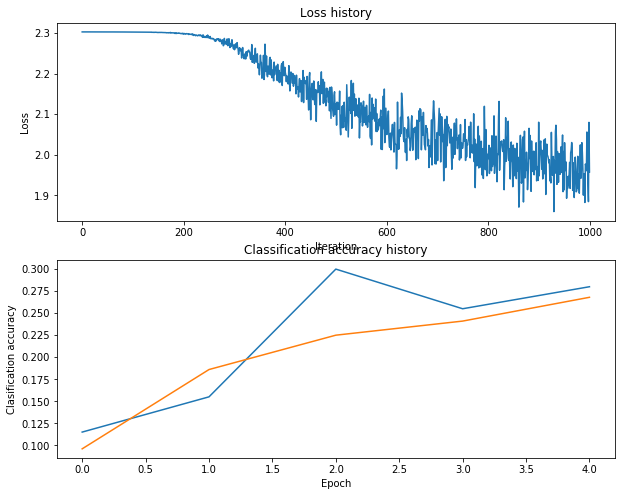

In [11]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

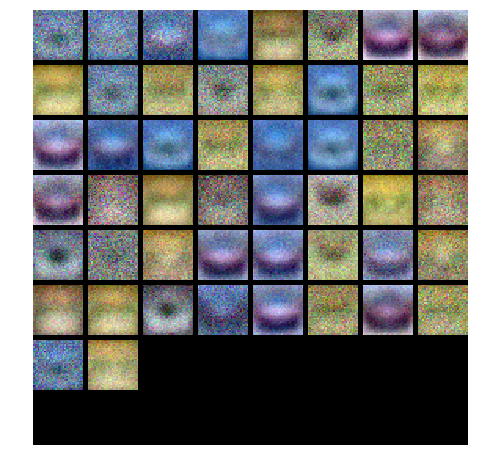

In [14]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. For every 1% above 52% on the Test set we will award you with one extra bonus point. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

In [24]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
iters = 200
learning_rate = [1e-4,1e-5]
regularization_strength = [1e-5,1e-4]
hidden_size  = 50
input_size = 32*32*3
class_size = 10
best_val = -1
for lr in learning_rate:
    for rs in regularization_strength:
        nn = TwoLayerNet(input_size,hidden_size, class_size)
        nn.train(X_train,y_train,X_val,y_val,learning_rate = lr,reg =rs,num_iters =iters)
        y_train_pred = nn.predict(X_train)
        accu_train = np.mean(y_train==y_train_pred)
        y_val_pred = nn.predict(X_val)
        accu_val = np.mean(y_val==y_val_pred)
        
        if best_val<accu_val:
            best_val = accu_val
            best_net =nn 
print(best_val)
print(best_net)
        
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

0.213


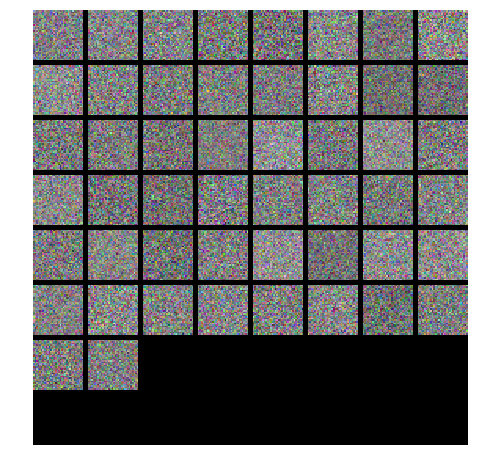

In [20]:
# visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

**We will give you extra bonus point for every 1% of accuracy above 52%.**

In [21]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.16
